# Beleg 1: Werkzeugkasten

**Name: Liav Keren**
<br>
**Matrikelnummer.: S0574657**

## Bearbeitungszeitraum: 
**13.11. - 18.12**<br>
Besprechung am 19.12 in der Übung



**Hinweise zum Beleg:** 
- Die erfolgreiches Bestehen des Belegs ist Voraussetzung zum Bestehen des Kurses. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.

# Aufgabe 1: Einführung

**Aufgabe 1.1**:
Laden Sie das Testbild 'CT.png', wandeln es in ein Bild mit einem Kanal um und stellen es mittels matplotlib.pyplot mit der Funktion imshow und der Option cmap='gray' dar.

In [1]:
!pip3 install pillow

In [4]:
import os
os.getcwd()

'/home/liav/Documents/htw/wise22_23/med_bv/med_bv_beleg1'

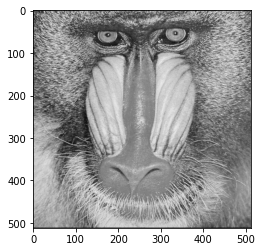

In [2]:
#Aufgabe 1.1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def read_and_show_img(path):
    image = np.array(Image.open(path).convert("L"), dtype=np.int32)
    #color_img = np.asarray(Image.open(PATH)) / 255
    #img = np.mean(color_img, axis=2)
    plt.imshow(image, cmap='gray')
    return image

image = read_and_show_img("Baboon.png")

**Aufgabe 1.2**: Geben Sie die Dimensionen des Bildes (Breite und Höhe) in Pixel sowie den jeweils kleinsten und größten Wert im Bild aus.  

In [6]:
#Aufgabe 1.2

print(f'Height: {image.shape[0]}\n Width: {image.shape[1]}\n Minimum pixel value {np.min(image)}\n Maximum Pixel value{np.max(image)}')

Height: 512
 Width: 512
 Minimum pixel value 0
 Maximum Pixel value231


**Aufgabe 1.3**: Als nächstes soll im CT Bild der schwarze Rand abgeschnitten werden, da dort keine Informationen über die aufgenommenen Strukturen zu finden sind. Zu diesem Zweck sollen Sie eine Bounding Box um den relevanten Bereich bestimmen. Dabei handelt es sich idealerweise um das kleinste parallel zu den Achsen verlaufendes Rechteck, dass sich über alle Bildbereiche erstreckt, in denen Inhalte zu finden sind (hier Pixel die nich schwarz sind). Nutzen Sie nun die gefundene Bounding Box, um das Bild entsprechend zuzuschneiden (oder auch zu "croppen").

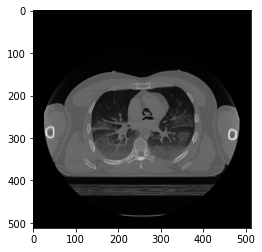

In [7]:
# Aufgabe 1.3
img_ct = read_and_show_img(path = "CT.png")

In [8]:
img_ct.shape

(512, 512)

In [9]:
def get_max_radius(srcImage, kernel_size, prev_box):
    r = 0
    height, width = srcImage.shape
    mid_height= height/2
    mid_width = width/2
    max_r = np.sqrt(mid_height**2 + mid_width**2)
    temp_arr = np.zeros(shape=(kernel_size, kernel_size))
    mid_kernel = kernel_size/2
    for i in range(kernel_size):
        for j in range(kernel_size):
            i_img = (int)(i+(mid_height-mid_kernel))
            j_img = (int)(j+(mid_width-mid_kernel))
            temp_arr[i, j] = srcImage[i_img, j_img]
    
    prev_box = np.pad(prev_box, (1), mode='constant')
    final_arr = temp_arr - prev_box
    
    if(not final_arr.any()>0):
        print("this has been called")
        #kernel_size = (int)(kernel_size/2)
        r = (int)((height - kernel_size)/2)
        print(r)
        plt.imshow(srcImage[r:srcImage.shape[0]-r, r:srcImage.shape[1]-r], cmap='gray')
    else:
        get_max_radius(srcImage, kernel_size+2, temp_arr)

def bounding_box(srcImage, kernel_size):
    height, width = srcImage.shape
    empty_arr = np.zeros(shape=(6,6))
    print('what i actually get')
    print(get_max_radius(srcImage, kernel_size, empty_arr))
    something = get_max_radius(srcImage, kernel_size, empty_arr)
    
    srcImage[r:srcImage.shape[0]-r, r:srcImage.shape[1]-r]    

this has been called
25


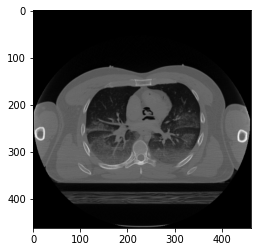

In [10]:
#bb_img = bounding_box(img_ct, 8)
get_max_radius(img_ct, 8, np.zeros(shape=(6,6)))

In [12]:
temp_arr = np.zeros(shape=(512, 512))
mid = 512/2
for i in range(512):
    for j in range(512):
        if(i>0 and i<512):
            temp_arr[i, 0] = img_ct[(int)(i+(mid_height-mid_kernel))
                    , (int)((mid_height-mid_kernel))]
            temp_arr[i, 1] = srcImage[(int)(i+(mid_height-mid_kernel))
                , (int)((mid_height+mid_kernel))]

NameError: name 'mid_height' is not defined

# Aufgabe 2: Farb- und Grauwertereduktion

**Aufgabe 2.1**:
Implementieren Sie den Median-Cut Algorithmus so dass die Method sowohl für Grauwertebilder (ein Kanal) als auch Farbbilder (3 Kanäle) anwendbar ist.

In [13]:
baboon = np.array(Image.open("Baboon.png"))
print(baboon.shape)

(512, 512, 3)


0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantiz

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quantize:  4
0
to quant

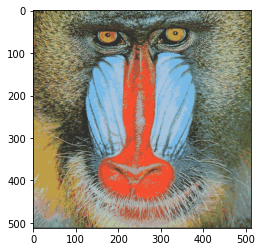

In [91]:

def median_cut_quantize(img, img_arr):
    # when it reaches the end, color quantize
    #print("to quantize: ", len(img_arr))
    r_average = np.mean(img_arr[:,0])
    g_average = np.mean(img_arr[:,1])
    b_average = np.mean(img_arr[:,2])
    
    for data in img_arr:
        baboon[data[3]][data[4]] = [r_average, g_average, b_average]
    
def split_into_buckets(img, img_arr, depth):
    
    if len(img_arr) == 0:
        return 
        
    if depth == 0:
        median_cut_quantize(img, img_arr)
        return
    
    r_range = np.max(img_arr[:,0]) - np.min(img_arr[:,0])
    g_range = np.max(img_arr[:,1]) - np.min(img_arr[:,1])
    b_range = np.max(img_arr[:,2]) - np.min(img_arr[:,2])
    
    space_with_highest_range = 0

    if g_range >= r_range and g_range >= b_range:
        space_with_highest_range = 1
    elif b_range >= r_range and b_range >= g_range:
        space_with_highest_range = 2
    elif r_range >= b_range and r_range >= g_range:
        space_with_highest_range = 0

    #print("space_with_highest_range:",space_with_highest_range)

    # sort the image pixels by color space with highest range 
    # and find the median and divide the array.
    img_arr = img_arr[img_arr[:,space_with_highest_range].argsort()]
    median_index = int((len(img_arr)+1)/2)
    #print("median_index:", median_index)

    
    #split the array into two buckets along the median
    split_into_buckets(img, img_arr[0:median_index], depth-1)
    split_into_buckets(img, img_arr[median_index:], depth-1)
    
flattened_img_array = []
for rindex, rows in enumerate(baboon):
    for colindex, color in enumerate(rows):
        flattened_img_array.append([color[0],color[1],color[2],rindex, colindex]) 
        
flattened_img_array = np.array(flattened_img_array)

# the 3rd parameter represents how many colors are needed in the power of 2. If the parameter 
# passed is 4 its means 2^4 = 16 colors
split_into_buckets(baboon, flattened_img_array, 16)

plt.imshow(baboon)

**Aufgabe 2.2**: Reduzieren Sie die Farben / Grauwert in den Bildern Baboon.png und Lena.png auf 2,4,8,16 mittels des Median-Cut Algorithmus und stellen Sie das Ergebnis jeweils dar.

In [ ]:
# Aufgabe 2.2

# Aufgabe 3: Filter

**Aufgabe 3.1**: Implementieren Sie eine Funktion welche einen beliebigen Faltungskern auf ein Grauwerte oder Farbbild anwendet. Der Faltungskern und das Bild sollen hierbei Übergabewerte für die Funktion sein.

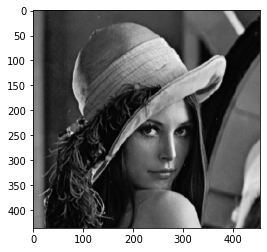

In [5]:
lena = read_and_show_img("Lena.png")

In [6]:
# Aufgabe 3.1
def normalise(arr):
    print(arr)
    max_val = np.max(arr)
    min_val = np.min(arr)
    min_max = (max_val-min_val)
    return ((arr*255)/min_max)

def filter(img, kernel):
    result_arr = np.zeros(shape=(img.shape[0], img.shape[1]))
    kernel_size = kernel.shape[0]
    mid_kernel_sz = (int)(kernel_size/2)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            sum_value = 0
            img_y = y-mid_kernel_sz
            img_x = x-mid_kernel_sz
            for i in range(kernel_size):
                for j in range(kernel_size):
                    img_j = (int)(np.clip(img_y+j, 0, img.shape[0]-1))
                    img_i = (int)(np.clip(img_x+i, 0, img.shape[1]-1))
                    
                    
                    sum_value += (img[img_j,img_i]*kernel[i,j])
                    #print(img[np.clip(img_j,0,255),np.clip(img_i,0,255)])
            result_arr[y,x] = sum_value
    
    return result_arr#normalise(result_arr)
                    

**Aufgabe 3.2**: Implementieren Sie eine Funktion welche den Faltungskern für den Binomialfilter erzeugt. Die Dimension des Filterkerns soll hierbei frei wählbar sein und der Funktion übergeben werden. Achten Sie auf die Normierung des Kerns

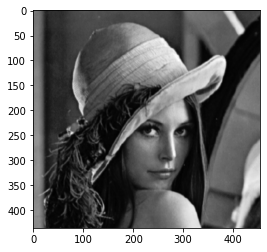

In [8]:
kernel = np.array([[0.0625, 0.125, 0.0625],
         [0.125, 0.25, 0.125],
         [0.0625, 0.125, 0.0625]])

kernel1= np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])
bino_img = filter(lena, kernel)
plt.imshow(bino_img, cmap='gray')

**Aufgabe 3.3** Wenden Sie auf das Bild 'Lena.png' Binomialfilter der Größen 3x3, 5x5, 11x11, 21x21 an und stellen Sie die Resultate dar.

In [ ]:
bino_kernel_5 = np.array([[1,4,6,4,1],
                        [4,16,24,16,4],
                        [6,24,36,24,6],
                        [4,16,24,16,4],
                        [1,4,6,4,1]])

bino_kernel_5 = (1/np.sum(bino_kernel_5)*bino_kernel_5)

bino_kernel_11 = np.array([[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
                         [10, 45, 120, 210, 252,462, 252, 210, 120, 45, 10],
                         [45, 120, 210, 252,462,714,462, 252, 210, 120, 45],
                         [120, 210, 252,462,714,1176,714,462, 252, 210, 120],
                         [210, 252,462,714,1176,1890,1176,714,462, 252, 210],
                         [252,462,714,1176,1890,3066,1890,1176,714,462, 252],
                         [210, 252,462,714,1176,1890,1176,714,462, 252, 210],
                         [120, 210, 252,462,714,1176,714,462, 252, 210, 120],
                         [45, 120, 210, 252,462,714,462, 252, 210, 120, 45],
                         [10, 45, 120, 210, 252,462, 252, 210, 120, 45, 10],
                         [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]])
bino_kernel_11 = (1/np.sum(bino_kernel_11)*bino_kernel_11)
                          
bino_kernel_21 = np.array([[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
                         [10, 45, 120, 210, 252,462, 252, 210, 120, 45, 10],
                         [45, 120, 210, 252,462,714,462, 252, 210, 120, 45],
                         [120, 210, 252,462,714,1176,714,462, 252, 210, 120],
                         [210, 252,462,714,1176,1890,1176,714,462, 252, 210],
                         [252,462,714,1176,1890,3066,1890,1176,714,462, 252],
                         [462,714,1176,1890,3066,4956,3066,1890,1176,714,462],
                         [714,1176,1890,3066,4956,8022,4956,3066,1890,1176,714],
                         [1176,1890,3066,4956,8022,12978,8022,4956,3066,1890,1176],
                         [1890,3066,4956,8022,12978,21000,12978,8022,4956,3066,1890],
                         [3066,4956,8022,12978,21000,33978,21000,12978,8022,4956,3066],
                         [1890,3066,4956,8022,12978,21000,12978,8022,4956,3066,1890],
                         [1176,1890,3066,4956,8022,12978,8022,4956,3066,1890,1176],
                         [714,1176,1890,3066,4956,8022,4956,3066,1890,1176,714],
                         [462,714,1176,1890,3066,4956,3066,1890,1176,714,462],
                         [252,462,714,1176,1890,3066,1890,1176,714,462, 252],
                         [210, 252,462,714,1176,1890,1176,714,462, 252, 210],
                         [120, 210, 252,462,714,1176,714,462, 252, 210, 120],
                         [45, 120, 210, 252,462,714,462, 252, 210, 120, 45],
                         [10, 45, 120, 210, 252,462, 252, 210, 120, 45, 10]])

lena11 = filter(lena, bino_kernel_11)
plt.imshow(lena11, cmap='gray')

**Aufgabe 3.4** Wenden Sie auf die Bilder 'Lena.png' und 'Baboon.png' den isotropen Laplace Filter an. Überlegen Sie sich eine geeignete Normierung / Verschiebung der Farbwerte für die erhaltenen Bilder und stellen Sie die Ergebnisse dar. (Erklären Sie Ihre Darstellungsweise kurz).

In [94]:
# Aufgabe 3.4
lap_kernel = np.array([[0 , -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]])
lap_kernel = lap_kernel*1/8
lap_img = filter(lena, lap_kernel)

0.125
0.25
0.375
-0.5
-0.125
0.375
-0.5
0.625
-0.125
0.75
0.125
-0.25
0.125
1.5
-1.25
-0.125
0.0
0.125
-0.125
0.125
-0.25
-0.25
-0.125
0.625
-1.875
2.25
-1.0
-0.75
-2.25
0.875
1.5
-0.125
-0.5
1.125
0.5
-0.125
0.125
0.125
0.25
-0.5
-0.5
-0.375
-0.625
1.0
-0.25
0.875
-1.125
1.625
-0.5
1.5
-1.625
0.375
-0.625
0.0
0.625
0.75
1.375
-2.25
1.25
0.5
-1.25
0.875
0.0
-1.5
1.25
0.125
-0.125
0.0
0.125
0.125
0.125
0.5
-1.0
0.25
0.5
-0.75
0.625
-0.25
0.125
-0.25
-0.625
0.0
0.5
0.0
0.125
-0.625
0.75
-0.5
0.5
-0.5
0.375
-0.5
1.5
-1.75
1.375
0.5
-0.125
0.25
-0.5
-1.125
1.5
-0.25
0.25
-0.125
0.125
0.625
-0.25
0.125
1.25
-2.375
3.375
-2.375
2.75
-2.0
0.125
0.375
-0.5
-0.125
0.0
-0.5
0.25
0.75
-2.125
0.5
1.125
-0.75
-0.125
1.0
-0.25
-0.25
0.0
0.25
0.125
0.0
0.125
-0.125
0.375
-0.125
-0.125
0.25
0.125
-0.125
-0.375
0.25
-0.625
-0.125
0.25
-0.125
0.0
0.25
0.375
-0.625
0.0
0.25
0.125
-0.125
-0.125
0.0
0.25
-0.5
-0.125
0.0
-0.25
0.0
-0.125
0.125
0.0
-0.125
0.0
-0.125
-0.25
-0.125
0.125
-0.25
0.25
0.125
-0.75


0.25
-0.625
0.125
0.0
0.125
-0.375
-0.625
-0.5
0.0
1.375
-1.25
1.25
-0.875
0.0
0.625
-2.125
1.125
-0.875
-0.375
1.375
-0.25
-0.875
0.625
-0.25
0.0
0.375
-0.5
0.375
-0.5
0.5
-0.25
-0.75
0.75
0.75
-0.375
-0.25
0.0
-0.125
-0.125
1.125
0.125
0.125
0.375
0.375
0.375
-0.125
0.25
-0.25
0.375
0.375
0.25
-0.25
0.125
0.375
-0.25
0.125
-2.75
0.375
-1.0
0.5
0.5
-0.875
3.0
-2.875
0.25
0.875
-0.125
1.625
-1.125
-0.75
1.375
0.375
-1.25
0.25
0.125
0.25
0.375
-0.75
0.375
0.375
0.375
0.75
-0.875
0.5
0.125
0.5
-0.375
0.0
1.875
-2.125
0.125
-1.625
0.625
-0.25
-1.125
-1.125
1.875
-1.625
-0.25
0.125
0.0
-0.25
-0.125
0.25
-0.375
0.625
0.125
-0.25
0.0
0.375
-0.125
0.5
-0.5
-0.375
0.625
0.5
0.125
-0.125
1.0
1.125
-0.625
0.125
0.25
-0.75
1.0
-1.375
0.25
0.125
0.625
0.125
-0.5
-0.75
-0.25
1.375
0.125
0.875
0.125
-0.125
-0.5
0.625
0.25
-1.5
0.25
-0.875
1.625
-1.25
0.75
-0.125
-0.25
0.0
-0.125
-0.5
0.0
0.375
0.875
-1.5
0.25
0.0
-0.5
0.25
0.625
-0.125
0.125
-0.125
0.375
0.5
-0.625
0.0
0.875
0.125
-0.25
0.375
0.125


0.5
-1.625
-0.5
0.75
0.625
-0.125
-0.375
-0.25
0.25
0.75
-2.0
1.75
-2.0
2.125
-0.25
0.75
-1.375
1.125
1.375
0.375
-0.25
0.5
1.0
-0.125
-0.125
1.0
0.25
-1.0
0.25
-0.125
1.0
0.125
-0.625
-0.75
-0.75
-0.125
0.625
1.375
-1.125
-0.375
0.25
1.625
0.5
0.875
-1.5
1.375
0.0
-0.125
0.5
-0.5
0.5
-0.625
1.125
0.5
0.5
0.875
-0.875
-1.5
1.0
0.75
0.125
-1.625
1.25
0.0
-1.625
0.25
-0.875
0.375
-0.125
1.0
-1.125
-0.5
-0.625
1.0
0.0
0.75
-0.625
0.75
2.0
0.0
0.25
0.25
0.75
-0.25
0.375
1.75
-2.625
1.5
0.625
0.625
0.625
-0.5
-0.375
-0.375
0.25
0.625
0.0
-0.125
-0.25
-0.125
0.25
0.0
-1.0
-0.125
0.875
0.875
-0.125
-0.125
0.375
0.25
-0.125
-0.125
0.25
0.125
-0.125
1.125
-1.0
-0.625
-0.25
-0.125
0.25
0.125
0.0
0.125
0.125
-0.125
0.625
-0.625
-0.375
0.875
1.375
-1.25
0.0
1.625
0.75
0.25
0.0
-1.375
1.625
-1.5
-1.0
-0.25
1.375
-0.625
-1.5
2.0
1.25
0.5
0.125
-0.375
-0.75
0.5
-1.125
1.375
-0.5
-0.875
-0.625
1.5
1.5
2.25
1.0
1.875
1.625
2.625
1.0
0.375
-1.0
1.125
-0.625
2.0
-2.125
1.875
-0.25
0.875
0.625
-1.75
-1.75

1.0
0.0
0.0
0.125
0.125
-0.5
-0.125
-0.625
0.25
0.25
-0.25
-0.25
-0.125
1.0
-0.625
-0.25
-0.25
-0.25
0.0
-2.875
0.25
-0.125
0.75
0.75
-0.375
0.25
0.125
-0.5
0.125
-0.125
0.125
0.125
0.5
-0.125
-0.25
0.0
0.625
0.125
1.5
1.875
0.5
-0.75
-4.5
-0.625
1.25
0.625
-0.625
-1.0
1.625
-0.375
-0.75
-0.625
0.125
0.625
-0.375
-0.125
-0.25
1.0
-0.625
-0.25
0.625
-0.375
0.625
-0.875
0.125
-0.125
-0.125
-0.25
0.375
1.0
-1.875
1.625
-1.5
1.125
-1.125
1.875
0.875
1.125
-2.375
2.0
-1.625
0.625
-0.625
0.625
0.125
0.875
0.875
0.75
-1.375
0.75
-1.125
0.0
-0.375
-0.125
-0.5
-0.5
0.125
0.125
-0.375
0.625
0.25
0.5
1.125
-0.25
-0.25
0.875
1.125
-0.125
-0.625
-0.125
-0.125
-0.125
0.125
0.25
-0.875
-0.75
-0.5
0.875
-0.25
0.375
0.625
0.375
0.25
-0.25
0.25
-1.25
1.625
-1.125
-0.25
2.5
-0.875
1.25
-2.5
0.0
0.375
0.75
1.0
-1.875
0.375
-0.375
1.0
0.75
-0.875
0.5
-0.125
0.125
0.625
-0.5
-0.125
0.0
2.375
-1.125
-0.875
1.375
-1.25
0.5
1.125
-0.125
-0.125
0.5
-1.0
-0.125
-0.375
0.5
0.875
-0.625
0.375
1.0
0.375
0.0
-0.25
0

-0.5
-0.125
1.125
0.5
-3.0
0.375
-1.125
2.75
-0.5
-1.0
-0.625
0.75
-0.125
0.625
0.375
-0.375
-0.125
-0.375
-0.5
-0.375
0.25
-0.125
-0.375
0.0
-0.125
-0.125
-0.25
0.125
0.625
0.0
-1.25
0.25
0.125
-0.125
0.0
0.25
-0.25
-0.75
1.375
-1.0
1.125
0.125
2.375
0.625
-1.875
0.5
0.0
0.125
0.0
0.0
-0.125
-0.5
0.0
0.25
-0.25
0.5
-0.5
-0.625
1.625
-0.75
-0.5
0.125
-0.5
0.25
-0.75
0.75
-0.5
0.125
-1.125
0.0
-1.0
0.625
-0.375
0.25
0.125
-0.375
-0.25
-0.5
-0.375
0.25
0.5
-0.125
0.25
-0.625
0.125
-0.75
0.125
-0.5
1.375
-1.5
2.375
-0.375
-0.375
-0.125
0.25
-0.5
0.0
0.0
-0.125
-0.125
0.125
0.125
0.125
0.0
-0.25
-0.125
0.125
0.375
-0.125
-1.125
0.5
0.0
-0.875
0.875
-0.5
0.625
-0.875
-0.75
0.0
-0.375
0.25
-0.5
0.25
0.5
-0.375
-0.25
0.125
-0.125
-0.125
-0.25
0.0
0.625
0.625
-0.125
-0.25
-0.125
-0.25
-0.25
-0.25
0.0
0.5
0.25
-0.125
0.375
1.125
-1.375
-0.25
-0.125
0.25
0.375
0.125
-0.25
0.75
-0.75
-0.25
-0.25
-0.25
0.125
-0.25
-1.375
1.625
0.375
-0.75
0.125
0.625
-1.75
0.625
-0.125
0.375
-0.125
-0.125
0.0
0.0


0.0
-0.375
0.625
-0.125
-0.25
0.125
0.25
0.125
0.125
0.25
0.0
0.25
0.0
0.125
0.5
0.375
-0.75
0.125
-0.125
0.25
0.125
-0.375
0.875
-1.375
0.25
0.5
0.0
0.25
1.375
-0.75
0.625
-0.125
-0.125
0.25
-0.375
-0.25
-0.875
-0.125
0.75
0.125
-0.125
0.875
0.0
-0.875
-0.625
1.625
-1.0
0.125
0.5
0.25
-1.75
1.0
-1.125
0.875
-0.125
-0.25
-0.125
0.375
-1.25
-0.125
1.0
-1.0
0.25
-0.125
-0.5
-0.375
0.75
-0.125
-0.375
0.125
0.625
-0.375
-0.125
0.625
-0.75
0.25
-0.125
-0.5
0.375
0.25
-0.625
0.125
-0.25
0.0
-0.25
0.0
0.5
0.25
0.5
-0.625
-1.0
0.875
-0.25
-0.375
0.25
0.25
0.25
-0.25
-0.125
0.25
-0.125
-0.625
0.875
-0.25
0.125
0.25
-0.25
0.5
-1.0
0.0
0.25
0.625
0.5
-0.125
-0.5
1.25
-0.875
1.75
-0.25
0.5
0.25
-1.0
0.125
0.0
0.0
0.25
-0.25
-0.25
-0.5
0.375
-0.125
-0.75
1.375
-0.375
-0.625
-0.25
2.125
-0.875
-0.25
-1.375
-1.625
-0.375
-0.25
0.375
-0.75
1.25
0.625
0.25
0.75
-0.375
0.0
0.25
-0.5
-0.125
0.25
0.125
1.25
0.75
-0.25
-0.875
2.5
0.375
-2.125
-1.5
-0.5
-2.875
1.75
-0.25
0.875
-0.5
0.25
0.25
0.875
-0.875
0.

0.375
-0.625
0.375
0.625
-1.125
0.375
-0.25
0.375
-0.75
-1.25
1.375
0.875
-1.125
1.125
0.0
-0.375
0.375
0.625
0.625
0.5
0.75
0.0
0.125
-0.25
-0.25
-0.5
0.75
1.25
-1.125
-0.25
0.25
0.625
0.125
-0.5
-0.125
0.125
0.375
0.125
-0.125
0.25
0.0
-0.625
-0.625
-0.25
0.25
-0.5
-0.5
-0.5
-0.375
-0.125
1.25
-0.5
1.0
-1.0
1.25
-0.75
-0.875
0.125
-0.25
0.0
-0.25
-0.5
-0.25
0.25
-0.25
0.75
1.0
0.75
-2.75
0.875
-1.75
-0.25
0.375
0.75
0.0
-0.25
-0.25
-0.25
0.75
-0.125
0.25
1.0
-0.25
0.5
0.125
0.5
-0.25
0.5
1.125
-0.5
-1.625
-1.0
2.625
0.125
-0.375
0.625
-2.375
1.5
0.75
-1.0
-0.375
-0.125
-0.375
-0.375
-0.25
0.0
0.875
-0.125
-0.25
0.375
-0.125
0.625
-0.875
1.125
-0.75
-0.625
-0.875
0.5
-0.125
0.25
0.5
-0.75
-0.125
3.25
-2.375
3.625
-2.875
1.125
-0.125
0.0
-0.25
-0.625
-0.5
-0.5
-0.75
-0.5
-0.75
-0.5
-0.25
2.375
0.875
-1.625
-0.5
0.625
0.375
-0.25
-0.5
-1.75
0.25
0.25
2.5
2.125
1.75
1.25
0.625
0.875
0.5
0.75
0.25
-0.125
0.0
0.375
0.5
0.875
-1.375
-1.375
-1.875
-1.25
0.125
-2.0
-4.125
-1.25
-2.125
-0.125


-2.125
1.0
-0.5
-2.125
-0.5
0.0
-0.625
-0.125
1.375
-2.0
0.625
-0.5
-0.5
0.125
-0.125
0.5
0.125
1.125
1.625
-1.125
-1.625
-1.375
-0.5
-0.75
-0.375
-0.875
0.0
-0.375
0.375
-0.125
0.125
0.0
0.0
-0.25
0.0
0.125
-0.125
0.0
-0.375
0.0
0.375
0.0
-0.375
-0.25
-0.75
1.0
0.375
-1.75
0.25
0.25
-0.125
1.5
0.625
-0.25
0.375
0.0
1.25
-2.125
0.125
-0.125
-0.375
-1.875
-0.375
-1.625
2.5
-1.0
-0.375
1.25
-1.0
0.5
-1.875
0.0
0.375
-1.125
0.125
1.0
0.5
1.25
-1.125
1.0
-0.625
1.0
1.0
0.125
-0.375
1.0
-1.0
-0.875
-0.5
-0.125
2.125
0.25
-0.625
1.875
-4.125
2.625
-1.25
1.125
-0.25
-0.125
0.125
0.125
0.875
0.0
0.125
0.125
-0.875
2.5
-1.625
-0.375
0.75
-0.5
-1.125
1.625
-1.375
0.875
-1.0
1.625
-2.0
0.375
0.375
0.25
1.375
-1.25
0.0
1.0
-0.375
-0.125
0.0
0.25
-0.75
0.0
0.25
0.0
0.25
0.0
0.375
-1.375
-0.5
0.5
0.0
0.25
-0.125
-0.25
-0.375
0.25
0.625
0.375
0.0
0.75
-1.5
0.625
0.375
-0.125
2.5
-1.75
1.0
-0.125
-0.75
0.5
-0.875
-0.25
-0.75
0.5
-1.0
-0.625
1.25
-1.125
-1.375
0.625
1.5
-1.375
-0.125
-1.125
1.375
-1.75

-0.25
0.0
0.375
-1.25
-2.75
-3.125
-2.5
-1.75
-0.375
0.0
-0.75
-1.125
0.25
1.875
-1.25
0.0
0.375
0.625
0.25
-0.25
0.75
-0.25
0.0
0.625
-0.375
-0.25
0.875
0.375
-0.125
0.0
0.0
-0.25
0.25
0.5
-1.5
0.625
-0.125
-0.25
0.5
0.375
0.25
0.125
-1.5
1.0
-0.375
-0.875
1.25
0.625
0.375
-0.5
0.75
0.0
0.125
0.125
-0.25
1.0
-1.625
-0.375
0.375
0.25
-0.5
0.25
-1.0
-0.25
0.75
-0.125
-0.375
-0.125
-0.25
0.25
-0.125
0.375
0.625
0.375
0.25
-0.25
0.25
-0.25
0.875
0.125
-0.25
0.5
0.25
0.25
-0.375
0.375
1.0
-0.625
-1.0
0.625
0.875
1.125
0.125
-0.5
-0.125
-0.25
-0.25
-0.375
-1.125
1.875
-1.375
0.25
1.0
-1.0
0.875
-0.5
0.125
-0.125
0.125
-0.5
0.25
0.75
0.625
-0.375
-2.5
0.375
0.625
-1.0
1.25
0.25
-0.625
0.125
1.75
-0.75
-0.875
1.875
1.0
0.375
-1.625
0.125
-0.5
1.25
-0.625
0.625
-0.75
0.75
-0.375
-0.375
-0.375
0.125
0.875
0.0
-0.75
0.125
-0.5
0.25
0.25
-0.125
0.375
-1.25
0.625
0.0
-0.75
0.125
0.0
-0.25
1.25
-0.875
0.75
-1.0
0.125
0.75
-1.25
0.25
1.125
0.0
0.0
-0.125
-0.25
-0.25
1.0
0.25
-0.625
0.125
0.25
0.25
-

0.25
0.25
-0.25
-0.625
2.0
-2.0
1.25
-1.125
0.5
-0.625
0.0
0.375
-1.375
-0.625
1.5
2.125
-2.0
-0.75
0.75
0.125
-0.5
0.375
1.125
-1.25
0.125
0.25
0.0
-1.375
0.875
-0.625
0.875
-1.0
1.125
-0.375
-0.75
1.25
-1.25
0.5
0.75
0.125
-1.0
-0.25
0.25
-0.25
1.75
-0.625
-0.375
0.625
-0.125
0.75
-1.375
0.625
-0.25
0.25
0.25
0.0
-0.125
-0.875
1.125
-0.25
-0.125
0.5
0.375
-1.125
0.875
-1.125
0.0
0.125
0.0
-0.25
0.0
-0.125
-0.125
0.0
-0.5
0.25
0.375
0.375
0.375
0.0
1.375
0.0
-0.5
-0.75
1.5
-0.25
-0.125
-0.5
0.75
-1.375
-0.375
-1.875
-0.625
-0.75
3.25
-0.5
1.0
-0.125
0.75
-0.375
0.0
0.125
-0.25
0.0
-0.125
1.25
0.5
-0.25
1.25
-0.25
0.75
1.5
0.375
0.25
-0.5
-3.0
-1.25
0.875
1.375
-1.625
0.375
1.125
1.375
1.25
-1.125
-0.375
-0.125
0.0
-0.375
-0.25
-0.375
0.375
-0.5
0.25
0.375
0.25
-0.375
-0.125
0.375
-0.125
0.0
-0.25
-0.125
0.0
0.0
-0.125
0.5
-0.25
0.125
-0.25
0.125
0.125
-0.5
-0.75
0.25
0.125
-0.125
-0.75
0.0
0.75
0.0
-0.25
-0.25
1.25
-0.5
-1.5
1.5
1.125
-1.25
1.125
0.125
-2.375
1.75
0.125
-0.625
-1.125


-0.75
1.75
0.375
-0.125
-0.625
-0.5
1.125
1.25
-3.375
-5.0
-3.75
2.0
1.875
2.25
0.125
0.625
1.25
0.0
0.375
0.125
-0.5
-0.5
1.0
0.125
0.375
-0.125
-0.5
-0.625
0.375
0.5
0.0
-0.625
0.0
-0.125
-0.5
-0.375
0.375
-0.125
0.0
0.0
0.0
0.125
-0.5
-0.5
-0.625
0.0
0.25
0.25
0.375
-0.25
0.125
0.125
0.25
-0.5
0.375
0.5
-0.5
0.125
0.125
-0.5
0.625
1.5
-1.625
1.75
-0.75
-0.75
-1.375
1.25
-0.375
-0.375
-1.25
-1.0
3.0
2.0
-0.5
0.25
-0.875
-2.125
-1.75
0.5
0.875
-0.25
-1.375
-0.5
-2.875
3.25
1.375
-0.5
0.625
0.625
-1.25
-0.625
1.25
-0.625
-1.375
-0.375
0.75
2.375
-1.875
1.75
-5.25
-0.125
5.0
-6.25
2.625
0.625
-1.125
3.0
-1.625
1.25
0.375
0.0
-1.625
0.625
-0.875
-0.125
-0.125
-0.875
1.875
-2.125
-0.625
0.25
1.125
-1.0
1.5
-0.75
1.0
-0.5
-0.125
1.75
-1.5
0.375
-0.5
0.125
0.125
0.125
-0.5
0.625
0.75
1.125
0.25
-2.25
0.875
-0.25
-1.5
1.25
1.75
0.5
-0.25
-0.5
-0.75
-0.25
0.875
0.25
0.0
1.875
-0.875
0.0
2.125
-0.75
-1.25
0.625
-0.75
1.125
-0.125
0.625
-1.375
-0.375
0.0
0.25
0.0
1.0
-1.125
-0.125
0.625
-0.125


1.125
2.375
1.5
-3.0
-1.375
-1.5
-0.5
2.375
2.0
0.875
0.75
-4.375
-0.5
1.25
2.25
1.625
-1.25
-1.0
-0.75
-1.125
-1.5
0.125
1.5
1.0
1.25
-1.875
-0.375
6.875
3.25
-0.375
-4.0
-4.5
-2.125
0.25
0.0
1.125
-0.875
-0.625
1.625
-2.5
1.875
1.625
-0.5
-0.125
-0.375
-0.5
1.0
-1.5
-0.25
0.5
1.0
0.25
-0.375
0.375
-0.5
-0.25
-0.5
0.125
0.0
0.375
0.0
-0.5
0.375
-0.125
0.0
-1.375
-0.125
0.5
-1.25
1.5
0.75
-0.125
-0.375
0.0
0.5
0.375
-0.625
0.125
0.375
0.5
0.0
-0.25
-1.25
1.25
0.625
-0.625
-0.125
0.25
0.0
0.5
-0.625
0.0
-0.125
-0.625
1.0
-0.125
-1.0
1.125
-1.375
0.875
-0.375
-0.125
0.5
-0.375
0.25
0.125
1.125
0.25
-0.25
0.875
-0.625
0.5
0.5
-1.0
0.25
0.375
-1.25
-0.125
0.375
1.0
-0.75
-1.125
1.75
-1.0
1.125
-0.25
-0.875
-0.625
-0.5
-0.375
-0.5
-1.25
0.125
-1.25
1.0
0.625
-0.75
0.75
-1.75
1.125
-2.0
0.0
0.625
0.375
-0.25
-0.125
0.5
0.625
0.5
-0.375
-0.125
-0.75
-0.5
0.25
-0.5
1.125
-2.0
0.375
0.125
-1.0
1.0
-0.375
-0.5
0.0
0.25
0.625
-0.125
-0.25
-0.25
0.125
0.5
0.0
-0.25
-0.25
-0.75
0.25
0.625
-0.25
0.6

-0.25
0.75
0.375
-0.375
-0.375
-1.0
1.0
0.0
1.0
-1.0
1.5
-0.5
0.25
0.125
0.25
0.375
-0.5
-1.0
0.625
-1.0
-0.75
0.75
-0.75
0.0
-1.125
1.25
0.0
-1.375
1.0
0.625
-1.25
0.75
1.0
0.75
-0.5
1.5
-0.875
-0.625
-0.125
-0.125
0.25
1.0
-1.75
0.625
0.75
0.25
1.375
-0.25
0.25
-1.125
0.0
0.0
0.75
0.75
-0.75
0.0
0.625
-0.125
-0.375
0.125
0.375
0.0
0.0
0.5
-1.25
1.25
-1.375
-0.125
0.625
-1.0
2.25
-1.0
0.375
1.125
-1.125
-0.25
0.25
-1.125
-0.125
-0.75
-0.375
0.0
-0.875
0.875
-0.25
0.125
-0.875
-0.125
0.875
-0.25
-0.625
0.75
0.75
-0.625
0.0
0.625
0.0
0.25
-2.0
2.25
-0.25
-0.625
0.625
0.875
0.25
-0.625
-0.25
0.125
0.875
-2.25
0.5
-1.125
-3.25
1.875
2.25
-2.625
-0.375
0.75
-0.75
0.5
-2.125
-1.25
3.125
-1.75
0.625
-0.625
-0.25
1.625
-1.625
-0.75
0.0
0.375
-0.375
-0.125
0.5
-0.75
-0.25
-1.375
0.625
-0.25
-1.0
0.875
0.5
-0.875
0.875
1.0
-0.25
0.875
3.25
-4.625
2.0
-2.75
2.875
-0.25
-3.625
3.0
2.625
-2.125
-1.0
0.75
-1.0
0.5
1.375
-1.5
0.625
-1.5
2.75
1.5
0.375
1.125
-2.75
1.0
0.0
-1.0
1.5
1.0
-0.125
0.625
1.

-1.875
-2.0
-2.125
3.0
0.125
-2.75
3.5
0.0
-2.0
0.625
-1.125
-0.25
1.5
-5.25
1.125
-2.625
3.625
-0.375
-1.25
-5.25
-1.875
-2.0
3.125
-0.875
1.125
-1.625
-0.625
-0.625
3.125
2.5
-0.5
-1.25
1.5
-5.125
-1.25
2.25
1.875
1.375
-2.875
0.625
-1.25
-0.125
3.5
2.25
0.0
-1.375
-0.125
-4.375
-0.625
-0.125
2.125
2.75
-1.25
-0.625
-0.375
0.0
-1.0
-0.375
0.5
0.875
1.625
-2.25
2.0
-2.375
-0.25
3.125
5.375
0.25
-3.0
-4.125
-1.875
-0.875
0.375
0.75
-2.125
1.625
-0.125
-0.25
0.0
1.25
-0.25
-0.125
0.25
0.25
-0.25
-0.375
-0.125
0.0
0.0
0.625
-0.125
-0.625
0.25
-1.5
0.875
0.25
-0.75
1.125
-0.375
-0.125
0.375
0.125
0.25
-1.25
0.75
-0.5
0.625
1.875
0.125
-0.5
2.375
-2.625
0.75
-0.5
0.875
1.0
-1.5
0.5
-0.625
-0.5
0.625
-0.25
0.5
0.375
-0.375
-1.25
0.5
0.75
0.0
0.25
-0.375
0.0
-0.625
0.125
0.25
0.875
0.875
-1.625
1.5
-1.25
0.125
0.125
-0.625
-0.5
-1.0
0.75
0.5
1.125
-0.875
0.0
0.625
-1.75
0.25
1.125
-1.875
1.5
-0.25
-1.625
1.625
0.5
-1.75
1.125
-1.0
0.75
-1.5
1.75
-1.875
1.5
-0.25
0.125
0.375
-0.625
-0.25
0.25

0.625
0.75
1.0
-1.375
0.375
-0.625
-0.125
-0.25
-0.25
-0.125
0.375
0.125
-0.375
-1.125
1.25
-0.125
0.0
0.0
0.375
0.625
-0.875
0.625
-0.125
0.125
0.0
0.0
0.5
0.5
0.375
0.125
-0.125
-0.25
-0.125
-0.25
-0.25
-0.125
0.875
-1.375
-0.125
0.375
-0.375
1.0
-1.0
-0.125
0.0
0.125
-0.625
0.25
0.0
0.0
-0.875
0.125
0.375
-1.875
0.375
-0.5
1.125
-1.5
0.0
0.125
0.125
-0.125
-0.125
0.125
-0.625
0.0
0.25
-0.875
0.125
1.375
-1.875
0.5
0.125
0.25
0.625
-0.375
-0.25
-0.625
0.25
-0.875
0.5
0.0
-0.625
-0.125
0.25
-0.25
0.75
-0.5
-0.625
0.0
0.75
-0.125
-2.0
-0.75
-4.125
-2.25
2.375
2.0
2.0
1.75
2.75
2.625
2.375
1.375
-2.0
-2.625
-2.75
-2.75
-1.75
-0.625
-0.25
-0.75
-0.5
0.0
-0.625
0.0
0.25
-0.25
0.0
-0.375
0.25
-0.25
-0.125
0.125
0.25
-0.25
-0.5
-0.25
0.0
-2.75
-0.875
-0.75
0.875
0.0
0.125
-0.375
-0.375
0.0
-0.125
-0.125
0.75
-1.125
-0.375
-0.125
0.5
-0.125
0.625
-0.75
0.625
-1.25
1.75
-0.625
1.25
0.125
-1.5
1.75
0.5
-1.5
1.0
1.0
0.75
0.625
-1.75
-0.625
1.25
-1.5
1.875
-2.25
1.75
-0.125
3.5
-2.125
1.875
-2.0

-1.875
0.25
0.625
3.5
1.5
-2.125
-4.0
1.25
2.5
-1.625
2.375
0.625
-0.75
-2.0
-2.125
-1.25
0.75
1.375
1.0
0.25
-1.0
0.0
-2.375
-1.25
3.375
0.375
1.875
0.125
-0.75
-0.875
-2.25
-0.875
0.125
0.375
0.625
1.5
1.5
0.25
0.5
-3.25
2.125
2.375
2.0
0.875
1.375
2.25
-1.625
3.25
3.0
4.25
-4.5
-7.125
0.25
-1.625
-0.25
-0.25
0.25
-0.25
-0.125
0.5
0.625
-1.0
1.125
0.25
0.25
-1.125
1.5
-1.5
1.875
-1.375
-0.125
1.0
-0.125
-0.125
-0.25
1.0
-0.125
0.625
-0.125
0.5
0.875
-0.5
1.0
0.375
-0.25
-0.25
1.0
0.0
-0.875
0.375
0.5
-0.125
-1.25
-0.375
0.125
0.375
-1.375
1.25
-0.75
0.625
0.875
-0.625
0.5
0.25
-0.625
0.875
0.375
-1.0
0.875
-0.75
-0.625
0.25
1.25
-1.5
0.0
-0.5
0.75
-1.0
0.875
-0.375
0.25
0.5
-0.125
-0.25
-0.75
0.25
1.0
-1.25
0.25
-0.5
0.375
-0.25
0.0
0.375
-0.25
0.0
-0.75
0.125
-0.375
1.75
-1.25
-0.125
1.0
-0.375
-0.5
0.125
1.875
-1.0
0.25
-0.875
0.25
0.125
-1.125
1.75
-0.375
0.375
-0.625
0.875
-0.375
0.25
-1.375
1.375
-1.5
0.75
-0.625
1.25
-1.0
0.125
-0.375
1.0
-1.0
-0.125
-0.25
-0.5
0.75
-1.5
2.0
-1

1.375
-1.875
-0.125
0.875
0.75
-0.25
-1.375
-0.625
0.875
-0.375
0.625
-0.125
-1.0
0.875
0.875
-0.125
-1.125
0.75
1.0
-0.625
0.375
-1.375
1.625
-0.625
-0.25
0.75
-1.25
0.875
-0.375
1.5
-0.375
0.0
0.0
0.625
-1.0
0.125
-0.25
0.5
-0.375
0.75
-0.5
0.625
0.375
-0.875
0.375
-0.25
0.75
-0.25
-0.375
0.5
0.0
-0.5
0.75
-0.5
-0.25
-0.875
-0.75
-0.375
0.375
0.25
0.0
-0.25
0.625
0.625
-0.375
-0.875
-0.625
1.375
0.125
-0.75
-0.5
1.125
0.5
1.25
-0.875
2.75
0.875
-1.75
0.125
-1.375
-0.5
-0.25
-0.25
-0.375
0.25
0.0
-0.25
-0.125
0.25
-0.125
-0.25
0.125
0.0
0.125
-0.25
0.0
0.0
0.0
0.25
0.0
0.0
0.125
0.0
0.125
-0.125
0.125
0.125
0.125
-0.375
0.25
-0.25
-0.375
0.125
-0.125
-0.25
-0.375
0.125
0.25
-0.125
0.125
0.0
-0.25
0.0
-0.375
-0.25
-0.125
0.375
0.25
-0.375
0.625
-1.25
0.75
0.5
-0.5
-0.125
1.625
0.625
0.0
0.125
-0.125
0.125
0.625
0.0
-1.0
1.0
-1.375
-0.125
-0.125
-0.5
-0.125
0.125
0.625
0.5
0.625
-0.875
0.375
0.25
0.0
-0.75
0.0
1.25
0.375
-1.25
2.0
-1.5
-0.25
0.875
-0.5
-1.75
-1.75
0.875
-0.25
-1.25
1.87

1.25
0.875
0.0
0.25
-1.125
0.375
-0.625
0.0
0.875
-1.0
0.625
-0.625
0.25
0.5
-0.375
0.125
0.625
-0.375
0.125
-1.125
1.375
-1.0
0.375
-0.625
3.125
-0.25
-1.375
-1.75
3.125
-1.0
0.375
0.375
-1.375
0.75
-1.0
-1.0
0.625
-0.75
1.625
-0.25
-0.375
0.5
-0.375
-0.25
0.625
0.0
0.5
-0.625
0.25
0.375
-1.25
1.25
-0.125
-0.25
0.875
0.0
-0.5
-0.625
-0.625
1.625
0.875
0.0
-1.25
1.25
-0.25
-0.25
1.25
-0.875
0.875
-0.5
0.125
-0.625
-0.625
0.375
-1.0
-2.125
0.625
0.75
1.5
-2.25
1.375
0.25
1.25
-1.0
-1.375
2.625
2.25
-0.5
0.375
-2.125
0.375
2.125
-3.125
0.5
1.5
0.75
-0.5
-0.625
0.625
0.75
-0.375
-0.125
-0.25
-2.0
2.375
1.0
-1.0
-2.125
-0.75
0.625
2.5
1.125
2.25
-2.5
0.125
-2.375
0.5
0.5
2.125
1.75
-1.5
-4.375
-3.375
2.0
2.5
1.25
1.125
0.125
-2.375
-2.5
-0.875
0.875
-0.625
3.0
-0.125
-0.25
0.75
0.0
-1.375
-0.5
0.25
1.375
2.875
1.625
-2.75
0.875
1.375
-1.25
1.0
0.625
-4.375
-1.375
-3.5
-2.0
0.125
0.375
0.25
1.375
0.125
0.25
-0.625
2.5
1.0
0.75
-0.25
-1.5
1.5
0.5
-0.5
1.125
-1.5
0.625
-1.5
2.625
0.25
-1.125


1.625
-1.25
0.75
0.625
0.125
0.75
-1.625
1.75
0.0
-1.0
0.375
0.125
-0.125
-0.5
0.75
1.125
-1.25
-0.125
1.625
-0.375
-2.375
-0.25
0.125
-1.5
-1.125
-2.125
-1.0
-1.75
0.875
-3.25
-0.75
1.125
0.75
-0.75
-1.25
-0.625
-0.875
1.75
-0.5
1.25
-1.125
2.375
0.0
0.375
-1.875
2.25
-1.875
0.625
-2.5
3.375
-1.375
0.875
-1.125
0.125
0.0
-0.375
-0.625
1.125
-1.25
0.25
0.0
-0.25
0.75
0.625
-0.5
-0.75
0.375
-0.375
-0.375
0.25
0.25
-1.0
1.125
-0.375
-0.25
0.375
-0.75
-0.125
0.25
-0.25
0.0
-0.125
-0.375
-0.125
-0.125
0.875
-2.25
2.25
0.75
0.125
1.0
0.625
-1.75
-2.75
-1.375
-1.125
-0.625
-0.375
0.25
0.125
-1.625
0.875
0.5
0.125
0.25
0.625
-0.25
0.375
-0.25
-0.375
0.0
0.0
-0.625
-0.875
-0.5
0.875
-0.25
-0.25
0.25
0.25
0.375
-0.375
-0.375
0.25
0.0
-0.75
-0.375
-0.25
-0.625
0.25
-0.125
0.75
-0.25
-0.375
-0.125
0.0
0.375
0.0
-0.125
0.0
0.0
-0.125
0.0
0.0
-0.875
0.0
0.125
0.5
-0.375
-0.25
0.375
0.5
-0.5
-0.75
0.75
0.125
1.25
0.0
0.125
0.0
-0.5
1.75
-1.0
0.875
0.625
0.375
-0.75
-0.125
-0.375
-0.25
-0.375
0.375
-

-0.625
0.0
-0.125
-0.125
0.25
-1.0
0.125
-0.25
0.75
0.875
-1.625
0.0
1.25
-1.125
0.25
1.0
0.25
-0.125
-2.25
2.5
-1.625
0.25
0.375
0.125
-0.25
-0.875
0.5
0.625
0.0
-0.625
0.5
-1.0
1.25
0.375
-0.375
0.25
-0.5
0.5
-0.875
-0.125
0.0
-2.25
1.25
-0.75
1.25
0.625
-1.5
0.875
0.25
-1.5
1.375
0.0
-0.25
1.25
0.0
-1.0
-0.75
0.25
0.25
1.0
0.0
0.0
0.5
-0.75
-0.625
1.375
-0.625
0.375
0.125
-0.375
0.25
0.125
-0.5
0.0
1.5
0.5
-0.25
0.125
-0.5
0.25
-0.375
-1.0
2.625
-1.375
0.0
1.125
-2.875
1.375
1.0
0.625
0.875
-0.875
0.875
-1.5
1.0
1.25
-0.75
0.5
1.0
1.125
-0.625
-0.125
-0.375
0.375
1.25
-1.5
1.875
-0.375
-0.625
-0.75
-0.875
-0.375
0.75
1.125
1.0
-0.375
-0.375
1.0
-0.375
2.25
-1.125
0.25
0.375
3.375
2.125
-0.625
-1.625
0.375
0.75
-1.25
4.375
-1.125
-2.0
-1.125
-1.0
0.5
0.625
0.75
2.375
0.0
1.875
1.625
-0.125
-6.5
-1.75
-1.875
-1.125
-1.75
-0.125
1.875
-0.25
0.375
4.625
0.625
-2.625
4.5
-2.25
0.5
1.25
2.0
-5.375
-0.125
1.5
-0.875
-0.25
-0.75
0.875
0.75
-0.75
-1.5
2.25
0.0
-3.125
-1.5
2.125
1.0
-1.75
-0.

4.25
0.75
1.75
-1.0
-2.125
2.875
-4.0
2.625
1.375
-0.75
-0.75
-1.125
1.75
1.5
1.125
-0.125
-1.125
-1.25
0.5
1.25
-2.875
1.875
1.125
1.0
-3.125
0.375
0.125
0.25
1.5
0.75
0.25
-1.375
-0.125
11.875
-3.75
-8.875
-1.125
0.25
0.75
-2.0
0.75
-1.625
2.875
-0.375
0.125
0.125
0.25
1.75
0.625
-1.0
1.625
-0.5
1.5
-1.25
0.25
-1.75
2.125
-1.875
-0.125
0.375
1.25
0.625
-0.25
1.375
-2.5
1.0
-0.125
1.125
-0.875
0.875
0.0
0.125
-0.5
0.375
0.625
-0.125
-1.0
1.0
-0.5
-0.625
0.75
-0.875
0.625
1.25
0.5
-1.25
0.5
0.375
-0.125
0.0
-1.0
2.875
-0.375
-0.75
0.75
-1.5
1.625
-0.75
-0.625
0.0
0.25
-0.5
0.125
-0.625
0.25
0.125
0.625
-1.5
1.25
0.625
-0.25
0.875
-1.25
-0.5
0.75
0.0
-0.125
0.75
0.125
1.0
-0.375
0.625
0.25
0.0
0.375
0.125
0.125
-0.375
0.5
0.5
1.125
-1.625
0.75
-0.25
0.75
-1.625
0.875
-0.875
1.125
-0.875
1.375
-0.25
0.25
0.875
-1.0
0.25
-0.375
1.875
-2.25
1.875
0.125
1.0
-1.0
1.125
-1.25
0.75
1.0
-0.5
-0.375
0.125
0.0
1.375
0.5
2.875
-1.0
-0.125
-3.125
-0.625
0.0
-0.375
0.0
0.375
-0.125
0.25
0.0
0.25
0.2

-0.25
-0.375
-0.25
0.5
0.625
0.0
-0.625
1.625
0.375
1.0
2.375
-4.125
-0.375
1.375
0.0
4.0
1.5
-0.125
-3.875
3.75
-2.375
-3.625
-2.75
-5.75
-0.375
-2.125
2.625
6.0
3.75
1.375
0.25
0.0
0.875
0.625
0.625
0.5
-2.375
-3.875
-2.125
1.0
1.125
1.5
-1.375
-1.25
2.875
3.875
-3.625
-0.375
2.125
1.375
-2.0
-0.5
2.375
1.25
0.0
-2.25
-2.375
-1.125
-0.625
-3.75
-1.375
2.125
0.0
2.25
-1.75
0.25
1.875
-1.25
5.125
-1.75
1.75
2.0
0.875
-3.375
3.25
0.625
1.625
-3.125
-0.125
-1.125
1.5
-1.875
0.125
3.125
-2.75
0.625
-0.375
2.0
1.75
-2.0
3.5
12.875
5.625
-3.375
-4.75
-3.5
-1.0
-1.375
0.5
-0.625
0.0
0.0
-0.25
2.375
-1.0
1.25
0.375
0.25
-2.5
1.5
0.0
-0.125
-3.875
0.75
4.5
-2.5
-0.125
-2.0
1.625
-1.375
0.875
-0.25
1.5
-0.75
0.0
-0.375
0.75
0.375
0.0
0.5
-0.125
-0.5
-1.375
1.125
0.125
-1.375
0.75
-0.5
-1.375
1.875
-1.375
1.375
1.5
-1.25
0.0
0.0
1.75
-1.125
0.875
-2.0
1.375
0.5
-1.0
0.0
0.375
-0.125
-0.625
-0.25
0.125
-0.125
-0.25
-0.5
1.25
-3.75
2.0
2.0
-4.25
2.5
-0.125
-1.375
0.125
-0.75
0.875
-0.125
1.25
-1.0

0.125
-0.625
-0.25
0.625
-0.125
1.25
-0.75
1.0
-0.875
-0.875
0.875
0.875
0.0
0.0
-0.125
-0.625
0.0
-0.25
1.375
-0.75
0.375
-1.5
0.25
-1.0
0.5
-0.125
0.0
-0.5
-1.5
1.375
0.875
-0.875
1.125
0.125
0.375
0.5
0.125
2.875
-2.25
-1.5
1.25
1.25
-1.75
1.375
1.0
1.125
0.125
-0.625
-0.875
0.0
0.25
0.375
0.875
-1.0
-0.875
1.0
0.875
-0.125
-1.375
0.625
0.625
-0.125
-0.75
-1.125
0.625
0.75
-1.5
-0.25
-1.0
-2.0
-0.125
3.5
3.25
-1.25
0.25
-0.125
4.125
-1.375
-2.875
-6.25
-0.125
-4.5
6.375
-0.875
1.0
4.75
1.75
-5.5
-1.5
1.875
1.125
-1.375
1.25
1.25
-3.25
-1.125
3.25
0.375
-0.125
0.5
1.25
1.75
-1.625
2.5
-1.75
-4.25
0.625
3.5
2.0
-3.125
-4.5
1.5
4.5
2.75
-6.5
-0.875
6.25
-1.125
-2.625
2.375
1.75
2.125
-3.5
0.125
-1.25
2.125
-3.625
1.0
-2.0
0.5
3.5
1.125
-0.75
-1.875
1.75
-2.375
-1.625
2.0
1.125
1.0
0.875
0.0
-0.625
0.125
0.125
1.375
-2.0
1.125
-1.125
1.5
-1.5
0.625
-0.5
0.625
-0.125
-0.125
0.5
0.25
1.75
1.875
6.75
4.0
0.625
-7.125
-5.875
1.25
-2.125
0.0
0.375
-0.25
1.125
0.875
-0.375
1.375
-2.125
1.25
0

0.125
0.0
0.0
0.0
-0.5
0.625
0.0
0.25
0.125
-0.125
-0.75
0.375
1.5
-0.5
0.25
0.125
-0.5
0.0
0.125
-0.25
0.125
0.0
-0.125
-0.125
0.25
-0.5
-0.125
0.0
0.25
-0.375
0.25
-0.25
-0.125
-0.125
0.25
0.125
0.0
0.375
-0.25
-0.125
0.25
-0.875
1.0
0.375
-0.5
0.125
0.375
0.125
0.5
0.75
0.375
-2.125
1.75
-0.25
-0.25
0.125
-0.25
-0.125
0.0
0.25
-1.125
0.625
-1.5
1.875
-0.75
1.0
-0.75
-1.25
1.5
-2.5
0.25
1.75
-2.75
0.625
-0.75
2.0
-0.875
-0.375
2.25
-1.25
1.75
-1.625
-1.25
0.75
-0.625
-0.375
2.125
-2.375
0.25
0.75
-0.25
0.75
-1.625
0.0
-0.125
-0.875
0.625
1.375
-2.625
1.875
0.0
-1.625
0.0
1.125
-1.125
-0.75
-0.625
0.5
0.75
-2.625
1.125
0.25
-1.75
0.875
-1.0
1.0
-2.5
0.0
-0.125
1.375
-0.375
0.5
0.75
-0.625
-0.875
-0.25
0.25
0.125
0.375
1.125
0.625
-2.0
1.625
-0.375
0.25
-0.875
2.125
-1.75
-1.625
-1.875
1.375
1.75
-0.625
2.0
-1.375
0.125
-1.875
0.375
0.0
-0.25
0.5
0.125
-0.125
-0.625
0.0
1.625
0.25
-1.375
0.25
-0.875
0.5
0.75
-1.25
0.125
-0.125
0.75
-0.625
1.0
-1.0
0.375
-0.5
0.0
-0.75
1.375
-1.0
1.625


-0.5
-0.375
-1.25
0.0
-0.625
0.125
0.375
-0.625
-0.5
-0.625
0.125
0.0
-3.25
3.0
-2.25
3.75
-1.375
0.5
-1.875
-0.375
3.375
-3.75
0.375
2.375
-1.5
2.0
-1.375
1.0
-0.75
1.125
0.75
-2.25
0.375
-1.0
0.25
1.0
-1.125
0.25
-2.0
0.125
0.5
-0.25
-1.125
-2.125
0.75
0.5
-4.5
1.125
2.625
-4.5
2.375
5.25
0.75
0.875
-2.375
2.5
-7.125
0.125
9.0
-5.5
-2.125
4.75
-0.375
-3.0
2.125
-0.25
2.875
-1.125
-4.0
-3.125
4.5
4.5
-2.25
-1.75
-1.5
-3.375
1.25
2.75
1.25
0.5
2.25
-5.375
2.625
-1.375
-1.0
-0.125
-2.625
0.5
-0.375
-0.875
0.125
2.875
-1.125
-1.25
2.875
1.5
-1.125
-3.375
-1.125
2.25
0.375
0.75
1.875
-4.375
-1.75
2.25
1.125
0.75
-4.75
2.125
2.0
-2.25
0.375
-2.625
4.625
-2.25
0.875
-0.125
0.375
-2.0
4.0
-0.625
2.375
-0.25
-0.25
0.625
-0.125
0.125
0.125
0.75
-4.625
2.25
2.125
1.375
-2.125
1.75
-0.875
1.0
1.375
-2.375
1.875
0.625
-2.25
-1.875
4.125
8.5
6.0
-4.875
-8.375
-1.375
1.25
-0.875
-0.75
0.25
-0.125
-0.875
0.5
-0.625
-0.625
0.5
-0.75
0.0
0.25
0.125
-0.5
0.625
-0.75
0.625
0.0
-0.375
0.0
-0.875
0.375
0.

0.5
-0.25
1.125
-2.0
-1.125
2.125
-3.375
1.25
-3.0
-0.25
0.875
1.625
-1.125
0.375
0.125
2.125
-1.0
0.875
-0.625
-0.75
5.375
3.875
-1.125
-7.5
-7.0
-0.625
1.625
-0.5
-0.5
-1.375
1.25
-0.375
-1.75
2.625
0.5
-1.25
-0.125
-0.125
0.625
-0.5
-0.375
0.5
-0.25
0.625
0.375
0.0
0.375
0.375
-0.25
-0.125
0.0
0.0
-0.125
-0.25
-0.625
1.25
-2.25
1.625
-0.25
-0.25
-0.625
1.125
-1.125
1.375
-1.0
0.875
0.0
-0.625
0.625
-0.875
-0.125
0.0
-0.125
-0.125
-0.125
-0.5
0.25
0.125
0.25
-0.25
-0.125
-0.25
0.25
-0.25
-0.375
0.25
-0.5
-0.625
0.25
-0.25
-1.375
0.375
0.625
0.625
0.5
0.625
0.5
-0.625
-0.75
0.5
-0.25
0.75
-0.125
-0.25
-0.375
0.875
-1.5
0.25
-0.875
1.375
-0.5
1.5
-0.625
-0.875
1.125
-1.25
1.375
-0.125
0.625
-0.5
1.5
0.75
0.5
-0.5
-0.625
0.0
-0.75
-0.625
-0.25
0.125
-0.25
0.125
0.125
0.0
-0.75
0.75
-0.25
-0.25
-0.25
-0.375
0.375
0.125
0.0
0.125
-0.25
0.0
0.0
-0.25
-0.125
0.125
-0.125
-0.125
0.375
-0.5
0.375
0.0
-0.125
-0.25
0.125
-0.125
0.125
-0.375
0.0
-0.125
0.375
-0.625
0.0
-0.125
0.125
-0.25
0.0
-0.

-1.0
1.875
-1.5
1.625
-1.75
0.75
-0.375
2.375
-2.875
0.625
-0.75
-1.375
-0.375
1.0
-1.625
4.125
-2.25
1.875
-0.875
1.5
0.25
-2.25
2.5
-1.625
2.125
0.125
-2.75
1.5
-0.625
-0.25
-1.5
2.625
-1.625
0.875
-0.25
-1.25
0.25
1.375
1.875
0.75
0.375
-2.125
-1.25
-0.375
0.125
-0.125
1.625
-1.75
0.375
-0.125
-1.875
1.5
-2.25
0.125
-0.125
0.5
-0.125
-0.375
0.0
0.0
1.25
-1.5
0.125
-0.375
-10.125
10.25
3.375
-0.25
0.625
-0.5
1.5
-3.5
-1.25
1.5
3.125
-1.0
-1.0
3.375
-3.125
0.875
-1.5
2.5
-2.875
0.125
0.875
-0.25
0.0
0.75
0.625
-1.25
-0.25
0.5
1.875
-0.875
-2.125
-0.375
0.5
0.75
-0.125
-0.875
-0.5
-0.375
0.125
1.125
-0.875
0.0
0.875
-1.0
0.25
1.5
0.125
0.125
0.25
-0.625
1.625
1.125
1.0
-0.125
0.25
2.0
1.125
-1.0
0.375
-2.25
3.25
-2.125
0.375
-0.375
0.125
0.875
1.625
-1.0
-1.75
-0.5
2.25
-0.75
-0.875
0.5
1.125
1.75
1.0
0.25
0.75
0.375
-0.125
-0.125
-1.5
2.5
0.875
-1.625
-1.25
-1.375
-3.75
0.375
1.375
6.125
1.75
-2.375
0.625
0.25
-1.875
2.625
-2.0
-2.0
4.875
4.25
-6.625
0.75
1.25
-2.5
2.625
-1.75
1.125
-

-1.125
0.25
1.0
-0.25
0.375
0.125
-0.375
0.0
0.25
0.625
-2.0
0.25
0.125
0.875
0.25
-0.875
1.375
-2.25
2.875
0.875
1.625
0.0
-0.75
-0.5
-1.25
-0.5
-1.625
3.75
-1.875
0.625
3.25
-0.75
-0.5
0.0
-1.25
0.125
-1.375
-1.75
-0.375
1.25
1.5
-0.25
-1.5
-0.375
-5.5
-1.0
3.5
2.25
2.5
3.125
-6.0
-0.5
-3.0
4.75
2.625
0.375
-2.0
1.75
3.375
0.375
-1.5
-3.75
-2.0
3.125
1.25
-3.375
-3.625
2.0
0.625
1.625
1.875
-0.5
4.75
-5.125
-1.875
0.5
-0.5
4.0
-3.25
-2.75
3.25
7.0
-4.875
-2.875
1.25
-0.125
-0.125
-1.625
0.625
1.125
-1.5
0.75
2.625
1.0
-0.375
-4.75
2.75
1.0
0.75
-0.125
-3.25
3.125
0.875
-0.625
0.625
-5.5
-1.125
1.25
0.875
1.375
0.125
0.125
1.375
-1.125
0.375
0.625
2.375
-1.5
-3.0
-0.125
-0.75
-0.5
-0.125
2.0
-3.0
0.0
3.375
0.875
1.875
0.375
-4.75
-1.875
-0.625
1.5
-0.25
2.125
-0.5
1.5
-1.125
0.375
-0.125
0.125
2.875
-2.875
-0.25
-1.875
0.25
0.75
0.625
-1.375
-0.125
-0.5
0.25
0.75
-0.5
-0.625
0.5
-0.25
1.875
0.125
-1.125
-1.75
3.625
8.5
1.375
-8.75
-3.25
-1.875
0.25
0.625
-0.625
0.375
-1.75
1.375
0.5
0

1.25
-0.375
-0.25
0.125
0.5
0.375
0.125
-0.5
1.25
-1.125
1.5
-1.5
-0.875
-0.25
0.875
-0.5
0.75
-0.875
-0.5
0.125
-0.25
0.375
-0.5
-0.375
0.0
-0.25
-0.25
0.75
-2.0
-0.875
-3.125
-10.875
-5.75
7.0
8.5
10.375
4.375
4.25
5.0
2.0
-3.125
-5.375
-6.375
-3.5
0.5
1.875
-0.875
1.625
1.5
1.875
1.625
1.5
1.375
0.625
1.75
1.375
0.75
2.25
1.875
2.0
-2.75
5.25
12.75
-6.375
-10.25
0.375
-1.125
-0.625
-0.125
-0.125
-0.375
0.0
-0.375
0.125
-0.25
0.125
-0.625
-0.125
0.375
-0.25
-0.5
0.0
0.0
-0.125
-0.125
-0.25
0.125
0.0
0.25
-0.5
0.0
0.25
-0.375
0.25
0.25
-0.375
-0.125
0.0
-0.125
0.0
0.0
-0.125
0.0
0.0
0.0
-0.125
-0.25
-0.125
0.25
-0.25
0.125
0.375
-0.125
-0.25
0.125
0.25
-0.5
-0.25
-0.125
-1.0
-1.125
-2.25
0.625
0.5
3.0
-0.75
2.0
1.0
0.875
-2.5
1.375
1.125
-0.5
-0.125
0.875
1.25
-1.5
0.0
0.875
-0.875
0.5
0.125
0.25
1.375
-0.625
-0.25
-0.25
1.125
0.5
-1.25
0.375
0.75
0.75
0.875
0.75
-1.625
1.125
0.625
-0.875
-0.875
0.5
-0.125
-0.5
0.375
-0.875
-0.875
0.5
-0.375
2.375
-0.75
-1.5
1.5
-1.625
1.125
0.375
-1.

-3.0
-0.125
-1.375
-0.125
0.375
0.75
1.375
-1.5
0.125
-0.875
0.5
1.25
-1.375
0.5
0.25
-0.25
0.0
0.75
-1.75
-0.375
2.125
-1.0
-0.375
0.625
1.125
0.75
0.75
-0.5
-0.5
-0.375
0.75
-1.375
2.0
-1.0
1.25
-1.375
-0.875
-1.75
-0.25
0.625
-0.375
-0.25
3.125
-2.0
0.125
-0.5
0.0
-0.125
-0.75
-0.125
2.0
-0.875
-1.5
0.25
0.125
-2.25
-1.625
0.0
0.125
2.625
2.25
1.25
-1.0
-1.875
0.5
0.125
2.625
0.75
-2.125
-1.0
0.125
3.75
-4.375
1.125
3.5
-2.75
-2.875
0.625
0.375
0.25
2.375
5.875
-5.625
-1.875
0.375
-3.0
2.375
2.75
1.75
0.375
-3.125
-0.25
4.25
1.25
-3.5
-1.5
5.0
-1.125
-3.75
-1.625
1.125
2.0
3.125
-1.5
-4.125
-0.375
4.0
2.125
-1.125
-2.875
-0.625
4.5
3.0
-5.5
-2.375
-1.625
6.25
1.75
-2.375
-1.875
2.5
4.75
-1.0
-6.375
0.125
-0.5
-2.25
3.25
-2.625
-1.25
2.375
3.0
-1.75
-0.75
2.125
-0.125
-2.0
1.75
-0.75
0.875
0.875
-0.375
1.125
1.375
0.875
-1.25
-0.125
-0.25
-1.5
0.75
-0.125
1.125
1.125
-1.5
-3.75
-0.625
1.375
1.5
-0.75
0.625
-3.5
-1.25
2.625
-0.625
0.5
-0.875
-0.125
-0.625
-0.375
-0.25
0.0
0.5
1.375
0.

4.75
-2.0
-3.375
-4.875
9.75
1.75
-4.625
-4.125
2.25
2.25
0.625
0.125
-3.0
4.875
-3.25
-2.625
0.625
2.5
-1.875
-3.0
5.5
2.5
-3.625
-1.0
-4.375
1.5
-3.0
2.125
2.625
1.375
1.125
-0.125
-0.375
0.625
1.25
1.625
-0.125
-3.375
-2.5
3.375
1.125
-2.625
0.25
2.875
-1.5
-2.75
-1.75
-2.25
-1.875
3.125
0.25
0.125
1.0
-0.625
-1.625
0.25
0.375
1.625
-1.75
0.5
0.5
1.375
-2.25
1.5
-1.0
-1.875
2.5
1.375
0.125
1.125
3.0
-1.0
-1.5
0.875
-0.625
-2.25
0.375
-1.5
-0.625
-1.375
0.125
-0.75
1.625
-0.5
-1.375
0.5
0.75
-0.125
-0.625
0.5
0.0
-2.375
0.5
0.125
0.375
2.375
7.5
-2.25
-9.125
-4.625
0.5
1.75
-0.625
3.125
-1.5
-0.375
0.625
0.75
-0.75
-0.5
0.25
0.0
-1.375
0.125
-0.625
1.5
0.0
0.5
-0.625
0.125
0.125
0.25
0.75
0.625
-1.0
-0.375
1.5
0.5
-2.375
-0.25
0.75
-0.5
0.125
-1.0
0.625
0.625
-1.0
-1.875
0.25
-4.375
-0.125
-9.75
-3.75
1.375
8.5
7.875
2.125
0.25
2.0
2.0
-0.25
-8.875
-5.25
5.0
1.625
1.125
0.625
0.625
0.375
0.75
0.375
-0.125
-0.25
0.625
-2.125
0.0
1.25
0.875
-0.125
0.625
0.5
0.125
-0.625
0.375
-0.5
-1.7

-1.125
-0.5
-0.75
-1.75
-0.875
0.75
-0.625
-0.625
-0.75
-0.5
-0.375
0.5
-0.125
0.875
0.0
-0.125
0.125
0.5
0.75
4.5
6.25
-4.75
-5.875
-1.125
-0.25
-0.25
0.375
-0.25
0.0
0.0
0.25
-0.25
0.0
-0.125
0.375
-0.625
-0.25
0.125
-0.25
-0.25
-0.5
0.0
-0.25
0.125
-0.125
0.25
0.125
-0.25
-0.25
0.25
-0.25
0.0
0.25
-0.375
0.125
-0.25
0.0
0.0
0.25
0.0
0.125
-0.125
0.25
-0.625
-0.25
0.375
-0.125
0.125
0.0
-0.5
-0.75
1.125
0.625
0.375
0.5
0.75
0.375
0.0
0.375
0.125
0.125
1.125
0.0
-2.0
0.375
0.125
0.0
2.125
-1.5
-0.5
-0.25
0.0
0.0
0.25
0.5
-0.75
-0.5
0.625
-0.125
-0.625
1.625
-0.25
-0.25
0.25
-0.75
0.375
0.625
2.125
-2.375
1.375
0.25
-2.375
0.25
-1.0
-0.75
-0.5
-0.125
-1.625
2.125
0.875
-0.625
-0.625
-0.125
3.375
-2.25
2.875
-1.875
1.5
-0.125
0.5
-0.25
1.75
-0.625
0.0
-0.75
0.0
0.25
0.0
-1.125
1.75
-1.375
-0.125
-0.25
-1.125
1.25
0.125
-2.75
1.375
-0.75
-1.0
-0.25
-0.25
2.375
-2.375
0.625
0.25
-0.875
2.125
-2.0
0.75
0.0
-0.375
0.0
0.5
0.0
0.25
-0.875
1.0
-0.125
0.375
-1.0
0.25
-7.5
-2.375
8.125
0.875
0.

1.0
-0.5
1.0
-0.625
-0.625
0.125
-2.5
4.25
-0.875
-0.75
-3.25
5.375
-0.125
0.25
0.125
1.0
-0.5
-0.625
0.5
0.625
1.5
-0.75
-0.375
0.0
0.5
1.875
-1.25
-0.125
-1.0
3.75
0.75
0.625
-1.375
1.75
-2.5
0.0
1.25
1.5
-1.5
0.0
-3.125
-2.75
-1.625
2.125
-0.5
2.25
1.0
-0.625
-2.0
4.875
-0.75
-3.625
1.875
1.375
-0.5
1.125
-2.625
0.375
-2.5
-1.875
-3.375
-0.375
9.75
0.0
-2.125
-1.375
-4.75
0.0
2.75
3.375
-4.25
4.625
0.125
-2.5
2.75
-5.125
2.0
4.625
-3.125
-2.0
-0.5
-2.125
4.875
-1.75
6.125
-0.75
-3.375
1.625
-2.375
-0.25
-1.0
1.375
-2.875
6.5
1.75
-4.125
-0.75
-4.25
2.5
2.375
0.125
-2.25
-2.375
4.125
3.125
-7.5
-2.375
1.0
-0.25
0.25
-0.25
0.625
-1.875
-2.875
3.625
2.0
1.25
-0.375
1.0
0.25
-2.125
-5.625
3.5
1.5
-0.5
-2.625
-2.875
3.375
0.5
-0.125
-0.375
-0.875
2.125
-2.0
0.25
1.0
0.625
0.125
-3.75
3.5
-2.0
0.875
-1.125
3.875
-3.875
1.0
1.125
1.25
0.75
5.375
1.375
-2.125
-2.375
-3.25
-3.75
1.25
2.125
3.0
-0.875
3.375
-1.75
1.5
0.875
-2.375
0.5
1.125
-1.375
1.0
-0.375
-1.75
0.0
0.125
-0.75
1.25
-0.625
-

-0.375
-0.375
-0.25
-0.875
0.375
-0.5
0.75
-0.375
-0.25
-1.125
0.625
0.625
0.625
0.0
0.375
0.5
0.125
0.375
-0.75
1.0
0.125
1.125
-2.5
3.125
10.625
-1.5
-6.5
-1.625
-1.0
0.625
-0.375
-0.125
-0.25
0.25
0.125
-0.25
0.125
0.125
0.0
-0.375
-0.125
0.25
-0.375
0.125
-0.25
0.125
0.375
0.125
0.0
0.25
0.0
0.375
-0.125
0.25
0.0
0.0
0.0
0.0
-0.25
0.125
0.0
-0.125
0.0
0.375
0.375
0.125
0.0
0.0
-0.25
-0.25
-2.125
-0.125
0.25
0.125
0.5
1.5
-0.5
-0.125
0.25
0.25
0.0
-0.875
1.5
-2.25
-0.5
0.0
2.125
-1.5
-0.625
0.625
0.0
-1.0
0.375
-0.5
-0.375
0.25
0.25
0.125
0.25
0.0
-0.375
0.0
0.5
0.375
-0.375
0.25
-0.75
0.875
0.625
1.0
0.0
-0.625
0.25
2.0
0.375
-0.875
1.625
-3.875
3.625
0.0
-1.125
-0.875
1.25
0.25
0.5
0.0
-0.375
1.0
-0.5
0.625
-0.75
0.375
-0.25
1.125
-1.0
0.75
1.25
0.375
-1.25
0.875
0.5
-0.375
0.75
-0.75
-0.75
1.5
-1.0
-2.375
0.625
0.625
-2.0
4.25
-2.0
-1.5
0.25
-1.75
-0.25
1.375
0.375
0.625
-1.375
0.0
-0.125
0.5
-1.0
-1.0
0.25
1.0
-1.125
0.75
-1.375
1.625
1.125
-0.625
-0.25
-0.25
-10.0
-4.125
15.375

-0.5
0.125
-0.5
-0.75
0.375
-0.375
2.5
-3.5
2.25
-1.5
3.625
-0.625
-1.0
0.125
-0.5
0.875
-1.375
-0.375
-1.25
-5.25
-7.125
13.625
-1.625
-1.125
3.375
-1.875
-0.625
-0.875
1.0
-3.625
-1.625
3.5
0.625
-1.0
0.5
-1.75
2.875
-2.25
0.0
-0.875
1.125
0.75
-1.375
-0.5
-0.875
-1.625
1.875
-0.125
-3.5
1.875
1.125
-0.125
3.625
-1.25
-1.75
0.5
0.0
0.5
-0.625
-1.875
-1.375
-0.375
0.625
0.375
0.125
0.125
0.375
0.0
-0.25
1.625
-2.125
1.5
-1.5
-0.25
-2.125
0.5
2.125
-0.25
-1.0
0.0
0.75
-1.375
-3.25
0.375
1.375
0.25
2.875
1.875
-3.375
-1.0
4.0
-1.5
0.5
-4.0
2.625
0.75
-0.25
-3.5
0.375
2.375
1.375
4.75
-1.25
-2.125
-3.875
1.25
-1.625
2.375
2.875
-0.375
-1.25
2.5
-0.875
-0.75
-0.5
-5.375
5.25
5.125
-2.125
2.375
-3.625
-1.75
4.5
-1.875
-0.5
0.5
0.625
-1.0
1.125
-4.375
5.25
0.875
-6.625
-0.875
-2.0
4.875
8.375
-4.75
-7.375
7.125
3.5
-2.875
-2.5
-2.125
-2.0
0.75
-0.875
-0.875
1.375
2.25
0.875
-2.125
-1.25
-1.5
1.75
1.5
3.75
-3.875
-3.75
-1.25
3.375
1.125
4.375
-3.875
-3.75
3.375
-4.125
5.375
-1.125
-3.25
-4.3

-0.375
0.0
-0.125
0.375
-0.25
0.0
0.0
0.0
0.25
-0.25
-0.25
0.0
0.0
0.125
0.125
-0.375
0.125
0.0
0.0
0.125
-0.375
0.0
0.0
0.375
0.5
-1.0
-0.875
0.0
-0.875
-0.625
-1.125
1.0
1.875
1.5
-1.5
1.875
0.125
-1.375
0.0
0.625
0.125
-0.375
-1.0
0.0
0.25
0.0
-0.5
0.625
0.5
0.125
-0.875
0.125
-0.75
0.0
0.125
0.75
0.25
0.25
0.125
0.125
0.625
0.625
-0.125
0.25
0.375
-0.875
-1.0
1.75
-1.125
1.375
-0.25
0.375
0.375
-0.125
0.125
0.25
0.375
0.5
-0.875
1.0
-0.25
0.125
0.125
-1.125
0.375
0.0
0.25
-0.125
-0.25
0.125
-1.0
1.375
-1.5
-0.875
0.375
0.25
0.375
0.375
-0.375
0.375
-0.875
0.0
0.0
-0.75
-0.375
0.375
-0.5
0.75
-0.25
-0.375
0.5
0.375
0.625
1.25
-2.125
-0.875
1.75
-0.125
-2.0
1.125
-3.125
1.25
-3.125
2.0
0.125
-0.375
1.5
-0.125
2.25
-3.875
2.25
0.375
0.75
1.5
-3.5
-0.75
-7.625
1.0
8.625
1.375
-0.375
0.5
1.875
-1.0
-3.375
3.25
-2.125
-0.875
0.375
2.375
0.375
-2.125
1.75
1.25
1.5
-0.875
-0.375
1.5
-0.375
-1.25
0.625
0.75
-1.125
-1.0
1.5
-1.0
2.75
-3.0
2.875
0.125
0.5
1.375
-2.625
0.125
1.5
-0.375
-1.5
-0

0.25
-1.125
-0.125
0.0
-0.625
0.75
1.25
0.625
0.75
0.25
-0.25
-0.125
-0.25
0.375
0.25
-0.375
-0.375
0.5
0.0
-0.5
-0.375
0.375
0.875
-0.5
-1.375
0.25
0.625
-0.125
-0.125
0.125
0.125
1.0
-0.875
0.25
0.0
-0.5
1.25
-0.875
-0.875
0.0
1.875
1.25
0.625
-1.375
0.5
-1.75
-0.25
0.25
0.5
-0.125
-0.375
1.25
-0.625
-1.5
0.25
-0.125
-0.125
0.375
0.5
0.125
0.0
9.125
0.75
-5.875
-3.25
-1.25
-0.125
-0.5
0.375
0.0
-0.625
0.75
-0.625
0.625
-0.25
-0.25
0.0
0.5
0.125
-0.25
-0.125
-0.125
-0.125
0.5
-0.25
0.125
-0.375
0.25
0.0
-0.375
0.0
0.375
0.25
-1.25
1.0
-0.375
-0.875
1.875
-2.125
0.875
0.625
-1.625
1.25
-2.125
-0.375
1.125
-0.25
1.0
-0.875
0.875
1.25
-0.25
0.0
-0.375
-0.375
-0.25
0.875
0.125
-0.375
0.125
-0.125
0.0
0.75
0.125
-0.125
0.25
0.75
0.875
-0.375
-0.875
0.375
0.125
0.375
-0.25
-0.5
0.125
0.0
0.0
0.125
0.0
1.0
-0.875
0.5
0.0
0.0
0.375
0.0
0.75
-2.0
1.125
0.375
2.125
0.0
-1.375
0.75
0.25
1.0
0.875
0.25
-0.875
0.0
-0.375
-0.5
0.5
0.125
0.75
-0.125
-0.375
-1.0
0.625
1.0
-0.625
1.5
0.5
-1.625
0.375


-0.75
-0.625
-0.125
0.125
-0.75
0.0
-0.125
0.0
0.0
-0.375
0.0
1.25
-2.125
0.25
-0.625
1.125
0.75
-0.875
1.625
2.125
-0.625
-1.125
2.25
-2.75
-0.25
1.625
-1.25
0.125
0.5
-1.625
1.125
-1.875
-0.25
-0.125
0.875
0.625
-2.5
2.75
-2.5
0.375
0.125
1.875
-0.625
-0.75
2.125
-2.5
1.75
0.5
-0.875
3.125
-1.75
1.875
-1.875
-1.5
0.75
-1.75
-6.375
-4.25
14.625
-2.75
1.25
-3.375
1.625
1.25
-3.625
-1.625
3.5
-4.0
0.375
3.75
-2.125
-0.375
0.125
0.875
0.0
-0.75
-0.875
1.875
-2.375
1.0
-0.75
2.5
-0.125
-0.125
-1.625
0.75
0.0
0.875
-1.0
1.125
-0.25
-2.0
2.0
-0.5
0.75
-2.75
-1.375
1.0
-1.0
-0.875
1.25
-1.875
-0.125
0.25
0.375
2.125
-1.125
-0.25
-0.625
-0.375
-0.375
-0.625
1.5
-1.25
0.75
1.125
-4.5
1.625
1.375
1.0
0.625
-1.875
1.75
0.625
-6.125
1.875
6.0
3.25
0.125
-3.625
-0.375
-2.625
1.875
1.0
-0.5
3.25
-1.0
-2.0
3.625
-3.25
-0.75
3.5
0.625
0.625
2.0
0.5
-3.5
-1.875
3.0
-0.375
-4.0
0.125
2.25
1.25
-3.0
-0.625
1.375
2.125
1.5
1.75
-1.0
-0.375
0.75
-1.375
3.25
2.625
-2.375
-4.0
2.0
-3.75
-1.75
3.0
0.375
2.5


1.5
-0.125
0.375
-1.375
0.5
-0.625
0.5
2.125
-1.0
2.125
-3.25
3.5
-0.25
-3.25
0.0
0.125
0.5
-1.125
-1.125
3.0
1.625
-2.625
2.25
-5.125
1.75
7.0
-1.375
-3.75
-4.625
1.625
3.375
2.25
-6.5
1.5
1.25
-0.125
1.875
-2.25
0.5
1.5
1.0
-3.25
-1.5
1.25
0.625
-2.25
-0.125
1.0
0.75
-1.25
-0.375
0.25
-0.375
-6.75
1.625
2.25
0.875
2.625
1.875
-1.75
-0.125
-1.75
-0.25
0.75
1.875
1.375
-0.5
-1.0
-1.25
0.625
-1.0
-4.0
-1.875
2.5
1.625
1.0
-2.25
-0.375
1.0
-1.75
-0.625
0.5
1.0
3.625
-2.375
-3.625
-1.375
0.625
1.375
-3.25
0.125
1.125
2.0
1.125
0.875
-0.875
-3.75
2.75
0.25
1.5
1.875
-1.375
-0.25
-3.625
1.625
2.25
-0.875
0.375
1.5
0.125
-0.625
-1.0
1.25
1.125
-0.375
-1.5
0.0
1.125
-1.125
4.0
0.5
-3.25
0.875
1.125
1.125
3.25
1.125
-6.125
3.0
3.75
-6.0
2.125
2.625
0.5
1.125
0.125
-1.875
3.375
-2.375
-4.375
-0.5
-2.125
-3.875
4.625
7.0
1.625
-0.375
-0.125
-4.0
-0.375
0.25
0.375
1.125
-1.25
0.25
1.75
0.125
-1.625
2.125
0.0
1.875
-1.25
2.0
0.375
-1.625
1.25
1.375
-1.375
0.875
0.75
-0.75
-0.125
1.125
-0.375
0.25


-2.0
-1.125
1.5
5.125
-6.25
2.625
5.125
-6.0
-0.125
0.625
-1.75
-3.75
0.375
-3.25
5.5
4.375
3.25
4.125
-0.75
-5.875
2.625
1.0
-1.875
-0.875
-0.5
2.25
-1.375
-1.375
0.5
2.0
0.0
0.5
1.125
-0.875
-0.25
-0.75
0.5
1.0
1.625
-0.25
0.125
0.875
-2.5
-0.25
-0.125
0.0
-0.75
-0.5
0.375
-0.25
1.0
-0.75
-1.0
1.375
0.0
-0.625
0.125
0.0
0.0
1.0
0.375
-0.75
-0.25
0.5
1.5
-1.5
1.25
-1.375
-1.25
1.625
0.125
-2.25
1.375
1.375
-1.625
1.125
0.875
2.375
-0.875
-0.75
0.0
-0.75
-1.75
-0.25
-0.5
-0.75
-3.0
-0.5
3.375
3.25
-0.125
-2.625
-1.375
-1.875
-1.5
1.5
0.125
-0.125
1.5
-2.125
-1.125
15.0
-3.125
-7.875
-0.5
-1.25
0.875
-0.625
0.125
-0.25
0.125
0.25
-0.25
0.125
-0.375
0.25
-0.125
0.125
0.125
0.0
-0.125
-0.375
0.0
0.375
0.25
0.25
0.25
-0.125
0.5
0.125
0.125
-0.25
-0.25
0.0
0.0
0.0
-1.0
0.625
-0.75
0.0
-1.75
-1.5
0.625
-1.125
1.5
1.0
1.125
0.125
-0.125
0.125
-0.375
-0.25
-0.75
1.75
-0.375
0.0
0.125
2.125
-1.375
0.625
0.25
-0.25
-0.625
1.0
0.625
1.625
-2.125
0.125
-0.125
0.25
-0.875
1.875
-1.25
0.5
-0.25
-0.6

0.5
1.25
-1.875
1.0
-0.25
0.125
0.0
0.25
1.0
1.0
0.125
-1.125
1.25
0.625
4.125
-3.375
-4.25
1.0
0.125
-1.125
-2.125
-0.75
0.75
1.5
3.25
6.625
-2.125
-3.25
-3.125
-1.25
-1.5
2.5
0.0
0.875
-0.125
0.125
-0.375
1.125
6.5
12.125
-14.75
-1.375
0.0
0.125
0.125
-0.125
-0.125
0.0
0.125
0.25
0.125
0.25
0.0
-0.375
-0.5
0.875
0.125
0.0
0.0
0.125
0.125
0.125
0.0
0.0
0.0
0.0
0.5
0.0
-0.25
0.0
0.5
-0.5
-0.75
-0.5
0.25
1.125
-2.375
-0.5
-0.25
0.5
1.75
0.125
0.875
-0.25
0.625
0.25
0.375
-0.25
-0.5
0.0
-0.25
1.75
-1.375
3.25
-1.625
2.25
0.5
-2.0
0.875
0.0
3.125
-2.625
0.25
-1.0
2.5
-1.625
-1.0
1.25
0.875
0.0
-0.75
0.375
0.0
0.75
-0.125
-0.25
-0.125
-0.125
0.375
0.125
0.875
-0.25
0.25
1.0
0.0
-0.25
0.125
-0.25
0.125
-0.625
-0.25
0.875
0.75
-1.25
1.125
0.5
-0.625
-0.625
-1.5
1.625
-1.0
-1.5
0.75
-0.625
0.75
-0.5
-0.375
1.125
-0.75
1.125
-0.75
0.75
0.25
0.375
0.5
-0.5
0.375
0.5
0.125
0.625
1.0
-2.25
0.125
0.625
-0.625
-0.375
0.625
0.0
-1.375
-1.25
1.0
0.625
-1.125
1.375
-0.875
1.125
-1.25
0.125
0.875
-3.87

1.375
0.625
0.0
-1.625
0.0
0.875
-1.0
0.75
-1.625
2.5
-1.625
-1.375
0.875
-0.25
-0.125
-0.125
0.25
0.25
0.25
-0.5
1.5
0.25
-0.25
0.5
-0.25
0.125
0.25
-1.0
0.5
0.75
0.625
0.125
0.375
0.125
0.5
0.125
-0.375
-0.625
0.375
-2.125
2.125
-1.875
1.625
-0.75
0.375
2.375
-3.25
-0.125
-0.25
-1.75
-1.625
2.5
-1.0
-0.125
-0.125
-0.5
0.5
0.25
-0.625
0.5
-0.875
1.75
-2.25
1.125
-1.125
2.125
0.875
-0.125
-0.125
-0.375
0.625
2.5
-1.75
0.25
-0.75
-0.375
1.25
1.75
-1.75
0.25
2.5
-3.375
1.5
-1.375
0.125
-1.25
2.25
-3.125
0.375
-0.5
-1.0
2.875
-1.25
1.75
-0.375
0.75
-1.625
-0.125
-1.0
-0.625
-0.75
0.25
-8.125
-1.0
15.875
-4.125
-1.0
-2.125
-0.375
3.125
1.0
-1.625
-2.75
6.0
-2.5
4.0
-4.5
-1.75
3.25
-0.5
-0.5
1.375
-1.25
0.5
-2.375
0.0
1.25
-0.375
0.0
-0.25
-2.75
2.25
-2.5
2.25
-2.875
2.375
-2.5
2.0
-0.625
0.75
1.25
-0.5
-2.5
-0.75
2.25
-0.5
1.375
1.25
0.875
-1.5
-0.25
0.75
-2.625
3.75
-1.5
-1.75
-0.125
0.375
0.375
-3.0
3.375
3.625
-1.0
-4.75
0.125
0.75
-0.875
0.25
-1.125
2.0
0.0
1.25
-0.5
0.0
1.5
-0.25
1.5


-6.875
-4.875
-4.875
-5.0
-1.0
-6.75
-3.0
-0.25
-0.625
-1.875
-0.375
2.125
-1.75
-0.25
1.125
5.25
-0.375
-0.875
4.5
-0.625
-0.25
2.875
-0.375
-3.875
0.0
2.25
-0.75
0.375
1.875
-0.625
-4.75
-2.0
-0.375
1.0
-1.875
4.5
1.625
-0.625
-4.0
-4.75
7.25
5.0
-4.875
-3.875
0.625
5.625
-0.25
-2.125
1.25
4.125
-2.875
-5.5
0.125
7.625
2.875
-2.0
2.25
-6.75
-7.125
6.75
2.0
-1.5
-1.25
-0.875
-2.375
-5.5
-1.5
-3.25
2.5
4.125
7.0
7.375
10.5
-2.0
-7.75
-5.0
-3.5
-0.375
3.625
-0.5
0.75
1.75
2.125
4.5
2.625
3.25
3.0
-0.125
3.0
-1.125
-1.125
-1.375
-0.5
-3.25
-2.875
-1.875
-2.875
-0.25
-1.5
0.0
-1.125
-1.125
-0.625
-0.125
0.125
-0.5
0.75
0.625
0.375
-0.875
-1.75
2.125
-0.375
-0.25
1.25
-1.125
1.25
0.375
1.75
1.5
-1.125
0.375
0.875
0.0
-0.5
0.5
-0.625
-0.875
0.375
-0.125
-1.625
0.0
-0.375
-0.25
-0.5
-0.25
0.375
-0.5
2.5
0.125
-0.125
-0.125
-0.375
0.25
1.125
8.125
-2.5
-7.75
-7.125
1.875
7.375
1.5
-1.5
-7.625
-3.125
-0.125
2.25
6.75
5.0
5.0
-1.375
-0.75
-6.625
-5.5
-1.625
-4.25
1.0
1.5
4.5
2.25
5.125
13.375
-

2.125
-1.875
-8.375
1.75
-0.375
-2.75
-1.625
8.0
0.75
1.5
0.375
-0.75
-1.5
-2.25
-2.125
-2.375
3.25
0.75
-1.25
-5.0
1.25
4.25
-1.375
-1.25
0.875
-0.125
0.25
0.25
0.5
0.125
-1.875
0.5
-1.5
0.125
0.75
0.25
0.5
-1.375
0.0
1.125
-0.875
0.625
-0.875
1.375
0.125
-1.125
1.25
0.0
-0.375
-0.875
0.125
1.75
0.125
-0.625
0.25
0.25
-0.5
-0.25
0.375
0.125
-0.75
-0.875
1.0
0.5
0.375
-0.5
0.875
-0.375
-0.125
0.5
-0.125
0.25
-0.75
0.75
-0.125
0.375
0.25
-0.5
0.0
1.25
0.25
-1.75
0.125
1.875
1.375
3.375
0.5
-7.625
0.25
1.25
1.75
-0.375
0.125
2.0
0.5
0.75
-1.375
-1.125
-1.75
-1.875
-1.5
-1.625
-1.5
-1.5
-0.375
0.5
-4.5
0.375
3.125
2.0
0.875
6.0
6.875
-5.0
-6.125
-0.625
-0.625
-0.625
0.25
0.25
0.75
-1.75
1.0
0.0
0.0
-0.375
0.375
0.25
0.25
0.125
-0.25
0.375
-0.125
0.0
-0.25
-0.125
0.25
0.0
-0.25
0.125
-0.25
-0.125
0.125
-0.625
0.125
-0.125
-1.875
-0.25
-0.25
0.125
0.0
-1.0
1.0
0.375
-0.75
-0.25
1.125
0.5
0.125
-1.75
-0.125
-0.25
0.125
0.125
0.375
0.25
0.25
-0.125
-0.5
-0.375
-0.125
-0.125
0.25
0.875
0.0
-0.

-2.5
0.125
0.125
-2.625
-1.25
0.625
1.375
-1.25
-3.375
-2.25
3.125
-0.125
3.75
0.0
0.25
4.75
7.375
1.25
-4.875
-3.0
-1.75
0.25
-1.125
1.75
-0.125
-0.25
-0.875
1.75
-0.875
0.375
0.25
-0.25
0.375
-0.25
0.25
0.0
-0.375
0.25
0.0
-0.125
0.125
0.25
0.0
-0.375
0.875
0.25
0.25
0.125
-0.25
0.5
-1.0
-0.25
0.625
0.25
0.25
0.875
0.75
0.5
0.875
0.125
0.0
-0.625
0.25
0.125
-1.5
0.375
0.75
-0.25
-0.5
-0.5
0.5
1.0
1.75
-2.0
0.25
0.125
0.25
0.125
-0.25
-0.875
0.0
-0.25
0.0
1.0
-0.375
-0.625
1.25
-0.75
-0.25
0.875
-1.875
0.625
-0.375
0.125
0.25
-0.5
0.0
0.25
-0.25
-0.375
0.75
-1.0
0.0
1.375
-1.5
1.125
-0.125
0.25
-0.5
-0.375
-0.375
0.625
-2.0
2.5
-0.75
0.375
-2.25
2.125
-0.375
0.875
-1.75
1.625
-2.0
0.5
-0.125
-0.25
0.25
-0.5
-0.25
1.0
-0.125
-0.375
-1.125
3.0
-3.75
2.25
-0.75
-1.25
2.625
-1.5
0.25
-0.5
1.25
-3.25
3.375
-3.625
2.875
-2.625
1.25
-2.5
2.0
-0.5
-1.625
1.25
-0.125
-1.25
0.125
-0.125
-0.125
-0.25
-1.875
0.875
1.75
-0.125
-2.75
3.125
-1.625
-2.125
1.625
0.25
-1.75
-0.375
0.625
0.5
-2.25
-0.87

2.25
-4.0
-3.25
3.875
1.75
-0.625
1.875
-1.5
0.25
2.5
-3.25
0.75
-4.125
5.625
0.875
-3.125
-0.625
8.875
-4.125
3.0
2.0
-3.375
0.75
0.0
0.875
-2.0
1.0
-0.125
2.375
-1.25
-0.625
-0.25
1.625
0.0
2.0
1.5
-0.625
-1.375
-0.625
-0.625
2.375
-1.25
-1.125
2.875
-0.25
0.875
-0.5
0.5
-0.5
-0.125
0.0
-0.375
0.625
0.0
-1.25
1.625
1.375
-2.125
-0.625
-0.375
1.0
1.375
0.375
-1.75
0.5
1.375
0.25
-2.5
1.875
-0.375
1.125
0.125
-2.5
-0.625
-0.125
0.0
4.0
-0.875
-0.75
-2.75
3.0
-1.625
1.125
1.75
2.125
-0.875
-1.875
-2.25
2.5
-1.5
3.25
2.625
-0.875
-1.0
1.375
0.75
1.0
-1.125
-0.25
-2.375
0.625
-1.5
1.25
0.5
-1.25
0.25
-3.25
-2.5
-1.625
-1.875
0.125
1.0
-3.0
-4.25
6.125
0.5
-2.875
-2.0
1.0
0.5
3.5
2.0
1.125
1.75
-1.875
-2.125
-0.75
2.625
0.25
4.25
2.625
1.375
3.875
0.75
0.75
0.0
0.25
1.75
-1.125
-3.5
-0.5
0.125
-1.375
-0.25
-0.75
-2.875
-2.125
-1.75
-2.0
-1.125
-1.75
0.5
0.375
0.75
0.875
-2.75
-1.125
-2.375
3.125
-2.25
-0.375
-3.125
-2.875
2.25
-0.25
-1.375
-2.75
-3.75
-4.0
-0.5
1.375
7.375
7.625
0.75
-0.25

-0.375
-0.875
1.625
-1.25
-0.75
-1.5
0.75
0.125
0.25
-1.25
-0.25
-0.25
-0.625
-0.375
0.875
0.625
0.125
-0.25
-0.25
-1.125
1.625
-2.625
0.125
1.125
0.875
0.75
-0.5
0.375
0.5
0.125
-0.5
0.625
-0.625
0.5
0.5
-0.125
-0.625
-0.25
0.75
-0.25
0.125
0.5
-0.75
0.5
0.125
0.625
0.125
-2.75
2.5
0.625
-1.625
0.375
-0.75
-1.375
0.625
0.75
-0.375
0.25
-0.25
-0.375
0.125
-0.875
1.625
2.375
-2.375
-2.0
0.375
-2.125
0.5
0.0
0.875
0.125
0.625
0.0
-0.125
0.625
-0.75
0.75
-1.875
1.25
-0.5
-0.625
-3.375
1.125
1.0
-0.625
-0.75
-1.875
0.25
-0.75
-0.25
2.0
-1.25
-0.375
1.875
-2.25
-1.0
2.5
-0.875
-1.25
0.875
-1.25
0.25
-2.0
-7.875
0.75
10.0
1.375
4.375
-0.5
-5.5
-4.375
3.125
8.75
-1.125
-7.875
9.25
2.75
-0.875
-3.375
-1.25
1.5
2.5
-1.375
-2.625
-0.25
-2.5
1.375
-1.5
-2.0
1.625
1.75
-2.375
-1.25
0.5
1.25
-2.25
0.75
1.125
-0.75
-1.0
-0.25
-1.25
1.25
3.25
-1.375
-1.75
-2.5
2.625
1.5
-2.5
-0.375
0.5
-0.75
1.25
0.75
-0.625
0.5
0.25
1.75
-1.75
0.125
1.0
-0.25
-0.25
0.125
-0.125
-1.125
-2.625
0.375
0.625
0.125
0.875


0.75
-2.375
2.5
-1.0
0.125
1.25
-0.75
-0.875
1.75
-2.375
0.25
1.625
-1.0
2.625
-2.0
1.125
-0.375
1.25
0.375
0.625
1.625
-0.625
-2.875
4.0
1.125
-1.5
-1.5
1.375
0.375
0.625
0.125
1.125
-1.0
-0.125
-2.0
-3.0
-7.75
18.625
-5.375
1.625
3.875
4.0
-1.875
-5.5
-0.125
2.75
3.375
-5.875
4.5
-1.0
2.0
-1.0
-5.5
3.75
1.625
-0.5
-1.875
-0.875
-5.125
3.625
4.875
-4.0
-2.5
4.25
3.875
-1.375
-4.375
-0.375
1.125
-1.125
3.75
-1.875
1.0
0.125
-1.875
-0.25
-0.25
-0.75
0.375
0.125
-0.625
-0.625
0.5
-0.625
1.25
0.875
0.625
-0.5
-0.25
0.125
-0.375
-1.25
3.25
-0.875
-2.125
-1.5
-0.375
0.125
0.375
1.125
-1.625
0.625
0.75
-0.625
0.0
2.375
-3.5
2.25
1.875
-2.5
1.125
-0.125
-3.75
1.5
-0.625
-0.375
0.25
0.125
0.125
0.125
1.75
-0.625
2.125
0.125
-0.625
0.625
-2.375
-0.625
1.875
-1.625
1.5
0.75
0.0
-1.5
1.125
-1.5
-2.375
-0.875
1.0
3.0
2.375
-0.625
1.25
0.125
2.75
3.125
0.75
0.625
0.375
-2.5
-2.0
-1.5
-0.75
-0.375
-0.625
-1.0
-0.375
-1.625
0.0
0.5
-3.0
-2.5
0.75
1.25
1.0
-1.25
-2.125
-1.375
3.375
1.25
-1.875
2.0
-0.

1.25
-1.0
-0.875
0.0
1.0
-0.125
0.25
-0.375
-0.125
0.625
-0.125
-0.625
0.0
0.875
-0.875
-0.625
0.625
0.875
-2.0
-0.75
-1.375
-0.5
0.5
-2.0
0.375
4.125
3.625
2.625
1.5
1.25
0.0
-4.125
0.875
-3.375
-2.75
-1.0
-0.875
0.0
0.625
1.375
-0.5
-0.125
3.0
-3.625
-0.5
-0.5
-1.625
-0.75
-1.875
-0.625
-1.125
0.0
-0.25
-1.625
-0.5
0.125
0.5
2.125
-1.5
0.875
-0.375
2.25
1.375
-0.25
-1.75
0.375
3.375
9.5
0.625
-1.75
-5.375
-2.25
-0.625
0.5
-1.0
-0.25
0.125
-0.125
0.625
-0.125
0.0
-0.125
0.125
0.125
0.25
0.125
0.0
-0.125
-0.125
-0.25
0.25
-0.25
0.125
-0.125
-0.125
0.5
0.0
-0.125
-0.5
0.125
0.125
0.375
0.125
0.375
0.125
-0.125
0.25
-0.125
1.0
-1.75
-2.375
0.125
1.125
0.75
0.625
0.25
0.25
0.25
-0.125
0.25
0.0
-2.375
1.25
-0.375
-0.5
0.125
0.5
0.25
0.125
0.375
0.125
1.0
0.5
-0.625
0.125
1.125
0.0
0.125
0.625
-0.125
-0.125
-1.25
0.25
0.5
-0.625
-0.25
-1.375
0.125
-1.25
0.75
-0.25
1.125
-1.375
0.875
0.25
0.0
-0.5
0.25
-0.625
1.0
0.5
-0.375
0.625
0.375
0.125
-0.75
-0.375
0.125
0.875
-0.125
0.0
0.375
0.0
-0.1

0.25
0.125
-0.25
0.5
-0.25
-0.375
0.125
0.5
-3.625
0.25
0.875
-0.25
0.625
3.125
-0.625
0.125
-0.375
0.375
-0.375
-1.5
-1.25
1.125
0.0
-0.25
0.125
0.125
0.375
0.5
0.0
-0.25
0.125
0.875
-1.25
0.625
-1.0
-0.375
-1.25
0.75
0.0
-0.125
0.375
-1.25
-0.625
1.25
-0.875
0.0
-1.625
0.0
-2.0
0.125
0.625
1.0
-1.25
2.5
-0.75
0.25
0.625
-1.0
1.375
-0.25
0.125
-0.25
1.0
0.125
0.25
-0.5
-0.375
-0.375
-0.375
1.0
0.125
0.5
0.125
0.0
0.125
-1.625
2.375
-2.0
0.0
0.5
-0.125
0.0
2.0
-0.75
1.625
-1.5
0.25
0.25
-1.125
0.75
-0.125
0.375
-1.0
0.125
0.125
-0.875
-0.5
1.625
-1.25
-1.0
-0.125
-0.375
-0.875
-1.875
2.5
-2.75
0.0
1.125
-3.5
1.5
1.0
0.375
0.375
-1.875
-0.875
3.0
1.375
-2.5
1.625
-0.875
-0.375
0.0
1.25
0.5
-0.625
1.625
-2.375
-0.625
1.375
-1.375
-0.125
2.0
0.5
1.375
0.375
0.25
1.25
-1.125
0.125
-0.625
-0.25
-0.25
-1.875
-1.375
-14.5
15.125
2.875
-1.625
5.5
2.75
-6.375
-2.625
-0.5
8.75
-5.5
-6.75
8.0
3.625
-0.375
-4.0
-2.875
2.125
7.0
-7.75
-3.125
-0.125
5.375
3.125
-8.375
-0.75
1.75
5.125
2.75
-4.875
-2

-0.5
-5.0
1.25
3.625
5.0
-4.0
0.25
-3.5
1.25
-1.5
0.5
-1.5
4.0
-1.875
0.5
0.375
1.125
-0.875
0.0
-1.5
0.5
2.75
2.0
-2.625
-0.625
-0.375
-2.75
-0.125
-0.375
0.875
0.75
-0.375
-1.125
1.75
1.75
-3.75
2.75
-3.125
4.0
-1.75
0.0
-0.375
0.5
0.5
-3.375
2.375
1.375
-2.375
-0.875
-1.875
-3.125
-3.25
-1.75
-0.75
-1.75
1.75
1.5
0.125
1.625
1.125
0.0
-0.75
0.0
-1.0
-4.0
2.25
0.875
-0.25
-0.5
-1.75
0.125
0.625
-0.625
-2.25
3.375
2.25
0.75
-2.0
0.125
-1.875
0.5
-0.625
0.125
-1.375
1.125
-1.0
2.25
-0.875
0.625
-0.75
0.625
-0.625
-0.625
0.5
-0.25
-2.0
-1.625
-2.375
9.75
-0.875
-5.375
4.25
-0.5
-1.75
0.0
-1.25
1.875
-0.875
-2.5
-0.875
-0.5
1.375
3.125
0.625
-1.625
-2.25
-1.25
-0.625
-0.125
3.875
-1.375
-1.5
-0.625
-0.5
-0.875
0.875
0.25
0.375
-6.25
2.625
9.0
-6.375
-5.0
-3.25
-1.5
6.25
4.875
1.125
2.75
-2.0
-5.125
-0.25
-2.25
0.875
3.125
-1.875
0.125
1.375
0.875
1.5
0.375
-3.0
-0.125
2.25
-0.375
-2.5
-0.75
-0.75
0.25
0.5
-2.25
4.125
-1.75
0.125
0.125
0.375
-1.375
1.25
-2.5
2.875
0.125
0.375
0.25
-1.125


-0.5
-2.875
-2.625
-4.75
2.125
1.75
3.25
1.75
1.375
-0.625
0.0
0.125
1.25
0.5
0.25
-0.125
0.375
-1.25
1.5
-0.75
0.25
-0.875
-0.25
0.875
-0.25
1.875
-3.0
0.25
0.75
-0.5
-0.625
1.375
-0.75
0.125
-0.375
0.0
-0.5
0.625
0.5
-0.5
-2.75
1.0
-0.125
-0.625
0.0
1.0
0.125
-0.375
-1.75
0.5
-0.875
0.125
0.625
-3.125
1.5
0.625
-1.75
1.75
0.875
0.125
3.625
-0.375
7.625
2.0
-4.875
-5.25
-3.25
-1.125
-2.0
-0.375
1.375
5.125
-0.375
-3.375
-2.5
-1.75
5.625
5.0
-0.875
-0.5
-1.25
-2.625
1.25
3.125
-0.375
-4.25
0.25
2.125
-0.5
0.375
0.375
-2.875
2.0
0.625
0.125
-0.125
0.75
-0.25
0.125
-1.75
1.375
-0.5
1.0
-1.875
1.125
-0.125
-1.625
1.125
1.625
2.25
5.875
4.5
1.875
-2.0
-4.5
-1.5
-0.375
0.375
-1.25
0.875
0.25
-0.25
-0.25
0.375
0.25
-0.75
0.0
-0.125
-0.125
0.25
-0.5
0.25
0.375
0.5
-0.375
0.0
-0.125
0.625
0.375
0.25
0.125
-0.125
0.0
0.0
0.25
0.125
-0.375
-0.25
-0.125
0.125
-0.375
-0.125
0.375
-0.625
-0.125
-0.125
-1.0
1.5
-3.125
1.375
-0.75
-0.125
1.0
-0.875
1.875
0.25
-0.125
-0.625
1.5
-2.0
0.75
-2.0
0.625
-0

-0.375
0.25
-0.5
-0.25
0.0
0.375
-0.375
-0.125
-0.125
0.375
0.125
-0.125
0.0
0.625
0.125
-0.25
0.25
0.125
-0.125
-0.375
0.0
0.0
0.25
0.125
0.0
0.125
0.0
0.0
-0.25
0.0
0.0
-0.25
0.0
-0.375
-0.125
0.25
-0.375
-0.125
0.0
-0.25
-0.125
0.375
-2.375
-0.25
1.625
-0.875
1.125
1.125
-1.0
0.625
0.0
1.0
-1.0
-1.375
1.125
-1.75
4.0
-3.875
2.0
-0.625
0.625
-1.25
1.25
0.375
-0.125
-0.125
-0.375
-0.125
-0.375
-0.125
0.0
-0.625
-0.875
0.25
0.0
-0.875
0.5
0.0
-0.875
0.0
-1.0
2.5
-0.5
0.125
0.5
0.0
-0.25
0.25
0.25
-0.875
0.5
0.125
0.125
0.125
0.125
-0.25
0.375
0.25
0.125
0.25
0.0
0.625
0.25
0.5
0.25
0.125
0.375
1.0
0.125
0.5
0.0
0.375
0.5
0.25
-0.75
-0.125
1.375
-0.125
0.75
0.25
-0.75
0.875
0.0
0.25
0.0
0.0
-0.75
0.0
-0.25
0.0
-1.125
1.25
-1.0
0.25
-0.625
0.5
-0.875
1.25
1.75
-3.375
3.875
-2.625
2.5
-2.625
1.0
1.75
-1.25
2.0
-0.875
-0.25
-0.875
0.625
2.625
-1.625
0.125
2.25
-2.0
0.375
-0.25
0.5
0.25
-1.25
2.5
-0.625
0.25
-0.5
0.125
-1.625
1.0
1.0
-1.375
2.0
0.75
-1.125
1.375
1.0
0.75
-2.75
0.75
1.375
2.

0.625
-0.5
3.5
-2.375
2.5
-1.125
0.5
-3.125
0.375
-16.375
11.75
6.875
-7.75
3.125
1.625
-3.375
0.25
-2.875
-0.125
9.5
-4.875
-1.125
3.5
3.625
-5.0
-3.375
-3.25
-2.0
3.375
5.625
-1.375
-2.5
0.125
0.5
0.25
1.375
1.0
0.75
-0.125
0.125
-0.125
-1.0
0.375
-0.125
0.75
-3.0
0.375
1.875
-1.25
-1.0
0.375
0.75
-0.625
-0.125
-1.0
2.5
-2.75
-3.25
-0.25
2.75
-1.0
-3.625
-0.5
2.75
1.75
1.25
-0.25
-1.625
0.625
1.0
0.875
2.25
1.625
0.0
1.125
1.625
-1.375
0.5
1.75
-0.375
2.25
2.25
1.875
-1.375
-0.75
1.25
-3.375
4.375
-0.875
1.875
-1.125
0.25
-1.375
-1.0
-0.25
0.5
-0.75
-0.375
1.0
-1.25
0.5
-0.25
-0.875
0.25
2.625
5.25
-4.375
-0.75
-0.5
-0.375
0.75
0.0
-0.75
-0.375
-1.0
-0.25
2.625
3.0
-1.625
-0.25
0.375
0.375
-0.125
-0.25
-0.625
-0.25
-0.375
-1.875
0.875
0.25
0.125
-1.25
1.625
-1.375
-4.75
4.0
5.125
-0.625
-2.5
-0.625
-0.375
-3.0
-2.5
3.625
2.875
1.0
-12.0
2.375
5.125
5.375
-6.0
-0.5
-2.625
-1.0
1.375
-7.875
4.5
3.875
2.625
-0.875
0.0
0.25
0.125
-1.25
0.75
0.625
0.625
0.125
0.0
-0.375
0.125
-0.375
0.125

-3.5
0.25
0.875
1.125
-4.625
2.0
0.375
2.125
-2.0
-0.625
-0.5
-0.125
-0.5
-0.125
4.5
-0.25
4.75
-1.5
-0.375
4.875
-1.375
1.125
-0.5
0.375
2.375
3.0
1.125
0.75
-1.25
6.25
-1.625
1.0
-0.75
-4.5
-4.25
-0.5
4.25
4.25
-5.125
-8.875
2.625
12.25
-0.125
-6.0
-1.625
3.0
-6.75
-0.625
-4.25
-6.25
3.5
4.625
1.375
-1.125
2.25
-1.125
-2.0
-1.25
-0.375
1.75
3.5
-0.5
-4.0
-1.5
-2.625
-5.125
-10.25
-4.5
-3.875
-3.0
-1.375
0.625
0.0
-0.25
0.375
0.0
0.25
0.25
0.75
0.375
0.125
-0.625
0.875
-0.375
-0.375
-0.375
0.5
-0.125
0.0
0.125
-0.25
0.0
-0.625
0.375
0.0
0.375
0.125
0.125
0.125
0.25
0.125
-0.5
0.125
0.0
-0.125
-0.125
-0.125
0.0
0.375
0.0
-0.25
0.0
0.375
0.0
0.25
-0.25
0.625
-1.125
2.375
-0.125
0.0
-1.875
-1.375
3.375
2.625
2.0
-0.375
0.0
0.5
-0.625
0.75
-0.5
-2.5
0.625
1.0
3.0
0.125
0.125
0.875
1.25
1.25
-0.125
1.875
-1.75
0.125
0.5
-0.5
-0.75
-0.375
0.75
-0.25
0.375
0.0
0.75
0.375
0.75
0.25
0.125
0.625
0.5
0.375
0.0
-0.5
-0.5
-1.0
0.625
0.375
-1.625
-0.125
1.75
1.25
-0.75
-0.125
0.25
0.125
1.375
-0.25

1.25
-0.625
0.375
0.75
0.375
0.125
0.125
0.5
-0.25
-1.0
0.75
0.5
-0.25
0.125
0.25
-0.375
-0.25
-0.125
-0.625
0.375
0.875
-0.375
1.375
-0.75
0.0
-1.0
1.125
0.0
0.25
0.375
-0.125
0.25
0.25
0.25
-0.25
-2.375
1.5
-0.375
-1.125
-1.25
0.0
0.125
0.25
-0.375
-0.125
-0.375
2.375
-2.75
-0.125
0.625
0.25
-1.0
1.0
1.5
1.125
-0.5
-0.5
1.5
0.125
-1.875
3.25
-1.875
-0.375
1.5
-0.5
-0.75
1.0
-0.75
-0.875
4.125
-1.0
-0.375
-0.125
1.0
-1.75
1.5
-2.5
4.125
-1.625
1.625
-4.0
4.625
-0.625
0.125
0.75
-0.875
2.375
-1.875
0.625
1.75
-1.0
-1.75
1.625
-0.75
0.625
-0.375
-0.625
0.5
-0.75
1.25
-1.625
0.5
-5.125
-9.125
12.875
0.125
-2.25
-3.125
2.0
5.875
-5.0
0.5
-2.875
0.875
3.125
0.875
2.0
-2.0
1.25
-1.75
1.0
-0.5
0.125
0.0
0.75
1.5
-0.25
0.125
-1.25
-2.625
1.0
0.25
-0.75
1.5
0.0
0.25
0.125
0.0
-0.625
-0.5
1.0
-0.5
-1.875
0.0
0.75
1.125
-0.625
1.25
-0.5
-1.125
0.25
2.25
1.625
-1.0
-1.25
-0.5
-3.75
0.375
3.25
2.5
-0.25
2.125
-2.375
-1.25
-2.375
1.625
2.25
-1.75
0.625
-0.125
-1.0
-1.25
1.625
-0.75
0.625
-1.875
3.1

-0.5
0.25
-0.125
0.0
0.25
0.125
-0.25
0.0
0.0
-0.125
0.125
-0.375
0.0
-0.375
-0.25
0.5
0.125
0.0
0.625
1.875
-1.125
-0.25
0.125
-1.625
-0.5
-1.125
1.0
-0.75
1.0
3.5
-1.125
0.375
-1.0
1.375
-0.125
-1.0
-0.25
0.25
-1.375
1.5
0.625
0.375
0.5
0.0
-0.25
0.5
0.25
-0.375
0.375
0.125
0.875
-1.375
1.375
-1.875
1.25
-0.75
1.5
-1.0
-0.625
0.5
0.75
0.375
0.125
0.125
0.125
0.125
0.25
0.125
-0.75
1.25
1.0
-1.0
0.25
-0.875
1.875
-1.125
-0.125
1.0
-0.5
-0.625
0.875
0.5
-1.5
0.875
0.625
-0.625
-0.5
-0.25
0.0
-0.125
-0.125
0.25
0.0
0.625
0.75
-0.875
1.0
-0.25
0.125
0.125
0.125
-0.25
-0.25
0.75
-0.375
-0.125
0.125
-0.125
-0.625
0.375
-0.5
0.875
-0.375
-1.5
0.25
0.0
-0.125
-0.375
0.25
-0.25
-0.5
0.625
-0.375
-0.875
1.5
3.25
1.5
-2.0
0.75
1.75
0.5
1.75
-1.75
0.0
-2.125
1.625
0.75
-3.125
3.875
-0.25
-1.75
0.125
0.625
-2.0
0.625
-1.0
0.75
-0.5
0.125
0.75
0.375
-0.625
0.375
-3.625
-0.125
0.375
0.125
-3.5
0.625
0.375
-2.0
2.375
-0.875
1.75
-2.125
1.25
0.0
-0.5
0.125
-0.25
-0.25
-0.25
0.125
-0.25
0.0
-0.125
0.8

-0.625
1.375
0.0
-0.75
1.5
-0.625
1.5
0.875
1.0
0.625
0.0
-0.375
0.25
0.375
-0.5
-0.375
0.5
1.0
0.25
-1.375
0.125
-1.0
0.5
-0.625
0.375
0.0
0.25
0.375
0.5
-0.75
0.75
1.375
-0.625
-0.25
-0.625
-0.125
0.875
-0.25
0.0
-0.625
-0.375
0.125
-0.125
0.375
-0.625
0.125
4.25
-2.75
-0.625
1.875
-0.875
-1.375
2.5
1.25
0.75
-1.0
1.25
-0.75
-1.125
2.375
-1.0
-0.25
-0.5
0.25
2.875
-0.5
-1.125
0.75
-1.5
1.625
-0.625
0.375
-0.5
0.125
3.0
-1.25
0.5
-3.625
2.125
-1.0
1.75
0.625
-1.5
2.875
-1.25
0.375
-2.0
1.75
0.125
-1.5
1.5
-0.625
0.125
-1.5
0.375
0.125
0.125
-0.125
-1.375
1.375
1.375
-2.875
-7.0
-0.625
12.875
2.5
-6.875
2.75
3.75
-0.875
-0.875
6.875
-2.375
-3.375
-0.875
-1.625
0.125
0.25
-1.875
-0.125
0.75
-0.875
1.25
-0.75
0.5
-0.25
0.375
-0.5
-0.625
0.625
-0.375
-0.5
-1.75
0.25
0.375
2.125
-1.125
0.125
0.5
0.5
-1.625
0.375
1.125
1.75
0.5
-1.25
-1.875
1.875
-0.375
0.75
1.875
0.25
-0.25
-1.625
-0.25
-0.125
-1.5
0.375
-0.25
-0.75
1.125
0.375
-1.5
0.75
-0.5
-0.25
0.25
0.0
-0.25
-0.375
-0.375
0.25
-0.125


-2.25
0.25
0.5
3.25
0.875
3.375
-3.25
0.875
1.875
-1.0
1.75
-1.75
-2.5
-2.0
-2.25
-3.25
-4.0
-3.5
-1.25
0.0
-0.125
0.25
-0.25
-4.375
9.125
1.0
-1.25
-0.25
-0.75
-0.25
0.0
-0.25
0.5
-0.75
0.5
0.625
-0.75
0.0
0.5
-0.75
-0.25
0.5
0.0
-0.875
-2.5
0.125
1.375
1.125
0.125
-0.25
-1.25
-0.625
-0.125
0.125
1.75
-3.375
2.5
0.75
-2.125
1.5
-1.5
-1.375
1.25
-4.125
0.625
0.125
7.375
5.25
-7.125
-2.375
-1.5
-2.25
-2.25
-1.875
-1.625
-0.5
-0.875
0.875
0.0
0.25
1.125
-2.875
-6.5
1.75
10.25
12.125
1.875
-2.875
-5.25
-5.75
-4.125
7.625
12.625
6.5
1.25
-1.25
-1.875
2.125
0.125
0.5
2.875
4.625
-1.875
-3.625
-3.375
-0.875
1.125
1.25
-1.125
-2.75
1.0
3.0
-1.5
-1.375
-3.625
-3.625
2.5
1.25
-4.0
3.25
-2.25
0.125
1.75
-1.75
-0.375
2.0
-0.125
-1.625
-0.125
1.5
3.625
4.25
-9.0
-3.875
-5.25
-2.25
1.875
2.125
0.0
1.0
1.375
1.625
-1.125
0.75
1.0
1.0
-0.625
1.5
0.75
1.0
0.375
0.125
1.625
2.75
1.75
0.125
1.0
0.125
0.25
-0.5
0.0
0.375
-0.5
2.625
-2.5
1.0
2.0
-3.5
1.0
0.0
1.625
0.125
0.0
1.375
0.875
-0.125
2.25
2.0
0.8

2.25
0.375
2.5
-0.875
0.625
0.875
-1.25
0.375
-1.75
1.5
0.25
-0.375
0.25
1.25
0.125
-1.0
0.25
2.5
1.875
0.5
-3.375
-1.0
-0.75
1.5
0.125
0.75
0.25
-0.375
1.25
1.0
-1.25
0.375
-2.125
0.875
0.875
1.25
-1.125
-1.375
-1.0
0.25
0.375
-1.125
-0.625
0.5
0.75
-2.0
0.375
1.0
0.75
-0.875
0.0
1.625
-1.25
-1.125
2.25
-1.375
0.75
1.625
-1.5
-0.125
0.5
0.5
-0.625
0.375
0.75
-0.5
0.625
1.0
2.0
-1.875
0.875
0.875
0.375
1.5
0.0
-1.875
1.375
-0.5
-1.5
1.0
-0.375
0.5
0.25
-0.75
-0.5
-0.125
0.125
-0.125
0.375
-1.625
2.0
-0.875
3.5
-7.25
-0.625
5.125
-4.0
0.5
3.75
2.25
-2.0
1.5
-3.0
-0.625
-0.25
0.125
0.125
-0.125
-0.125
0.125
-0.375
-0.25
-0.25
0.25
0.5
0.0
-0.375
0.5
0.25
0.25
-0.125
0.125
-0.125
-0.25
-0.125
-0.125
0.25
-0.125
0.125
-0.125
-0.25
1.25
-0.5
-0.375
0.5
0.0
-0.375
0.0
0.0
0.25
-0.375
-0.125
0.125
-0.25
0.25
0.0
0.625
-0.25
-0.25
-0.625
0.5
-1.75
-0.5
0.75
1.25
-0.25
0.375
0.5
-0.875
-0.75
-0.375
-0.875
-0.125
-0.125
-0.625
0.125
1.75
-1.25
-0.5
0.75
0.5
-0.125
-0.25
0.375
-1.0
0.625
0.875
-1

-0.875
-0.375
1.5
-0.25
2.25
-1.0
0.75
-2.125
-1.125
-0.375
-0.25
0.25
0.25
-0.5
0.0
-0.25
-0.125
-0.25
0.75
-1.0
0.125
0.5
-2.875
5.875
-2.75
-9.25
6.125
4.125
-3.125
3.0
4.75
-4.25
-0.125
-1.625
-0.375
-1.125
0.5
0.5
-0.125
-0.375
0.125
0.625
0.875
0.0
-0.125
0.5
0.375
-0.875
1.25
0.0
-0.25
0.25
-0.25
0.125
-0.125
-0.125
-0.125
-0.125
0.0
0.25
0.125
0.5
-0.125
-0.5
0.5
-0.375
0.0
-0.125
-0.375
-0.25
-0.25
0.375
-0.375
0.0
0.125
0.375
0.25
-0.25
-0.5
0.375
-0.75
-0.875
-2.75
4.125
-2.5
0.0
1.375
-0.875
0.0
1.5
-2.5
-1.75
0.5
0.5
0.0
-0.5
0.25
1.75
0.0
-0.125
-0.625
0.125
0.375
-0.625
0.25
-0.25
-0.125
-0.125
0.0
0.125
0.0
-0.375
-0.125
0.375
-1.0
-0.5
1.125
-0.25
-0.875
0.25
1.625
-0.875
0.75
0.875
-1.0
0.375
-0.375
0.75
1.0
-2.5
2.25
-1.75
1.25
-2.375
-1.0
0.375
0.25
0.25
0.125
0.125
-0.625
1.125
-1.375
1.125
-0.75
1.5
-1.25
-0.5
-0.125
0.75
-0.5
-0.25
0.125
0.0
0.0
-0.375
-0.375
0.0
0.625
-0.375
-0.25
1.0
0.125
-0.5
0.875
-1.375
0.5
0.0
-0.375
0.375
0.0
0.375
1.125
-0.125
-0.375
-1.

-0.75
0.875
0.25
-0.375
-0.375
0.5
-0.5
-0.75
0.625
-1.75
0.625
-0.875
-1.25
0.375
0.5
-0.25
0.125
0.75
0.625
-0.125
0.125
-1.25
0.375
0.25
-0.125
-0.375
-0.25
0.375
1.0
-0.5
0.0
-0.625
0.125
0.625
0.75
-1.125
-2.25
3.625
-1.25
1.5
0.0
-0.625
0.5
-0.625
1.0
1.125
-0.875
-2.125
3.0
-0.75
-0.25
-0.625
-3.0
2.75
1.625
-0.375
-2.25
4.875
1.25
-1.25
-0.75
0.875
-1.5
0.0
-1.25
0.875
0.75
0.125
-1.25
-0.375
-0.375
1.875
-2.0
0.125
1.625
-1.625
0.625
0.5
0.25
1.5
-1.375
1.25
-1.625
-6.625
-4.0
14.25
10.0
-3.125
-4.0
0.125
-0.375
0.625
-4.125
0.25
-1.875
0.5
1.25
1.625
1.25
-0.625
0.125
-1.875
0.5
1.375
0.75
0.25
-0.25
-2.375
0.875
1.0
0.125
1.5
-2.375
-0.5
-0.125
1.625
-1.0
-0.625
-0.25
-1.375
1.125
-1.75
2.25
1.0
0.375
-0.625
-0.375
-0.5
-0.125
0.25
0.25
-0.125
-0.25
-4.875
5.625
2.375
-3.75
-0.75
1.5
-0.125
0.0
-0.375
-1.0
0.5
-0.25
0.25
-0.125
-0.625
0.0
-0.125
0.5
-0.125
0.125
0.375
-0.375
0.0
-0.5
-0.25
0.5
0.5
-0.25
-0.125
-0.5
0.25
-4.75
7.25
-0.625
-1.125
-3.125
4.25
0.125
3.75
-2.375


-1.125
-1.75
2.875
-0.5
-0.125
2.25
-0.375
0.375
2.875
3.75
2.875
-1.75
0.25
1.125
-0.625
-1.125
-2.75
-0.625
2.125
-1.25
0.625
-1.375
-2.0
0.0
0.875
0.625
-0.125
-1.125
0.375
-0.625
-1.125
0.625
0.5
0.125
-0.5
0.0
-1.875
-3.25
7.125
1.25
-1.0
-2.5
-2.125
-2.375
-1.625
5.5
1.625
-1.625
0.375
0.375
0.25
0.125
0.625
-1.0
2.0
-1.25
-0.25
0.0
-4.5
6.375
-0.25
-2.5
5.75
-1.625
0.875
0.0
0.0
-2.5
0.5
-1.5
1.375
-2.625
0.125
0.75
-5.125
-0.375
0.0
0.25
-0.875
0.5
-5.25
0.75
13.5
-1.125
-1.875
-11.625
1.5
11.25
3.5
-2.25
-8.0
-5.125
-1.125
6.625
0.75
0.0
1.875
-0.375
0.375
-0.75
-2.625
3.125
-0.375
2.125
0.25
1.0
2.0
-4.5
0.5
-0.25
1.75
-0.125
2.125
-2.0
-1.125
-12.25
3.75
-1.0
-0.25
4.625
5.5
0.625
0.625
-0.25
1.25
-2.375
2.25
1.0
-2.125
0.25
0.125
-4.0
-2.625
0.625
-2.125
0.875
-2.25
1.25
3.0
-2.125
0.75
-1.0
1.0
0.625
0.0
-0.125
-1.625
1.75
2.625
0.0
-0.75
0.125
0.25
1.375
0.125
-0.125
-0.625
0.125
0.375
1.125
-0.25
2.0
1.375
-0.125
-1.5
-1.375
0.25
3.5
0.125
-0.375
0.5
0.375
1.0
-0.5
0.625

-2.875
2.875
2.875
0.5
-2.5
-0.375
0.5
-1.0
-0.125
0.125
-0.5
-5.5
1.125
3.5
-0.5
-1.0
1.625
-3.0
-5.75
0.125
7.875
-3.75
0.25
-1.125
0.0
-2.0
2.5
-1.875
0.375
-1.5
2.625
-3.375
-0.25
-0.75
3.125
-1.25
1.125
0.875
0.875
-0.125
-2.625
2.0
1.25
-0.5
1.75
-4.75
5.75
1.375
-1.625
0.5
0.75
-0.75
1.375
1.5
-0.125
-1.125
-0.625
-0.5
0.125
0.875
-0.875
0.625
1.125
0.625
0.25
-1.25
0.625
-1.0
-0.75
0.625
-2.25
0.75
-0.875
0.25
1.25
0.375
-2.125
0.0
1.625
-0.75
-1.5
0.25
1.125
-1.0
-0.5
-0.375
-1.125
-1.25
1.0
0.375
-1.5
0.875
1.0
0.25
0.5
0.25
-0.375
0.875
0.0
0.375
-0.5
-1.0
1.875
-0.375
1.0
-1.875
0.25
-0.625
-0.25
0.0
-1.0
0.375
-0.125
0.0
0.0
0.375
0.5
0.125
0.75
-0.25
-0.25
-0.125
0.875
0.0
0.0
1.0
2.875
-1.5
2.5
0.375
-4.5
0.375
-0.375
0.125
0.375
0.875
-0.5
-0.375
-0.375
0.375
-0.125
-0.625
0.875
-0.5
0.25
-1.75
4.0
-3.625
-3.875
1.25
0.375
3.25
1.0
3.625
-5.5
2.875
-1.625
-1.25
0.0
0.25
-0.25
-0.125
0.0
-0.5
0.0
0.25
0.0
-0.125
0.375
0.0
-0.125
0.0
-0.5
0.875
-0.25
-0.125
0.25
-0.5
0.25

0.625
1.25
0.25
-1.25
-0.25
0.0
-0.125
0.625
-0.625
-0.25
0.25
0.5
-0.125
-0.125
-0.25
-0.125
1.0
-1.875
0.125
-1.625
-0.125
0.5
-1.0
0.875
-1.5
0.75
2.375
-2.125
0.5
1.625
-1.125
1.25
-2.125
0.5
-1.0
-0.5
1.0
2.5
-2.25
1.5
0.25
-1.125
0.25
-0.375
-0.5
-1.375
0.25
-2.75
3.125
-0.625
-0.875
1.125
-1.375
0.125
-0.375
0.375
0.25
1.125
4.75
-3.25
-0.125
0.625
0.0
0.375
0.0
-0.125
-3.5
1.0
-8.0
4.875
8.25
7.625
5.375
0.375
3.0
-2.5
-3.5
-2.625
-3.375
-3.125
-1.5
-4.125
-1.75
-6.875
-4.375
2.375
3.75
-3.75
-3.375
0.875
-2.375
0.0
-1.0
2.25
1.375
-3.5
-1.375
2.0
1.5
4.25
1.75
-2.375
-0.75
-3.25
-0.125
1.75
0.375
0.625
3.375
-3.0
-0.75
0.0
-0.5
1.0
-1.5
-0.75
-0.125
5.25
-1.125
-2.375
-0.375
-1.375
1.25
-1.0
0.625
-0.25
0.125
0.125
-0.375
0.875
1.5
-3.25
-2.125
-1.25
-0.375
-0.75
-0.125
0.125
0.125
-0.625
0.125
-0.375
0.125
-0.125
-0.25
0.625
-1.5
0.625
-0.75
0.625
1.5
-1.0
0.125
0.0
-2.5
-0.25
2.0
4.25
-4.0
0.125
-2.0
-2.5
6.125
3.0
-5.5
9.0
0.375
-0.375
0.625
-1.375
-5.125
-0.5
7.375
7.375
0

-2.0
15.0
6.625
-6.875
-7.125
-0.5
-2.75
-0.25
-0.125
-1.0
-0.5
-0.125
-0.5
0.25
-1.375
-7.375
2.75
-0.125
1.25
9.375
15.875
10.25
-1.625
-2.125
-1.375
0.375
-1.25
-2.5
1.625
4.0
-1.0
0.625
-1.25
-0.5
-2.625
2.75
-1.25
1.875
-1.375
4.875
-3.375
0.25
-0.125
-0.75
-1.0
-0.375
-0.875
1.0
4.625
3.125
-4.125
-1.5
-0.5
0.0
-0.5
0.0
0.875
-0.25
-0.25
-0.125
-0.125
0.0
-0.125
-0.125
0.375
-0.125
-0.25
0.375
0.5
0.25
-0.75
-0.125
0.125
0.25
-0.125
-0.25
-0.875
1.625
-2.0
0.0
0.625
0.75
0.875
-2.5
-0.25
-0.5
-1.625
2.0
-2.5
1.625
1.0
-3.125
-1.875
6.375
-3.0
-0.625
0.875
-1.875
0.25
-2.375
-5.125
1.0
7.125
3.75
-1.625
-3.25
-1.875
-4.75
2.25
4.875
3.375
1.375
-4.25
-0.5
-1.125
2.375
-0.75
-0.125
0.5
4.5
-2.125
2.625
-4.75
1.5
-0.75
-2.625
-0.625
-0.625
4.75
-1.375
-0.5
-0.25
1.75
-0.5
0.25
3.5
3.625
3.375
1.125
-3.0
-4.875
-2.625
-1.375
-0.75
0.375
0.375
-0.625
-1.0
-1.25
-0.75
-1.375
-1.125
-0.875
0.5
-1.125
-2.25
-1.75
1.0
2.0
-2.25
-0.5
2.75
2.0
-1.25
0.875
-0.5
0.875
0.75
-1.125
1.125
1.625


0.125
-2.75
2.125
-9.25
-6.875
12.375
4.0
-0.375
-4.75
-6.25
-12.75
3.625
8.125
4.0
-1.75
-4.375
0.125
0.875
-1.125
-1.875
-0.875
0.75
5.625
0.0
0.25
1.625
-1.75
-4.125
1.625
-1.0
0.375
-4.0
0.125
0.75
0.5
1.75
5.625
13.125
7.5
3.75
-2.125
-2.125
-3.125
0.125
0.75
-0.125
3.25
1.375
5.25
-1.75
0.875
5.75
6.875
1.625
1.0
0.875
-0.5
-2.25
-2.0
0.125
-1.25
-4.875
-2.875
-2.125
-2.5
-1.25
-1.0
-2.625
-2.5
-0.25
-1.875
-1.25
-3.375
2.625
5.75
6.75
2.5
3.375
4.5
5.375
-3.125
1.25
3.625
-3.125
-0.625
0.875
-3.125
2.625
0.75
-1.25
1.375
0.875
2.0
1.5
-1.125
0.5
1.375
-1.125
0.5
1.375
1.0
-2.125
-0.5
-0.625
1.75
0.875
-0.375
4.0
0.875
-0.875
0.0
1.5
6.625
0.625
4.5
3.125
3.875
7.25
1.375
6.25
3.0
2.25
0.375
-1.375
-1.5
-2.125
-1.125
-2.875
-2.125
-3.0
-3.125
-1.375
-1.75
-1.25
-0.75
-0.875
-0.5
-0.75
-0.625
-0.25
-0.125
-0.25
0.5
0.375
-0.25
0.25
-0.25
0.875
-1.0
-5.625
-3.0
4.625
4.5
-2.875
3.25
-3.75
4.125
-5.875
0.625
-1.0
0.375
0.25
-0.75
0.375
-0.25
0.25
-0.25
-0.5
0.625
-0.625
-0.5
-0.5
0.

0.625
0.5
-4.875
-2.25
1.875
6.5
1.625
-2.5
2.25
1.875
-2.875
-1.0
0.0
-0.625
0.25
-0.375
0.0
0.5
0.625
0.0
-0.5
-0.125
0.0
-0.125
-0.125
0.0
0.125
-0.5
0.375
-0.125
0.125
0.125
0.125
0.0
0.0
0.125
-0.125
-0.125
0.5
-0.125
0.0
-0.375
0.375
-0.5
0.125
0.5
-1.25
-1.375
0.125
1.125
0.25
2.625
-1.75
0.125
0.625
-1.375
-1.875
0.75
-0.5
0.125
0.5
-1.25
0.25
1.5
0.0
0.125
1.0
-0.875
-0.625
0.5
0.25
0.0
-1.5
0.5
0.25
-0.125
0.25
1.375
-0.5
1.0
-0.625
0.375
0.25
0.125
0.0
-0.25
0.5
0.5
0.5
-0.5
0.125
0.375
0.5
-0.25
0.75
0.5
-0.5
-0.25
0.125
0.5
0.0
0.25
-0.5
-1.0
0.125
0.125
-0.75
0.625
0.25
-0.625
1.625
-1.625
0.875
-0.5
-0.125
0.0
-0.25
0.125
0.25
0.75
0.125
-1.5
0.5
0.375
-1.375
0.375
-0.625
0.25
0.5
0.25
-0.375
-0.125
0.875
-0.5
0.25
-0.125
0.0
1.25
-0.125
0.0
-0.875
0.75
0.75
0.625
0.375
-0.375
0.25
0.5
0.125
-1.875
0.625
-0.875
0.75
0.0
-0.875
-0.5
0.125
-0.375
-0.375
-1.0
0.0
0.625
0.5
-0.875
0.375
1.625
-0.25
-0.625
-0.25
-1.75
2.5
1.375
2.0
-4.125
-1.75
1.625
0.0
-0.375
-1.75
1.0
-0.6

0.125
0.25
-0.875
2.25
-2.125
0.75
-0.5
0.625
-1.625
0.25
1.25
0.375
-0.25
-1.0
1.875
-1.375
0.25
0.125
0.625
0.0
0.25
-0.25
0.125
0.75
0.25
0.875
-1.0
0.875
1.0
-1.375
0.5
1.125
-0.25
0.5
0.875
-0.375
-1.0
0.75
1.125
-0.25
0.625
-2.0
-0.625
-0.875
0.125
-1.0
0.625
0.0
-1.25
0.25
0.125
-0.375
0.5
-1.25
-0.75
1.5
-0.625
0.75
-0.625
0.375
-1.625
-1.0
1.5
-1.875
-0.75
0.125
0.625
-1.375
2.5
-1.375
-0.375
-1.875
0.0
-2.0
5.25
-1.5
-0.75
0.875
-0.75
-0.625
-0.25
-0.25
1.75
1.75
-1.375
-1.5
1.75
-2.5
2.0
-1.875
1.25
-0.375
-2.25
-0.625
0.625
0.75
0.125
-0.625
0.375
-0.125
-1.25
1.5
0.5
-0.75
1.0
0.375
-1.25
0.875
-1.25
-1.75
1.875
0.125
-3.0
-1.75
-2.25
2.5
3.0
2.375
1.375
2.125
-3.75
-2.0
-2.375
0.0
-1.625
-0.75
-1.125
-1.375
0.5
-0.25
-0.5
-1.125
-0.25
1.0
0.625
-1.375
-0.25
-0.25
3.125
1.125
-0.25
-3.0
-1.0
-1.0
1.375
1.875
-3.375
-3.25
2.875
4.375
-3.75
-1.125
-0.25
0.375
-0.25
-0.25
-0.125
-4.875
9.125
-3.5
-1.25
-0.875
1.625
-3.125
0.375
3.375
-1.5
-1.125
0.375
0.125
-0.125
-0.5
-0.5
-

-0.125
-3.75
-3.75
4.0
7.625
1.25
-4.5
-3.375
-7.5
12.0
0.875
-3.375
-0.625
1.0
0.625
0.125
0.0
-1.0
-0.125
-1.375
0.625
1.375
1.375
0.0
-0.625
-0.625
-1.125
2.125
-1.0
-4.0
10.5
4.0
3.0
-8.375
-0.375
-3.75
-0.5
0.375
-0.125
0.375
-0.25
-0.125
0.0
-0.125
-0.25
-0.5
-0.375
0.0
-0.25
0.125
-0.375
1.375
-0.875
0.0
-0.125
-0.375
0.125
-0.25
0.625
1.25
-2.0
-2.0
-0.875
-0.125
-0.375
0.0
-0.625
-0.5
-0.125
-0.125
-0.125
-0.75
-2.75
1.125
0.75
2.375
1.875
0.875
0.375
-0.125
-0.375
1.125
-1.875
0.75
-1.875
1.375
0.0
-0.75
0.625
-0.125
-1.375
0.0
0.5
0.5
-1.0
0.75
-1.75
-0.625
1.0
0.25
-1.875
0.75
0.125
0.125
0.5
0.25
0.625
1.5
1.0
0.125
0.125
3.5
0.5
-1.375
0.25
-1.625
-1.25
-2.0
0.25
-0.5
-0.75
1.0
-1.375
0.0
0.625
-1.375
0.75
-0.125
-0.375
0.0
0.25
0.0
0.125
0.0
0.125
0.0
0.0
-0.125
-0.75
0.25
1.5
0.5
-0.25
0.0
0.375
0.0
-0.375
0.125
0.125
-0.25
-0.25
-0.5
0.125
1.375
-2.875
-4.875
2.5
1.5
4.125
0.75
0.75
-3.0
1.0
-0.5
0.5
-0.25
0.5
-0.5
-0.125
-0.375
-0.125
1.125
-1.0
0.375
0.0
0.0
0.0
0.0


0.0
-0.625
-0.25
0.75
0.875
-1.625
1.375
-1.0
0.75
-0.875
2.25
-2.125
0.625
0.75
0.75
-1.0
0.875
-1.375
0.25
-0.625
2.0
-1.0
-0.5
-0.125
0.375
0.25
0.625
0.0
-0.5
-0.75
0.75
0.0
0.25
1.0
-0.25
0.5
0.5
0.5
0.0
0.125
0.5
-1.625
0.125
-0.125
-0.375
-0.125
-0.25
-0.125
-0.5
0.0
-0.75
-0.75
-0.375
1.375
-0.375
-1.625
0.5
0.125
-1.375
0.25
0.0
0.25
-0.25
-0.125
0.5
0.25
-0.125
-0.5
-0.375
-3.125
-2.0
0.625
-0.5
-0.25
-0.5
-0.5
2.0
0.25
-1.25
0.0
-0.625
4.375
0.0
-3.125
0.0
1.5
-1.625
-2.5
4.5
0.625
-3.25
-0.25
2.0
-0.25
-1.625
1.375
-0.375
1.625
-1.5
0.75
-3.0
2.125
-0.375
-0.375
-0.5
0.0
0.125
-0.75
0.875
0.75
-0.375
-4.25
-6.25
16.75
8.75
3.75
-8.375
1.625
-0.25
-2.75
-4.25
-5.25
0.25
-1.5
1.0
1.25
0.625
0.625
0.0
-1.0
0.625
2.75
0.875
2.25
-8.625
-6.5
2.75
-0.75
-0.75
1.875
-1.625
-1.375
3.875
2.25
-0.625
0.375
-0.375
0.0
0.625
-5.0
-1.875
2.0
7.375
10.0
2.375
-2.0
-1.875
-1.25
-2.25
-3.125
0.75
6.125
-0.625
-1.875
0.375
0.25
-6.5
5.625
-1.125
-3.75
5.375
-2.375
-2.5
0.5
8.25
-1.25
-1.875

-0.375
-0.625
-0.375
1.25
-1.25
1.375
1.125
-1.0
0.0
-0.875
-0.125
-0.25
-0.5
0.125
-0.25
0.875
0.875
-0.125
-0.5
0.0
0.125
0.25
-0.5
-0.125
-0.125
0.375
0.25
-0.125
0.5
-0.75
-0.375
-0.625
-0.25
0.5
0.375
-0.375
0.25
0.625
0.0
-0.125
-0.5
0.875
0.5
-1.25
0.5
0.375
-1.125
-0.75
-0.375
0.0
-2.25
0.625
-1.125
1.0
0.75
0.5
0.5
-2.125
0.25
0.25
0.375
-0.625
-0.125
0.125
0.375
0.375
0.0
0.375
0.75
-0.25
-1.75
0.0
0.375
-0.625
0.125
-0.25
-0.5
-0.5
0.375
0.125
-0.25
0.375
-1.375
2.125
-0.625
-0.25
0.625
0.75
0.375
-0.5
0.0
0.75
0.375
0.25
-1.0
0.75
1.25
0.125
-2.0
1.0
-1.5
-0.25
0.0
0.0
-0.75
0.0
0.5
0.375
-0.25
-0.5
1.25
-1.5
0.75
0.375
0.125
-0.25
0.25
1.875
1.5
0.875
0.0
3.875
-2.75
-0.75
2.25
-0.375
0.5
0.625
-3.125
2.125
1.625
0.0
-2.75
4.75
0.25
-1.0
-0.125
0.5
1.75
-1.25
-1.625
0.0
-2.125
-6.5
-2.875
20.875
1.625
-9.375
-11.375
-9.625
-18.875
-2.75
12.625
-1.5
4.5
-1.875
-4.125
-0.375
1.375
1.625
2.5
-4.5
-0.5
0.25
-4.5
-4.0
-3.125
-2.875
-0.625
-0.25
-1.375
-0.625
1.0
-0.875
-2.375
0

-1.25
0.75
1.375
-0.625
0.0
-1.25
0.375
-0.125
-0.75
0.5
-1.125
0.625
-0.75
0.625
-1.875
3.5
-1.5
1.5
1.25
0.0
0.875
1.75
0.0
0.375
-1.625
0.5
0.625
-0.25
-0.375
1.375
-1.375
0.625
-0.25
3.75
2.625
-0.75
3.0
3.625
-1.875
-2.125
0.0
0.125
-1.875
-2.375
-0.875
-4.0
-3.125
-2.25
0.5
-3.375
0.375
13.125
-4.0
-9.625
0.5
0.125
-7.25
13.625
7.875
2.5
8.375
5.125
2.25
-4.625
-4.625
0.5
-3.0
-1.25
0.25
-0.75
-0.125
0.375
-1.0
0.0
0.5
0.5
-1.625
-0.75
-3.75
1.625
1.625
-0.375
-2.875
0.875
3.5
-1.25
1.5
-0.875
-0.125
-1.625
3.5
1.75
-2.875
-1.25
-1.0
-1.25
-1.5
-0.375
2.375
0.25
0.625
-4.875
4.0
-0.25
0.0
0.0
-3.125
-4.25
0.625
6.0
-0.875
-0.5
-2.125
-0.125
0.0
-0.375
0.25
0.5
-0.25
0.125
0.125
0.375
-0.125
-0.5
0.375
-1.125
0.625
-0.75
-1.25
0.875
0.625
-1.125
-0.125
0.5
0.5
-0.375
0.0
0.125
0.125
-0.125
0.0
0.25
0.125
0.125
0.0
0.375
-0.75
0.75
0.125
-0.125
-0.125
0.125
-0.25
-3.75
-1.0
9.75
-2.0
-4.25
-9.5
8.875
9.75
-5.25
-2.875
-0.875
1.5
2.375
0.625
-2.125
0.625
0.5
0.5
0.5
-0.25
0.0
-0.375

-3.875
-1.5
0.0
-0.625
0.25
2.5
2.0
3.625
0.625
0.5
-1.0
1.375
0.75
-0.875
-0.125
0.5
0.75
-0.375
0.75
1.5
0.5
4.625
1.375
-1.0
-1.875
-1.375
-1.375
-2.375
-3.125
-0.75
-0.375
1.0
0.625
-2.375
-0.25
-1.125
0.75
-1.875
-0.625
3.25
0.5
-1.125
1.875
-2.25
-0.625
0.375
-0.375
0.75
2.25
-1.375
0.375
-0.125
0.875
0.25
1.375
2.0
1.0
3.125
-2.625
-1.125
-1.75
-4.375
-3.125
-3.375
-2.0
-1.125
-1.625
-0.875
3.5
3.125
-2.0
3.875
1.5
1.375
0.0
3.375
-0.125
1.5
1.5
-3.25
0.75
-1.0
-1.75
-0.875
0.375
0.5
-1.125
-0.125
-1.125
0.375
0.375
-0.375
-0.125
0.375
-0.125
0.625
0.0
0.125
-0.5
-0.25
-0.125
-0.125
0.5
-0.25
-0.625
-0.25
2.125
-1.25
-0.125
-1.75
-5.25
4.125
-0.375
1.75
10.75
-3.75
0.375
-4.125
-1.875
0.5
0.375
-1.125
1.625
-1.625
-0.375
0.75
-0.5
0.375
-0.125
0.0
0.125
0.25
0.125
0.5
-0.5
-0.125
-0.375
0.25
0.25
-0.125
0.25
-0.625
1.0
-0.125
-0.625
-1.5
-1.875
0.875
1.125
1.875
0.25
-0.25
-1.375
0.125
1.25
0.375
-1.25
0.25
0.875
0.125
0.75
-0.625
0.0
1.0
-0.25
0.25
-1.625
3.0
-2.125
2.375
-0.25

1.25
-3.625
3.5
-0.25
-1.75
-1.375
-0.75
0.875
1.25
4.625
13.0
11.125
-0.125
-2.5
-3.0
-6.25
1.625
0.5
-4.0
2.5
1.25
-3.25
1.125
-1.25
-0.125
-1.0
-2.0
-0.625
-2.75
0.125
-1.625
0.625
0.375
-0.5
-1.625
-2.375
2.125
1.375
-2.25
0.875
1.125
-0.5
1.0
-0.5
-1.125
-0.375
-3.5
-4.0
0.875
-0.125
-7.875
-2.0
0.125
2.0
-3.25
2.5
1.75
-4.375
-6.5
-2.875
1.5
-5.625
-12.0
5.5
0.25
-4.0
-5.0
3.625
0.5
-2.5
2.875
0.875
-3.5
1.0
-1.875
-2.875
0.125
-0.125
-2.5
2.0
-0.375
-0.25
1.25
-4.25
1.875
-1.25
1.125
-2.0
-0.25
1.75
-1.375
-0.75
0.5
2.125
-3.125
-2.75
2.75
3.0
1.0
2.125
-1.125
1.75
-1.75
-5.5
-0.75
-2.25
-0.5
1.0
-1.875
-1.875
0.125
0.375
-1.125
-1.25
0.625
-1.75
-2.25
-4.0
0.125
-2.625
-9.625
-1.25
-0.75
-4.375
-1.0
-2.25
0.125
-0.625
1.0
0.0
-0.75
0.25
1.0
1.125
-0.75
0.125
0.125
-0.25
-0.125
0.375
0.375
0.5
-0.75
-0.75
0.125
-0.625
0.375
-0.125
-1.125
-0.25
1.625
-0.875
0.75
-1.125
-7.375
6.5
0.0
-1.5
13.5
-4.25
2.0
-4.375
-1.125
-0.75
-2.5
2.75
2.75
-1.375
-1.125
-0.5
2.5
-2.375
1.75
0.0
-0.

-0.125
-0.125
0.125
0.25
0.0
-0.125
0.0
-0.25
-0.75
-3.75
4.25
-0.625
1.625
-0.875
0.0
0.75
1.125
-1.375
1.875
-2.0
1.125
-0.375
0.5
0.875
-0.25
-0.25
0.625
-0.125
-1.125
1.75
-1.375
0.5
-0.375
-0.375
1.5
-0.875
0.875
-0.25
-0.25
0.25
0.375
-0.375
0.125
0.5
0.0
0.125
-0.25
0.75
-1.875
1.375
0.25
-0.75
-0.5
0.375
-0.75
-0.125
1.375
0.5
-0.25
0.375
-1.625
1.0
-1.0
1.5
-1.125
0.875
-0.25
0.25
0.5
-0.125
-0.75
-0.125
0.375
-0.25
0.875
-1.25
0.375
0.125
-0.5
1.0
0.375
0.0
0.0
-1.25
0.625
1.0
-1.375
-0.625
3.125
-1.25
1.0
-1.625
1.0
-0.125
-0.125
-0.125
-0.625
0.0
-0.5
0.75
-0.25
0.0
-0.375
-0.5
-0.125
-0.375
0.0
0.625
0.25
-0.625
0.5
-0.125
0.125
0.25
-0.5
-0.125
0.5
0.375
0.5
0.0
-0.125
1.625
-2.25
0.375
-1.0
-0.375
0.375
-1.375
0.375
0.875
-2.125
0.25
2.0
-2.25
-0.25
1.0
0.375
-1.125
-1.25
0.5
1.25
-2.375
0.875
1.375
-2.375
1.625
0.0
-0.25
-5.25
6.75
4.125
1.0
-2.75
2.625
7.375
-0.5
1.625
1.5
1.0
-0.375
0.0
-2.625
0.125
-1.625
0.375
0.125
-0.625
0.0
-0.5
-0.75
0.25
2.375
0.25
-1.125
-1.0


1.75
-1.75
3.125
-3.25
0.125
1.125
-2.375
0.125
0.625
0.0
-0.125
-0.625
-2.625
-3.375
-0.5
0.5
2.125
1.75
-5.375
-1.875
-3.5
-2.625
-3.75
-3.0
2.5
1.75
3.875
-1.125
-1.625
-0.5
-0.125
0.5
-0.875
-0.125
-1.375
-1.125
1.25
1.25
-2.25
-1.125
-0.25
-0.125
-0.25
1.75
-1.0
1.75
2.875
-1.0
-2.875
-2.625
-0.875
-4.5
-0.5
-0.125
3.5
0.625
-1.375
-0.375
-0.5
-0.25
0.0
0.375
0.25
0.25
-3.0
0.25
2.5
-1.875
-1.625
-0.125
-1.875
-1.875
-6.25
5.25
4.75
1.25
2.0
2.875
0.375
4.75
4.125
-6.0
0.25
4.0
-4.625
-5.125
3.625
2.0
0.125
-2.25
-0.125
-1.75
-0.25
-0.25
0.5
0.25
-0.125
0.0
0.375
-1.0
1.25
1.375
0.0
-0.5
0.125
0.0
-0.125
0.5
-0.375
-0.375
-0.625
0.875
-0.375
-0.875
0.0
0.625
-0.125
-0.5
-4.625
-2.25
6.125
3.375
-0.375
-4.875
-0.875
-2.5
-0.875
2.125
1.0
0.0
1.5
-1.375
0.875
1.125
-0.875
1.25
1.75
1.25
9.625
4.375
-6.5
-5.25
-1.625
-1.125
-0.125
-0.25
-0.625
-0.125
0.5
0.75
-2.0
2.375
0.875
-2.25
2.125
0.75
-1.875
-0.125
0.875
-0.625
0.0
2.25
-2.25
1.125
0.0
0.375
-2.0
4.125
-2.5
2.5
-0.875
-0.125


-0.625
-1.375
0.125
0.25
-0.25
-0.25
0.5
0.25
0.875
-0.5
-0.375
-0.25
-0.25
-0.25
1.0
0.375
-1.0
0.0
-0.125
-0.625
0.0
0.5
0.375
0.125
-1.25
1.25
-0.625
1.75
-1.875
-0.375
0.125
0.75
-0.25
0.875
-1.375
-1.375
1.0
0.0
-0.25
0.625
0.25
-0.25
0.25
0.25
0.0
-0.125
0.125
0.25
0.25
-0.625
-0.125
1.875
-2.0
0.375
-0.125
-0.625
-1.125
-1.875
3.25
0.0
-0.75
1.75
0.25
-0.375
1.125
-0.875
0.75
0.375
-0.875
0.75
-1.0
0.875
0.5
-0.125
0.375
1.125
-0.625
0.5
-0.75
0.625
0.125
0.5
-0.125
0.375
0.75
-0.375
-0.625
-2.0
0.75
-0.375
-0.375
-1.25
-1.25
-0.875
3.25
1.625
-1.375
0.375
-0.5
0.0
0.875
0.875
-0.125
-0.875
-0.875
1.5
-2.25
1.375
-1.0
-3.375
-2.375
-1.75
-3.625
1.75
0.625
-1.75
-3.0
-0.125
2.5
-1.5
1.5
8.125
5.0
2.5
3.75
3.75
4.0
7.875
2.25
3.125
3.125
0.375
-0.25
-0.625
-2.625
0.5
0.25
0.625
-1.625
0.875
0.75
-0.25
-3.375
2.875
3.375
-1.375
1.25
-5.0
1.25
2.375
1.0
-0.125
2.0
-0.375
-0.625
-2.125
-0.625
-0.125
1.375
3.75
3.625
0.75
-2.25
-1.25
0.375
0.125
-0.625
0.5
0.625
-0.5
-1.625
0.125
1.62

-7.125
1.625
8.875
2.875
-2.125
-1.125
-1.625
-4.25
-5.25
7.0
0.625
-2.875
0.5
2.875
-0.75
0.0
-2.125
7.125
11.625
-4.5
-6.75
-6.375
-4.5
5.5
-2.625
0.25
-0.375
0.25
-0.25
-1.125
-0.5
1.5
0.125
1.375
-3.125
2.125
-0.75
-0.25
1.0
-1.125
1.25
-0.5
-0.5
-0.5
1.25
1.125
-0.875
-0.375
0.875
-0.125
-1.0
1.75
-0.5
-1.0
1.875
-0.625
1.0
0.0
-2.125
3.25
-1.375
1.25
-1.75
-0.125
0.25
1.625
0.875
-0.375
-1.75
1.875
-0.75
1.0
0.625
1.0
-1.875
1.75
0.25
1.625
-1.5
0.25
-0.25
0.625
1.875
0.0
-0.125
-0.125
-1.375
-0.125
2.25
-2.5
0.125
-1.0
0.75
-2.0
0.375
-1.25
0.125
1.125
-1.0
-0.5
2.625
-1.125
1.5
-3.0
0.125
0.5
0.5
-0.625
-0.25
0.625
0.375
-0.375
0.0
-1.875
0.625
-0.875
-1.0
2.0
0.625
0.5
0.875
-1.125
1.25
0.5
-0.375
-2.5
-0.25
-1.5
-1.875
-0.5
0.25
-1.75
1.0
1.125
-0.875
0.75
0.25
1.25
-0.625
-1.5
-0.125
-0.375
0.0
-1.5
0.75
-1.875
2.0
0.5
-2.625
2.0
-0.5
1.25
-1.625
0.25
0.375
0.0
-0.5
-0.5
-0.25
0.5
-0.125
0.0
-1.125
0.75
0.0
0.875
-0.75
-0.125
0.625
4.0
-1.125
1.125
-0.875
0.125
-3.0
-2.5
2.3

-0.5
0.0
-0.25
-0.25
0.25
0.0
-0.25
0.875
-1.875
-1.625
5.625
0.75
-3.625
2.5
1.25
1.125
-0.625
-0.75
-0.25
0.625
-1.5
-1.5
1.0
0.75
1.125
1.75
2.25
-3.0
-1.125
2.125
3.25
-1.25
-1.875
0.0
0.125
-0.5
0.0
0.0
0.125
0.0
-0.25
0.75
0.375
-0.5
-0.125
0.0
-0.25
0.375
-6.125
-0.625
10.0
-1.75
-1.875
-1.25
1.0
-6.75
-0.375
10.5
-1.125
-3.25
1.25
1.625
-1.875
-2.75
1.125
11.125
-3.0
-4.375
-4.5
-0.75
0.125
0.25
0.25
-0.125
-0.125
0.0
0.625
-0.5
0.0
1.5
-1.5
1.625
-0.375
-0.375
0.5
-0.375
0.25
-1.125
1.5
-1.75
1.625
-1.25
-0.125
0.125
-0.875
0.125
-0.625
0.75
-0.5
0.875
0.75
-0.625
1.0
0.5
-1.75
1.875
-3.25
3.625
-1.75
-1.625
3.875
-3.375
2.875
-3.5
1.0
0.25
-1.25
-0.25
0.125
-2.0
7.25
-3.125
1.375
0.625
-0.75
3.375
-3.25
0.375
-0.375
1.875
-2.5
0.125
-1.25
1.625
1.0
-0.375
-1.0
-0.25
0.25
1.0
1.125
0.0
-0.75
0.5
0.375
-0.375
0.125
-0.625
2.5
-2.0
-2.0
4.5
-1.25
-0.5
-0.75
0.25
0.25
-1.0
0.875
-0.25
-0.5
-0.875
1.375
-1.625
-0.5
0.25
0.25
1.25
-0.375
1.0
2.125
0.875
0.125
3.5
0.0
-4.25
0.875
0.

-0.375
-0.5
-0.25
1.0
0.75
-0.625
0.0
0.625
-0.25
0.25
-0.375
-0.5
0.125
0.625
0.5
-0.75
1.625
-1.0
-0.875
1.75
-2.0
0.125
1.375
-3.125
1.25
-1.5
1.125
-0.5
0.625
-1.625
0.5
0.75
0.375
-0.75
-0.375
-0.25
0.75
-0.5
0.0
-0.875
0.75
-1.25
2.75
-1.125
0.0
-0.375
0.125
-0.375
0.625
-5.125
-2.125
6.375
3.75
4.5
-8.25
-0.75
3.375
4.75
1.625
-5.375
-1.0
0.75
-1.625
0.125
0.625
-0.75
-0.125
0.5
1.375
-0.375
-0.125
0.625
-1.25
0.75
-1.125
-1.25
-1.125
0.25
2.5
-1.0
0.875
0.625
-0.25
0.0
-1.5
-0.75
0.25
1.0
1.25
-0.375
-1.375
0.75
0.875
0.375
-0.25
0.5
-0.625
-0.5
1.125
-1.375
0.625
0.875
-1.25
1.0
-2.0
1.75
-1.625
0.625
-1.0
-1.0
0.5
0.0
-0.125
0.125
-1.625
1.25
-0.875
0.125
0.0
0.375
0.75
-0.375
-0.375
0.375
-0.375
-0.25
0.0
-0.5
-0.5
0.75
-0.375
1.125
0.5
-0.5
0.375
0.125
-0.125
1.0
-3.0
1.75
-1.5
0.0
2.875
-4.0
-0.625
1.25
-1.25
0.625
-0.5
-1.75
1.5
-1.625
0.625
-2.75
0.5
-0.125
0.625
0.875
-2.375
1.625
-1.875
1.625
-0.125
0.625
0.5
-1.125
0.125
-0.25
0.25
-0.125
0.0
0.25
-0.125
0.125
-0.25
-

-3.625
-2.0
0.625
5.75
3.0
0.5
-2.5
-2.625
-0.25
-1.0
1.375
0.75
0.0
3.0
-0.375
0.25
-0.375
-1.5
-3.5
-1.875
2.25
1.875
2.0
-1.25
-7.0
16.125
-10.0
0.75
-1.0
0.125
0.375
0.25
-0.25
0.25
0.25
-0.375
-0.125
0.25
0.625
-0.125
0.0
-0.125
-0.5
0.25
0.125
-0.125
-0.5
-0.25
0.75
0.5
-0.875
0.25
-1.125
-0.25
0.0
-1.5
0.0
-0.375
-0.625
0.0
0.25
0.125
-0.5
-0.5
-0.125
-4.25
1.875
1.875
-0.375
-0.375
0.875
0.875
-5.375
-1.75
3.25
-3.375
-2.75
10.75
4.125
1.625
-4.375
-1.875
0.0
-0.75
1.75
-1.5
1.0
-0.75
-1.0
-3.625
1.625
8.25
0.0
-3.5
-0.625
-1.5
-7.25
3.125
6.25
0.25
-0.875
1.375
1.5
-2.875
3.125
10.75
2.125
-3.625
-5.625
-0.625
-0.125
-0.125
-0.75
0.375
0.5
0.25
-0.125
0.125
0.0
-0.125
0.0
0.375
-0.375
-0.5
0.875
0.0
-0.875
-1.0
1.5
0.0
-0.125
0.375
0.875
-0.375
-0.375
1.0
-1.5
0.875
1.125
-0.125
-0.625
0.0
0.125
-0.125
1.0
0.625
0.125
-0.375
-0.75
-0.25
1.375
-1.125
0.875
-1.25
0.25
-1.5
2.625
-2.375
2.75
0.625
-0.875
2.375
0.625
-1.5
1.125
-1.375
2.25
-2.25
3.375
-3.125
0.5
-1.25
0.375
0.875


-0.875
-0.375
-1.125
5.5
-0.375
-1.0
0.0
0.375
-3.625
-0.375
3.125
-4.0
-1.375
2.0
-0.625
1.125
-0.125
-2.0
-2.5
4.625
-2.625
0.0
-0.625
0.375
1.375
1.25
-1.625
-0.125
-0.625
-1.375
0.375
1.5
0.875
-0.75
0.125
-3.5
-0.375
0.5
1.125
-0.125
-1.125
1.125
0.625
-2.0
0.5
1.875
-2.25
2.125
-1.75
-0.75
-0.5
0.375
0.25
-1.75
0.125
-1.125
0.5
-2.75
1.75
-1.0
0.5
-0.75
0.125
-1.25
0.25
2.75
1.625
5.5
-1.625
-5.375
0.75
0.625
1.5
0.5
-1.5
-0.625
0.5
0.125
2.0
-1.0
-0.625
1.125
-0.125
0.375
-2.125
0.25
-0.375
0.5
0.125
2.375
-0.875
-2.0
-4.25
2.375
0.375
-0.875
0.0
-0.25
-0.125
0.125
-0.375
-0.125
-0.25
-0.25
0.125
0.375
1.5
-0.625
0.0
-1.625
2.0
2.625
-1.25
-0.5
-0.625
0.375
0.5
-1.625
-3.375
0.5
-0.875
3.375
1.125
-9.5
0.375
6.625
-2.5
3.25
3.0
-2.125
-1.5
0.5
-0.625
0.0
0.25
0.375
-1.375
0.625
-0.625
-0.125
-0.25
-1.125
-1.0
5.75
-0.5
0.0
1.0
-0.875
-0.625
0.625
-3.25
0.375
1.0
-0.25
1.0
0.75
-1.375
0.75
-0.25
2.25
-1.375
0.5
0.75
-0.5
1.0
-0.5
-1.875
-0.125
1.125
0.875
0.125
0.125
1.375
-0.25


0.25
-1.75
-0.5
0.375
-0.125
-3.5
-3.0
9.875
-0.125
-2.875
0.5
-0.625
0.625
-9.625
4.5
4.875
2.25
1.375
1.625
8.625
-1.0
-3.25
-4.75
-1.125
-0.75
-0.625
0.75
-0.625
0.0
-0.25
0.0
0.25
-2.25
2.75
1.625
0.875
-0.5
-0.25
-0.125
-0.125
-0.5
0.625
-0.375
0.375
-1.625
2.625
-0.75
1.0
0.125
1.125
-0.75
0.75
-2.0
0.625
0.375
0.0
-0.5
0.875
-2.25
0.625
-2.75
2.0
0.125
-1.125
0.625
0.375
0.0
-0.125
-1.25
1.0
1.125
0.0
-0.875
0.25
0.5
-1.375
-0.625
1.5
-1.0
0.5
0.125
-0.375
-0.25
-1.25
-0.625
0.25
1.375
1.125
-0.125
-0.5
-0.75
0.375
-0.375
-1.75
1.125
-1.625
1.375
1.25
-1.375
0.625
0.5
0.125
0.75
0.25
-0.25
-1.25
1.0
-2.0
1.125
0.75
-0.625
-0.5
-0.625
-0.125
-0.125
-0.625
0.125
0.0
-0.125
-1.5
1.625
-1.75
0.625
-1.375
1.5
-1.0
1.0
0.0
-1.375
0.0
1.25
-2.375
0.5
-1.75
-0.125
3.5
1.875
0.875
1.25
-0.875
6.125
-5.0
-3.625
0.875
-0.125
0.0
-2.125
0.375
0.625
0.5
-0.375
0.625
0.875
-1.375
-0.375
3.25
-2.0
2.0
-1.375
-0.75
0.5
-0.125
1.625
0.0
-1.5
0.5
0.375
-0.75
-0.125
-0.125
-0.25
-0.25
0.5
0.0
0.12

0.25
0.5
-1.625
-0.25
0.25
-1.375
0.375
-0.75
0.625
0.5
0.125
0.0
-0.125
0.125
-1.375
0.75
-0.875
0.25
0.0
0.125
0.25
-0.75
-0.25
0.625
0.625
0.125
0.125
0.0
-0.125
-0.125
0.0
-0.75
2.75
-1.125
1.375
0.5
-0.875
0.5
-0.125
0.125
0.125
1.0
-0.125
0.25
-2.25
1.125
0.125
-1.625
0.25
-1.0
0.25
0.25
0.5
0.625
-0.25
0.0
-0.375
1.5
-4.75
1.625
-1.75
-0.375
-0.25
0.625
-0.25
0.625
-0.75
-0.625
1.625
-1.875
1.375
-1.875
-3.0
2.875
1.5
1.125
3.375
-1.0
5.0
-0.25
-4.5
-1.875
-0.25
0.875
-1.75
-0.125
0.75
-1.0
0.375
0.75
0.75
-0.25
-0.25
-0.75
1.375
-1.25
0.875
-0.375
-0.25
-0.875
-0.25
-0.25
-0.25
0.0
-0.25
-0.625
-0.125
-0.5
0.0
-0.125
0.375
-0.25
-0.125
-0.375
-0.375
0.875
-0.125
-0.375
0.0
0.75
-0.5
1.375
-0.5
-0.375
0.75
-0.875
-0.625
0.125
-0.5
-3.0
-1.25
4.0
0.875
4.125
-5.875
1.75
2.0
-1.625
1.125
2.75
-3.75
0.0
-0.375
0.125
0.25
0.375
-0.5
-0.5
0.0
-1.625
-0.5
1.5
0.75
2.375
-1.625
1.125
0.0
0.5
-0.875
-2.0
1.0
1.125
0.375
-0.125
1.375
-0.75
0.875
-1.625
1.375
-1.5
1.5
0.625
-0.375
-0.25
0

1.125
-4.125
-1.75
3.5
5.375
-0.375
0.375
-2.125
0.75
1.75
0.125
5.875
-2.5
-2.375
-0.375
0.875
0.125
-0.375
-0.375
-1.375
-2.0
1.375
-0.375
1.375
0.75
0.75
1.0
-1.125
0.875
-1.875
-0.125
-0.875
0.125
-0.5
1.5
-1.625
0.375
0.625
0.75
0.25
-0.125
-1.0
0.625
0.0
-0.125
0.125
0.125
-0.625
-0.125
-0.75
-0.625
1.25
1.375
-1.5
1.0
-1.5
-2.125
4.125
0.375
-0.375
0.875
-0.875
-0.75
1.125
-0.875
0.75
-1.25
0.5
0.25
0.625
-1.125
0.25
-0.125
0.75
0.875
1.0
-0.5
0.0
0.5
0.625
-2.125
1.125
-0.625
0.875
-1.875
0.375
-1.375
-0.75
0.875
-0.25
-0.5
-1.0
-0.25
0.25
-2.75
-0.375
1.0
0.75
0.5
0.125
0.25
0.0
-0.5
-0.25
-0.75
-0.375
0.0
-0.625
-2.0
0.875
-1.375
0.25
-0.625
-0.25
-0.125
-1.5
1.25
-0.375
-0.375
0.5
-0.375
0.75
-0.125
-0.375
0.375
0.125
-1.25
0.125
0.0
0.125
0.625
0.375
-0.125
0.0
-0.875
1.125
-0.875
0.5
0.5
-0.5
-0.125
1.375
-1.375
1.0
1.0
-3.0
-0.875
-0.25
0.75
1.625
3.0
4.75
5.75
1.25
-1.875
-0.25
-2.0
-2.75
-0.25
-0.375
0.75
1.5
-1.0
0.625
0.375
1.5
0.75
-0.25
2.25
-1.75
0.75
-2.0
-2.5
0.6

-4.375
13.875
1.875
-0.625
-0.5
-1.25
0.875
-2.5
0.125
-1.375
-1.625
2.25
3.25
-0.625
0.625
-0.5
-0.25
-2.875
-0.5
3.875
8.875
-3.125
-3.875
-2.0
-5.875
6.25
9.75
-5.375
-3.75
1.25
-0.125
-0.125
-0.125
-0.875
0.75
0.5
-4.25
7.0
0.0
-1.5
0.0
-0.125
-0.125
-0.25
0.25
-0.625
-1.0
0.625
-0.5
2.625
-0.375
-2.25
-2.0
0.875
-3.75
-4.125
12.625
0.75
-3.0
-1.25
-0.375
-0.75
-0.75
-0.125
0.25
-0.25
-0.5
-0.25
0.0
0.5
0.0
-0.5
-0.625
0.75
-8.25
2.0
9.0
0.25
-1.625
3.625
0.0
-1.375
-1.125
1.125
0.625
-0.125
1.0
0.125
6.75
-6.0
-1.375
-2.375
2.0
-2.625
0.625
-1.0
0.0
-0.625
0.0
0.125
-0.875
0.125
0.25
0.375
-0.5
1.0
-0.375
-3.625
3.25
1.0
0.75
-1.75
-0.375
0.5
-1.25
0.5
-0.625
0.25
-1.875
-0.5
-0.625
2.25
-3.375
0.0
-0.75
1.875
-1.25
1.5
-1.375
0.5
-0.5
-0.5
0.875
-0.75
0.0
1.75
-0.375
0.125
0.5
-1.375
0.875
1.0
-1.375
0.125
-0.875
0.625
-0.5
1.625
-1.375
0.75
-1.0
0.375
0.625
-0.125
0.25
1.0
-0.625
-0.625
0.875
-1.125
-0.375
0.875
0.625
-0.25
-0.75
2.375
-1.625
0.25
0.625
-0.5
-0.75
-0.875
0.125
0

1.0
-0.625
0.0
-3.625
2.5
1.125
0.875
-0.625
0.75
-0.625
-1.5
0.375
-2.0
2.625
-2.625
-0.75
2.25
-4.125
1.625
-1.0
-0.5
-0.625
0.5
0.0
0.0
-0.5
-0.625
0.75
-0.625
-0.25
0.125
0.625
-1.375
0.375
-0.5
0.125
0.375
-0.25
-0.625
-0.625
0.125
-1.875
0.625
-0.5
-0.25
1.25
-0.5
-0.125
1.0
-0.25
1.125
-0.25
0.625
-0.875
1.125
-0.125
-1.0
-0.5
1.0
0.875
-0.5
-2.125
0.375
0.625
0.625
-1.25
0.5
0.375
0.5
-1.25
0.125
0.125
-1.5
1.0
-0.125
2.625
-0.75
0.875
0.625
-1.75
-3.5
2.125
-0.125
2.5
-1.75
-1.0
0.125
-4.5
3.625
-3.0
0.375
1.0
-0.125
0.5
-1.25
0.0
-2.0
-2.25
-1.75
-0.375
0.875
1.0
0.75
-1.375
-4.375
-3.25
1.25
-0.125
3.5
-0.625
-1.0
-1.5
0.625
1.25
0.375
0.125
-0.125
0.25
-0.125
-0.625
-0.5
-0.875
0.375
0.625
-0.75
0.0
-0.5
1.875
1.375
-0.125
-0.75
-0.5
-0.25
-0.125
-0.25
-0.125
0.0
0.125
-0.625
-0.125
-0.125
-0.75
1.375
-0.375
-0.25
0.25
-0.625
0.375
-0.375
1.0
1.0
-1.25
-0.125
0.0
0.625
-0.375
-0.125
0.5
-0.375
0.0
1.25
-1.0
0.625
-4.75
0.375
1.375
3.75
0.75
2.25
-2.0
-3.5
-2.5
8.75
-3.375
2

-0.25
-0.125
-0.125
0.25
0.5
-0.375
-0.5
0.125
0.125
-0.625
0.875
0.125
-0.5
0.875
-0.625
-0.5
1.125
0.5
-0.125
-1.0
0.75
0.75
-0.125
-0.375
-0.25
-0.375
0.875
0.625
-0.75
0.0
0.0
-3.0
-4.25
4.25
2.75
3.0
1.125
-0.375
-4.375
-0.875
5.125
-0.375
-1.25
2.625
-2.75
-0.5
-1.0
-4.25
2.0
2.5
0.75
0.375
-0.25
0.25
-0.875
-0.25
0.75
-1.25
0.25
2.0
-0.625
-0.25
0.375
0.125
-0.5
-0.875
0.25
0.625
0.125
-0.125
0.25
0.375
-0.25
-1.0
0.125
-0.25
1.125
-0.375
-0.75
0.625
0.0
-0.125
0.625
0.875
-1.0
-0.625
0.125
0.5
-0.875
2.375
-1.875
0.625
-0.5
1.25
-1.375
-0.625
0.125
-0.125
0.375
-0.875
-0.625
0.625
-0.125
-0.25
-0.5
0.125
0.375
0.25
-0.5
1.25
0.0
-0.5
-0.375
-0.125
1.0
-0.25
0.875
-2.125
0.625
0.625
-1.375
0.75
1.375
0.125
-0.5
0.5
0.5
0.0
0.875
-0.75
1.125
-1.25
1.0
0.125
-0.75
0.125
-1.375
0.0
-0.375
0.625
0.75
-0.25
-1.0
0.75
0.125
1.0
-1.25
0.125
-0.125
-0.625
0.5
0.0
-1.0
0.625
-0.75
-0.5
0.5
0.5
0.375
0.0
0.25
0.625
-0.5
0.0
-0.375
1.375
-2.0
1.0
0.125
1.5
-0.75
-0.875
-0.25
-0.75
2.125
-1

0.5
0.75
0.375
0.0
0.25
0.625
-0.375
-1.25
-0.875
2.25
0.625
-2.375
0.25
0.0
-0.875
0.375
0.875
-0.5
0.375
-1.75
3.75
-1.5
0.875
0.375
-0.75
-0.125
-2.625
2.0
-3.5
1.0
0.625
1.875
5.125
1.375
-3.25
-1.0
-2.0
1.125
1.375
-1.0
1.0
-1.25
0.375
-0.125
-0.25
0.25
-1.375
-5.25
2.5
5.375
2.25
1.375
-1.125
-2.75
-0.375
-0.25
-0.875
-0.75
-1.25
2.5
1.125
-3.625
-2.625
8.125
-1.5
-1.625
1.875
2.375
0.0
-0.5
-0.625
0.875
-0.125
-1.25
1.625
-3.0
-9.0
9.75
3.75
-6.0
-3.375
5.125
-0.375
1.375
3.875
-4.0
-2.375
-0.375
-0.25
0.875
0.125
0.0
-4.375
1.0
1.875
0.25
-8.0
4.625
0.5
-1.125
-0.75
0.75
-1.25
-0.375
0.0
-2.125
4.625
-0.75
-2.25
-1.0
0.625
-2.875
0.375
0.75
-0.125
2.625
-1.5
-3.375
-0.5
-1.625
-2.625
1.125
3.25
3.75
6.125
2.875
-5.125
-2.625
-1.375
1.0
-1.375
-1.375
-4.375
-2.5
5.25
10.625
7.125
-10.25
-2.25
-1.625
1.5
-1.125
0.5
-0.125
0.875
-0.125
-0.5
-0.5
1.625
-0.625
0.25
0.25
0.0
-0.5
-0.25
-0.125
0.125
0.75
-1.25
0.75
0.0
-0.375
-5.0
3.875
1.25
1.25
-1.0
-1.625
-0.75
0.625
-0.25
-1.5
-0.

0.0
0.875
0.5
-0.875
0.0
-0.5
0.875
-2.125
1.0
0.375
0.125
-1.125
-0.375
3.0
-1.125
1.75
-0.375
-1.375
-2.25
1.375
0.25
0.0
1.75
-1.25
-0.875
0.625
-0.875
0.625
-2.25
0.875
-0.75
-0.75
1.125
-0.375
0.125
1.25
-2.0
0.625
1.75
-1.625
3.0
-3.125
3.125
-2.875
1.5
-2.5
-0.75
1.875
-2.5
3.75
-2.0
0.625
1.125
-1.125
0.125
0.125
-0.5
-0.625
0.125
0.25
1.125
-1.0
-0.25
-1.25
1.375
0.125
0.625
-2.0
0.625
1.0
0.75
1.5
-0.875
0.125
3.0
0.25
3.0
2.375
2.25
4.125
-1.0
-1.875
-1.875
0.625
-0.625
4.5
-2.875
2.625
-2.125
1.75
3.625
0.375
-2.0
-0.5
-0.875
0.5
-2.0
2.25
-2.875
0.125
1.125
-1.5
3.0
-1.25
-0.5
-0.25
0.875
1.375
2.375
3.125
-2.5
-1.875
-7.625
7.625
-5.375
0.375
-0.375
-0.25
0.75
-1.875
1.375
-1.0
-1.375
1.5
-1.375
1.0
0.375
0.0
0.25
-0.625
-0.625
1.75
0.125
-0.125
-0.625
-1.0
0.875
0.25
-0.375
-1.25
-0.25
1.875
0.25
-0.875
0.125
-0.25
0.125
0.0
-4.25
-2.875
3.625
-2.125
4.375
4.75
-1.25
-7.125
5.125
7.0
-8.0
0.375
3.0
-0.875
-2.375
2.0
2.125
4.5
-1.5
0.125
2.5
-2.25
3.375
-5.125
2.5
1.125
-

-0.5
-0.25
-0.375
0.375
-1.75
1.625
-2.25
2.125
1.125
-0.75
-0.875
-0.125
0.875
-0.375
-0.875
0.5
-0.25
0.75
-0.625
-2.75
0.875
-1.0
1.5
0.0
0.125
-0.5
-0.25
0.125
-0.5
-0.125
-0.875
0.5
0.5
0.5
0.125
-0.75
-0.25
0.375
1.375
-1.625
1.375
-1.0
-1.125
1.625
0.125
-0.125
1.125
0.25
-0.5
-0.875
0.625
0.25
-0.125
-0.875
1.0
0.625
0.625
-0.375
0.25
0.125
-0.25
-0.375
0.75
-0.25
-1.25
-0.125
1.0
-1.375
0.5
-0.125
-1.5
2.125
-1.625
1.0
-1.375
-1.0
1.0
0.875
-2.125
-1.375
1.875
3.5
-0.25
-1.0
4.375
1.5
-2.5
-2.0
-1.5
0.5
3.375
0.875
1.0
-1.375
1.0
0.625
2.125
0.125
-1.875
0.5
0.375
-1.625
-0.125
0.625
0.375
0.875
-0.5
0.125
0.25
1.75
-1.25
-0.125
3.625
-1.125
-1.625
-0.5
-0.125
-0.5
-3.0
-0.125
0.25
0.0
-0.25
0.125
0.0
0.125
-0.125
0.0
-0.25
-0.125
-0.25
0.5
-0.125
-0.5
-0.125
0.375
-0.5
1.125
0.375
-0.375
-1.0
0.875
0.375
-0.375
-0.375
0.625
0.0
-0.5
0.25
0.0
-0.25
0.25
0.0
-1.75
-2.625
0.5
-1.375
2.75
4.125
-0.75
-7.625
2.125
4.125
-1.25
-6.25
2.375
0.375
-0.5
-0.875
1.875
-0.5
3.0
-2.875
0.3

0.125
-0.125
0.125
0.5
-1.25
1.125
-1.375
-3.375
2.125
-0.125
-1.375
7.0
0.75
-2.75
-4.75
9.375
-0.875
-8.625
1.25
1.625
0.375
-1.0
1.375
-0.875
0.25
0.125
-1.25
3.75
-2.375
2.75
-2.25
1.625
-1.375
0.0
-0.875
0.5
-0.125
1.0
-1.125
-0.125
1.875
-0.75
-1.625
0.375
1.125
0.75
-0.5
-0.25
0.0
-0.5
0.25
0.25
-0.125
0.0
-0.25
0.5
0.125
0.0
-0.625
-0.625
0.0
0.0
0.375
0.375
-0.5
0.25
0.125
-0.5
-0.375
-0.125
-0.375
-0.125
0.25
-1.0
-0.25
0.25
-0.75
1.125
-1.25
1.125
-1.25
1.375
-0.875
0.25
-1.75
0.125
-1.875
1.25
-1.625
-0.25
-1.625
0.375
-0.375
-0.125
0.5
0.25
0.125
1.375
0.125
-1.5
-0.125
-0.25
0.0
1.125
0.0
0.25
0.5
0.875
0.25
0.5
-0.25
0.75
-0.5
0.375
-0.25
-0.125
-0.25
-0.5
-0.125
0.0
-0.125
-0.25
-0.375
1.875
-2.0
0.25
1.125
2.0
1.0
-1.25
0.625
0.25
0.5
-0.5
0.0
0.25
-1.75
1.375
0.25
0.5
0.5
-1.0
-0.5
1.0
0.0
0.0
-0.125
-0.875
-1.75
1.75
1.0
-0.625
-0.75
-0.25
-0.25
-0.375
-3.25
0.625
7.75
-0.25
-1.25
-4.0
-2.5
1.125
0.5
-3.625
0.625
2.125
-0.5
-1.25
2.125
-0.5
-3.875
3.375
-0.625
-2.25


0.375
-1.625
-0.25
5.25
0.125
-2.5
1.25
-0.875
-0.25
-0.75
-1.25
-0.875
3.125
2.375
6.75
1.375
-2.25
-1.625
-1.25
1.75
-1.125
2.5
-2.0
1.0
-1.125
0.125
-0.375
0.625
-2.625
1.375
2.5
-0.5
-2.375
-2.0
9.625
-4.125
-1.5
1.0
3.125
-1.0
0.5
3.0
-3.375
1.875
-0.5
0.875
-1.5
-1.375
-3.625
3.5
7.625
0.25
-5.875
-2.125
2.375
-2.875
-2.75
1.375
-3.625
-4.625
1.625
0.875
-1.0
8.0
2.25
-6.125
-4.75
0.75
-0.625
-3.375
-1.375
4.375
-2.5
-4.875
-0.125
-7.5
3.375
-4.75
8.25
1.75
3.25
3.0
-2.125
4.625
2.0
0.75
7.125
0.25
-1.625
-6.875
-1.75
3.5
1.625
-2.875
-2.25
-0.375
-3.75
-1.75
11.25
8.125
-6.125
-2.625
-1.25
-0.875
0.0
0.0
-0.375
-0.125
-0.875
-1.0
7.375
-0.375
-2.375
0.375
-0.375
-0.375
0.75
0.0
-0.375
-0.625
0.5
0.5
-0.875
0.0
0.25
0.0
0.25
-0.375
-0.125
-0.25
0.375
0.0
-0.625
0.5
0.0
-0.875
-1.375
2.0
2.875
-3.375
2.0
-2.375
2.375
1.25
-2.125
0.625
-1.25
-0.375
2.125
-1.0
-2.375
0.125
3.375
0.25
-0.5
0.25
-0.5
1.625
-1.75
-0.75
1.0
1.875
0.125
-1.375
1.625
-0.75
-1.0
-0.75
-0.125
0.125
0.0
-0.1

2.75
0.25
0.375
-0.375
-1.125
3.125
-1.5
0.0
0.5
0.875
-3.25
2.625
0.0
-1.75
-0.75
-0.125
-0.125
0.125
-0.375
-1.75
0.0
-0.625
0.25
0.75
-1.25
1.875
0.125
1.625
1.0
-0.625
-0.125
1.875
-0.875
-2.125
-1.625
-2.25
-3.625
-3.125
-4.375
-4.0
-2.375
-3.625
-4.25
-4.125
-1.5
-0.5
-3.5
-1.25
-3.125
1.0
-3.375
-3.625
0.0
-3.375
-0.625
0.125
5.375
-4.5
-3.625
-2.375
0.0
-1.875
-1.875
-1.5
-5.375
2.5
-3.5
-1.75
-1.625
-1.375
1.0
-1.75
0.125
-4.0
1.0
-2.75
-3.625
-5.875
-4.0
-4.5
-5.375
-4.875
-4.0
-4.125
-2.875
-0.375
-3.875
-0.875
3.25
-2.125
0.5
0.125
3.0
-0.375
-2.125
4.0
3.75
-4.125
-2.625
-1.625
0.0
-0.25
-0.625
-0.25
-0.125
-0.625
1.625
0.625
-0.5
0.25
-0.375
-0.125
-0.25
-0.125
0.375
-0.125
-0.625
0.375
-0.125
0.625
0.75
-1.0
-0.625
0.125
0.375
-0.125
0.0
0.25
-0.75
0.125
0.375
-0.625
0.5
-0.125
-1.0
0.0
0.5
0.625
-0.375
0.0
-0.125
-1.375
1.125
0.375
-3.125
-3.625
2.375
-1.375
4.625
3.375
-6.125
-3.875
8.375
-1.25
-2.125
1.0
1.125
-1.0
-0.25
0.125
0.875
1.125
-0.875
0.625
1.875
0.125
-1.8

-4.375
-5.625
2.875
2.125
-5.25
-1.125
-1.625
-2.375
13.0
6.875
-3.0
-3.375
-2.875
-1.0
-0.5
-0.75
0.25
0.25
0.0
0.0
-0.125
0.25
-0.5
-0.375
-0.5
0.0
0.375
-0.5
-0.25
0.25
0.625
-1.25
0.5
-0.375
-0.625
0.75
0.5
-0.25
-0.25
0.0
0.0
0.5
0.125
-0.75
-0.5
0.25
-0.25
1.125
-0.5
-0.25
0.0
-0.375
-1.125
0.75
3.25
-1.25
-2.0
1.875
0.625
0.5
-0.625
-0.25
-0.375
0.125
-0.125
-0.5
-0.125
-1.5
1.875
-0.5
-2.625
2.25
-1.875
2.5
-1.25
2.0
-1.25
-0.25
1.0
-2.25
0.5
0.0
0.5
-1.125
1.375
-1.375
0.625
0.125
0.125
0.25
2.0
-1.125
-0.5
-0.125
1.125
-1.125
2.25
-1.375
0.0
-0.875
1.375
0.875
-1.25
-0.5
1.625
0.625
-0.125
0.875
-0.875
1.0
0.375
3.75
0.375
-1.375
1.75
0.875
-0.125
-0.5
-0.25
1.125
-0.5
3.0
-1.125
0.625
4.625
-1.625
0.625
0.0
-1.125
0.375
1.0
-0.5
1.5
-4.25
0.875
-0.875
-0.875
-0.375
-2.0
0.125
-1.5
-1.375
0.375
3.25
0.25
1.625
1.5
1.0
4.5
-1.5
0.375
-1.0
-0.25
0.5
0.5
0.625
-0.25
-0.5
-0.25
-0.375
1.0
-0.25
0.625
1.0
0.875
-1.0
-1.0
-0.875
-0.5
0.875
-1.0
0.5
-1.125
1.125
-0.625
-0.625
1.0
-0

-1.0
1.75
-0.375
0.25
0.25
0.125
0.625
0.125
-0.375
0.375
-1.375
1.0
0.25
-1.375
-0.5
0.125
0.625
-0.25
0.0
1.0
0.75
-0.375
-0.125
-0.125
0.0
0.5
-0.25
-0.75
0.875
1.0
-2.375
2.5
1.0
0.25
-3.0
-4.25
-0.75
2.375
5.0
0.125
-2.625
-1.75
-1.375
0.0
0.125
0.25
0.375
-1.25
-0.875
-3.25
1.75
2.625
3.5
-0.375
-4.875
-1.25
0.625
1.625
-1.125
0.25
3.375
1.25
-3.5
-0.625
-4.125
1.75
6.25
0.25
-1.375
-1.625
1.0
-0.5
0.0
-0.375
-0.375
0.75
-1.25
-2.5
1.625
0.25
3.25
-1.125
-1.5
-0.5
-2.75
0.75
7.75
-3.875
-4.5
-6.625
13.5
-1.75
0.75
0.0
-0.625
-3.0
0.0
-3.75
1.875
-1.625
-2.0
2.375
1.25
2.25
2.375
0.5
-0.625
-2.125
-2.25
4.375
2.25
-3.375
-0.5
1.125
-2.875
-2.875
4.0
1.25
-0.75
4.375
-3.875
1.875
-2.25
-1.125
0.0
-0.5
2.5
-2.125
0.125
2.25
-3.625
-3.75
-6.125
1.5
11.25
5.0
-3.875
-4.625
-3.5
-0.625
-0.875
-1.25
0.0
0.875
0.875
5.5
7.875
-1.0
-4.125
-2.125
-1.0
-0.625
-0.375
-0.625
0.0
0.0
0.25
0.125
-0.125
-0.25
0.375
0.125
-0.125
-0.5
1.0
-0.875
-0.25
-0.375
0.125
0.5
-1.125
1.375
0.125
-0.5
0.0
-

4.125
6.25
2.375
-1.375
-7.75
6.375
0.0
-3.125
0.75
-2.5
1.0
-2.875
-3.125
5.0
3.125
-0.875
-1.125
-1.5
-4.625
5.875
0.0
-1.5
2.0
-3.125
-5.125
-2.625
11.5
8.25
1.25
-7.5
-3.5
-3.0
0.25
0.125
3.0
-6.75
10.75
7.375
1.125
-0.875
-6.125
-0.5
-1.125
0.875
-0.875
-0.25
0.375
-0.375
0.375
-0.375
-0.5
1.0
-0.25
0.0
-0.125
0.125
-0.25
0.125
-0.375
-0.375
0.375
-0.5
-0.375
-0.5
0.125
0.0
0.5
-0.375
-0.25
0.375
0.375
-1.125
0.5
0.125
0.375
0.25
-0.625
-0.25
0.0
0.25
0.125
-0.5
0.625
0.5
-0.25
-0.375
0.125
-1.25
1.25
1.25
-0.75
-0.625
-0.25
0.625
-0.875
-0.375
-0.125
0.125
-0.125
0.5
-0.625
0.625
-1.375
2.0
-0.5
-0.25
-1.0
-0.5
3.25
-1.0
-2.0
3.375
-2.5
0.875
0.625
0.5
-0.375
-0.375
0.25
0.0
0.375
-0.375
-0.125
0.125
-0.5
0.5
-0.875
-0.625
-0.5
0.5
-0.75
0.125
1.125
-1.0
1.25
-1.375
0.75
1.625
-0.875
0.375
0.5
-0.625
1.125
-0.25
0.0
1.0
0.125
0.0
-0.5
0.25
0.125
-0.25
-0.25
1.375
-2.5
0.0
2.25
0.75
-0.875
4.25
-2.375
-1.625
-0.125
-1.25
3.25
0.375
-3.125
3.0
-1.5
0.25
1.0
-2.0
1.375
-0.375
-1.375

-0.375
0.125
0.25
-0.125
0.0
-0.625
0.5
0.0
-0.25
0.25
0.25
-0.75
-0.5
-0.75
2.875
-1.75
-1.5
0.125
-0.5
-0.375
-1.875
1.375
-1.5
0.25
0.625
-0.375
-0.125
0.125
-2.125
2.25
2.125
-0.375
-0.75
-0.25
-0.375
0.25
-0.125
-2.375
-0.5
-1.125
2.875
4.375
0.875
0.375
-5.25
0.375
3.125
-4.25
2.25
-0.125
-1.0
0.0
-0.875
2.375
0.25
0.125
0.25
0.25
0.0
-0.25
-0.5
-0.375
-0.375
-1.375
-0.125
0.25
0.125
0.75
-0.25
0.125
-0.125
-0.125
-0.5
-0.125
-0.625
0.75
0.75
-0.625
-0.125
0.75
-0.25
0.375
-0.875
-0.75
0.25
0.375
-0.5
0.5
0.625
-0.5
0.5
-0.625
-0.125
0.25
0.75
0.0
0.75
-1.0
-1.25
-0.75
-0.5
-1.0
-0.75
-1.0
0.625
0.25
-1.5
-1.375
0.125
0.25
-0.875
-3.375
1.0
0.625
-1.125
0.375
-1.0
-1.0
-0.875
-0.375
5.125
0.25
-0.375
2.625
-0.5
0.125
0.75
0.75
0.25
-0.125
-0.125
1.5
-0.5
0.25
0.0
-0.875
0.5
0.0
-0.375
0.625
0.25
0.375
0.25
0.375
0.0
-0.125
-0.5
0.625
0.25
0.375
-0.125
-0.875
1.0
-0.625
1.25
-1.375
0.75
1.0
-0.125
-0.125
0.125
-0.125
0.375
-0.125
-0.5
0.625
-0.125
0.0
-0.125
0.375
-0.5
-0.75
0.625

0.25
-0.125
-0.625
-0.875
1.375
-0.125
-3.375
4.875
-1.875
-0.125
2.75
-1.375
2.875
-0.25
-0.125
0.5
-1.375
0.5
1.5
-0.125
-2.375
0.25
0.5
-1.0
2.125
-1.5
1.625
-1.75
-0.125
-0.375
0.375
0.0
-0.75
-1.0
2.875
-2.75
0.125
-0.25
-1.875
2.5
-2.125
1.25
0.125
-1.125
0.75
0.375
-1.375
1.375
0.125
0.75
0.625
0.125
1.5
-0.25
-0.875
2.875
-0.125
-1.375
2.5
1.25
1.625
0.375
1.875
-1.125
0.25
4.375
1.125
0.5
1.125
1.875
-0.875
2.75
-0.5
-0.5
2.0
-2.0
0.0
1.125
-4.125
0.25
-0.875
0.75
0.5
1.125
0.625
-2.5
-2.5
0.125
2.375
-0.75
-0.125
-0.125
-0.25
0.125
0.5
-0.125
0.25
-0.875
-0.125
1.625
-1.5
1.125
0.0
-0.25
-0.125
-0.125
-0.5
1.0
0.0
-0.375
0.0
0.0
-0.25
0.0
-0.25
0.25
-1.0
0.75
-1.125
-2.125
0.75
6.125
-2.875
-1.75
2.375
1.25
0.125
-2.0
3.0
-1.75
0.25
-0.25
-0.25
-0.125
0.0
-1.0
0.125
0.875
3.0
-1.75
-0.625
0.875
-0.375
-0.125
-1.625
-2.375
-0.375
2.125
5.125
-0.75
0.0
-0.25
-4.75
3.875
0.875
-0.875
1.375
-2.875
2.875
1.0
-2.125
-0.25
-0.625
-0.375
1.0
0.75
-0.875
-0.375
0.375
-0.625
0.0
-0.25


0.25
0.125
0.0
-0.5
1.5
1.0
0.5
0.125
-0.75
-0.75
0.25
1.375
-0.75
0.375
-0.25
-0.5
0.25
0.75
-0.75
0.625
0.0
0.25
0.125
-0.5
0.25
1.125
-0.125
0.25
0.75
1.375
0.25
-0.125
0.875
-0.125
0.25
0.75
-1.125
0.375
-0.125
-4.125
-1.875
3.0
0.5
0.875
0.875
-0.75
0.25
0.625
0.25
0.0
0.125
0.0
-0.125
-0.25
0.25
0.375
0.125
0.375
-0.125
0.375
0.0
-0.125
0.5
-0.125
0.0
-0.375
0.25
0.0
0.0
-0.625
-0.125
0.5
0.0
-0.25
0.0
0.375
0.25
0.125
-0.5
1.375
-1.625
1.0
-1.0
0.125
1.875
-1.375
-0.25
0.25
0.125
1.875
-1.0
0.5
-0.875
1.25
-0.625
-1.25
2.0
-1.125
-0.625
-0.625
6.25
-3.75
-0.125
-0.875
-0.75
-0.25
1.0
2.75
-0.375
0.625
-1.5
2.625
-1.625
0.875
-2.0
-0.75
-0.125
-0.5
-2.0
1.625
2.25
0.625
2.375
-2.5
-1.0
1.25
-0.125
-0.25
0.625
-0.25
0.0
-0.125
-0.875
-2.125
1.375
5.0
-2.125
-1.0
-0.5
-0.375
0.125
0.5
0.5
-0.125
-0.25
-1.75
-1.5
-3.75
8.375
-5.0
-0.125
1.125
2.0
-1.875
-5.75
4.375
2.375
-4.75
-5.25
6.25
5.375
-2.875
1.125
-2.5
3.0
-2.125
-2.125
1.75
-1.875
-1.125
-0.375
2.25
-2.25
-3.5
0.5
-0.875
3

0.125
-1.875
2.625
0.5
1.875
-1.375
0.25
-0.25
-0.5
0.5
0.375
0.5
-0.25
0.0
-0.25
0.5
0.25
-0.125
0.375
-1.0
-4.5
0.5
0.5
6.25
-0.875
-1.125
-0.875
-1.25
2.125
3.25
-3.625
-0.875
-0.25
0.625
-0.375
-0.25
0.75
-0.625
-0.25
0.25
0.0
0.5
0.125
0.0
-1.125
1.125
0.875
-0.625
-0.5
0.875
-0.875
0.125
-0.375
0.25
-0.25
-0.625
1.25
-0.25
-0.125
0.25
0.25
0.75
-0.625
0.0
-1.375
0.75
-0.125
-1.25
-0.875
2.625
-1.375
0.0
0.5
-0.5
-0.75
0.875
0.125
-1.0
0.625
1.25
-0.125
-0.875
-2.25
-0.125
1.25
0.5
-1.625
0.875
0.5
-1.625
0.25
0.0
0.125
0.625
-0.125
0.125
-0.75
0.5
-1.5
-4.625
0.0
3.625
1.375
0.5
0.5
0.125
1.25
-1.75
1.25
0.0
0.0
-0.25
0.625
0.125
-0.75
0.0
-0.25
-0.125
-0.125
-0.25
0.125
0.5
-1.25
0.25
0.625
0.125
-0.375
0.5
-1.0
0.75
-0.125
-0.25
0.125
-0.625
-0.5
1.25
1.625
-0.25
-0.25
0.375
1.5
-0.125
-0.75
0.875
0.75
0.25
0.625
0.375
-1.0
-0.25
-0.125
-0.25
-0.625
1.0
0.25
-0.75
2.0
-0.625
-0.5
-1.5
0.125
0.125
-0.625
0.375
0.125
0.375
-1.25
3.125
-0.75
-3.125
0.5
5.75
0.875
-2.0
-0.875
0.75


0.25
0.25
-0.125
0.0
-0.25
0.0
0.125
-0.125
-0.25
0.25
-0.625
-0.375
0.625
0.25
0.75
-0.625
0.125
0.625
-0.125
0.0
-0.125
-0.375
-0.125
0.0
-0.625
0.125
0.375
-0.375
0.25
0.5
-1.25
0.625
-0.25
-0.125
-0.25
-0.375
0.125
0.25
-0.5
-0.625
0.125
-0.25
-0.5
-0.125
-0.75
1.5
-1.625
-0.25
1.375
-1.625
-0.625
1.625
-1.0
-0.125
0.0
-0.75
0.875
1.0
-1.0
0.125
0.875
-1.25
1.375
-1.0
0.0
-0.125
-0.375
2.375
-1.25
1.25
0.375
-2.5
4.25
-0.25
-1.25
0.375
0.0
0.125
0.0
-0.875
-0.125
-1.25
-0.25
-1.375
0.75
0.125
1.625
-3.0
-2.5
2.5
-2.25
0.5
-0.5
0.5
-1.0
-0.875
0.25
-2.0
1.375
0.125
1.125
-1.5
-0.375
2.25
-1.375
-0.125
0.625
1.625
-1.5
-1.5
1.0
1.625
-1.5
1.875
0.625
-1.125
-0.75
-1.0
0.125
-0.25
0.25
0.125
-0.25
-0.125
0.125
-0.625
0.5
0.25
0.0
0.125
-0.375
-0.5
1.0
0.125
0.5
-0.375
-0.375
-0.25
-0.5
0.5
0.125
-0.25
0.0
0.0
-0.375
0.375
0.375
-0.5
-0.375
0.375
-0.25
0.125
-0.375
-2.75
1.875
0.5
2.625
-1.125
-1.25
-0.625
0.375
-3.0
2.875
-1.5
0.75
-0.375
-0.25
0.0
1.0
-0.625
-0.125
0.75
0.125
-0.25
-

0.25
0.5
0.25
-1.25
0.25
-0.125
0.75
-0.125
0.75
-0.375
0.625
0.125
0.125
-0.75
0.125
0.875
0.625
0.125
-0.125
0.25
0.25
0.25
0.0
-0.125
0.0
0.625
-0.5
-1.125
1.625
-0.5
0.625
0.375
-0.5
-0.25
0.125
0.5
0.5
-0.375
0.625
-0.125
0.375
0.25
1.125
-0.375
1.375
-2.625
-0.375
0.125
-0.125
-0.125
-0.125
-1.375
-0.125
-1.75
-5.5
2.125
2.125
-4.375
-0.25
-3.375
-0.5
-1.375
0.25
-1.5
1.5
-1.5
-0.625
0.875
-1.5
2.375
3.0
-4.5
2.125
-0.5
-0.125
-0.25
0.0
0.125
-0.125
-0.5
1.625
-0.625
-0.125
1.75
-1.0
0.125
0.75
-0.75
-1.125
0.0
2.875
1.75
-0.875
0.0
-0.625
-4.625
-1.0
9.375
-4.5
1.625
-0.25
3.0
-2.5
0.125
-1.75
-1.125
6.375
-2.0
-2.75
1.875
0.125
-4.375
4.375
-0.375
-6.25
5.125
0.125
-5.75
-1.75
-0.625
-0.625
6.0
1.375
5.875
-1.625
-0.375
-2.5
-3.0
-1.0
1.625
-1.75
0.0
16.5
-1.0
-6.125
-3.5
-6.375
-1.125
2.25
-4.625
6.0
-3.875
-0.5
-1.625
-0.125
-0.375
0.125
-0.125
-0.625
0.5
0.5
-0.125
0.125
-0.125
0.25
-0.125
0.5
0.25
-0.5
-0.125
0.125
0.0
-0.375
-0.25
-0.375
-0.25
0.125
-0.125
0.625
-0.625
0.3

-0.5
-0.25
-0.25
-0.125
-0.125
0.375
0.0
-0.625
-0.75
-0.75
-1.0
-1.375
-1.25
-1.125
-0.5
-2.125
-1.625
-0.875
-2.0
-3.0
-1.0
-0.75
-1.375
-1.625
-1.625
-1.5
-1.125
-1.875
-1.875
0.25
1.625
-1.125
-1.75
0.875
0.375
-1.0
1.25
-0.25
-0.625
0.25
-2.5
-2.0
-0.75
-0.625
-1.875
-1.875
-0.75
-0.5
-0.125
-4.125
3.0
-4.0
2.0
0.875
-2.375
-1.875
-0.75
-2.875
0.0
-3.5
-0.875
-2.0
0.0
-3.125
-1.625
-1.25
-2.25
-1.375
-0.625
0.75
-2.625
0.0
0.875
0.625
-0.875
0.875
-0.875
-0.375
-0.25
0.125
0.75
-0.125
0.0
0.375
-0.5
0.125
0.0
0.25
-0.25
-0.125
0.25
-0.25
0.625
-0.25
-0.375
-0.375
0.0
-0.625
0.125
0.625
-0.625
0.125
0.25
-0.375
0.125
0.375
-0.25
0.0
-0.5
-0.25
0.125
0.125
-0.125
-1.625
0.75
-0.375
3.25
-0.25
-2.25
1.25
1.5
-1.375
1.0
-0.5
-0.5
-0.375
0.125
0.0
0.0
-0.75
0.5
0.625
0.0
0.25
-1.375
0.875
0.125
-0.25
0.125
-1.875
-3.625
-1.625
6.0
4.75
-0.625
-4.625
2.125
3.125
-4.0
3.375
1.0
-1.125
0.0
-0.625
-1.5
0.25
0.0
-0.25
-0.125
0.875
0.375
-0.625
0.875
0.0
-0.125
0.125
0.25
0.375
-0.125
-1.125

-0.875
-0.125
0.0
0.125
3.5
-1.0
-6.75
-3.5
-3.25
-7.875
-3.25
8.875
10.5
0.875
-6.625
-5.75
1.5
4.0
4.625
5.25
-2.125
-2.25
6.5
1.375
-14.125
-8.125
-4.5
0.625
-7.375
4.5
12.5
9.0
-4.625
1.375
-1.5
-1.375
-12.75
-3.125
-1.5
0.625
-0.75
0.25
-1.25
1.75
1.125
-1.125
-0.375
-0.125
0.125
-0.625
-0.125
0.375
0.875
0.5
0.0
-1.375
0.375
-0.125
0.625
0.125
0.375
-0.625
1.0
-0.25
0.0
0.125
0.125
-0.5
-0.25
0.5
-0.5
-0.125
0.125
0.25
0.25
-0.125
-0.25
0.0
0.0
-0.125
0.0
0.125
0.375
-0.5
0.0
0.375
0.375
-0.375
-0.125
0.125
0.125
0.375
-0.375
-0.5
-0.25
-0.375
-0.5
0.125
-0.375
-0.375
-0.375
-0.25
0.375
0.375
0.125
-0.125
-0.125
0.125
0.0
-0.125
0.25
-1.0
0.375
0.375
3.125
1.5
-1.875
-1.0
-0.875
0.5
-0.25
-1.0
-0.75
-1.125
-2.875
0.375
0.5
0.75
0.875
2.0
-0.625
5.5
-0.375
1.25
-0.75
1.25
2.625
1.5
1.875
-0.25
0.25
1.75
2.0
-0.875
0.125
4.25
0.75
-1.5
0.5
-2.375
0.25
-3.75
1.25
-0.375
0.625
1.375
-0.375
-0.375
0.25
0.375
-0.75
0.75
-0.375
-1.375
0.0
4.125
-3.125
1.875
-0.25
1.25
2.375
-0.25
1.875


0.5
-0.125
0.125
0.0
0.375
-1.625
-2.875
1.75
1.5
0.25
1.75
-0.125
1.125
0.25
0.375
0.875
-2.5
1.375
-1.375
0.375
-1.0
-2.5
-0.875
0.25
0.0
-0.25
0.75
0.5
-0.5
0.375
-0.375
-0.625
0.625
-1.125
1.375
0.125
-1.0
1.25
-1.625
1.375
-0.5
0.0
0.5
-0.5
-0.5
-0.125
0.0
-0.25
-0.25
-0.375
-0.75
0.625
0.0
-0.375
0.0
0.0
-0.125
-0.125
-0.625
0.0
-1.0
-2.625
-3.125
0.625
7.375
10.625
-1.875
-3.875
-4.125
-0.25
-2.25
-1.375
2.5
1.25
0.75
-1.25
0.625
-8.375
4.375
10.625
-1.0
-1.625
-1.375
-0.25
0.125
-0.5
-0.125
-0.25
0.625
-0.625
-0.125
-1.0
0.0
4.625
-0.625
-0.875
-0.5
-0.125
-0.125
0.125
1.375
-1.375
0.0
0.75
-0.25
1.25
-6.375
8.5
0.25
-1.25
-2.375
-0.75
-0.5
0.75
0.5
-0.625
-0.875
0.375
-1.5
-4.125
5.875
2.5
-2.0
3.625
3.0
-5.5
-5.25
-0.625
0.625
4.625
3.375
2.125
0.75
-2.75
-4.125
-0.625
-3.75
-1.875
-4.625
-1.125
-0.625
0.75
5.0
2.5
0.75
-4.125
-1.75
-5.75
6.25
6.25
-5.375
-4.25
-0.875
0.0
0.375
0.0
3.125
5.25
1.25
-5.5
-0.75
-3.875
4.125
-0.5
-4.0
-6.875
4.0
4.125
-1.5
-4.875
-7.875
7.0
10.37

0.0
-0.5
-0.25
1.0
-0.25
-0.875
0.25
0.75
-0.375
-0.125
0.0
0.0
0.5
0.125
-0.125
-0.125
0.125
-0.375
-0.5
-0.625
1.375
-0.625
-2.125
2.125
0.5
2.5
-2.25
2.125
-1.375
-0.25
0.125
-0.375
0.0
-0.25
0.25
0.75
0.75
-0.5
0.25
-0.25
-0.625
-0.625
0.125
0.375
-2.5
3.125
-2.125
1.875
0.125
-1.125
1.0
-1.125
0.375
-0.125
0.125
0.125
0.0
-0.125
-0.375
-0.625
0.625
-0.375
-0.875
0.375
0.5
-1.375
-0.75
1.0
-0.375
-3.375
1.625
0.125
-0.375
0.5
-0.375
1.0
0.125
-1.625
-0.25
1.25
0.0
-0.25
-2.0
1.375
-2.75
1.125
-0.375
-0.25
-0.25
1.5
0.125
0.625
0.5
0.375
-2.375
1.625
-2.0
1.25
0.25
0.0
-0.625
1.375
-0.75
0.125
0.625
-1.375
-0.75
0.25
0.25
1.5
1.75
3.875
3.625
6.375
0.75
-5.0
-3.375
-8.25
2.75
-2.0
0.25
0.25
0.0
-0.5
-0.125
-0.75
0.375
-0.25
0.375
-0.25
0.25
-0.75
0.625
0.375
-4.375
1.75
4.0
-1.625
-0.875
-0.25
-0.75
0.875
0.625
-1.125
0.125
-0.625
0.25
-0.375
0.125
0.75
-1.125
1.5
-0.375
0.0
-0.375
0.125
0.375
-1.875
-4.5
-1.0
7.125
1.875
-2.5
0.75
-0.25
1.0
0.5
-2.5
0.875
0.0
-0.375
0.75
0.375
0.0


0.0
-3.375
-0.5
5.375
1.25
-11.0
7.25
15.25
-1.0
-4.75
-1.75
0.375
-0.25
-0.875
0.25
0.25
-0.875
-0.25
0.375
-0.25
-0.125
-1.0
0.125
0.875
-0.125
-1.125
-1.875
-0.875
3.375
6.125
1.375
-3.25
-0.5
0.0
-0.375
-0.375
-0.125
0.875
-1.125
-4.0
2.875
1.625
-0.125
0.375
-2.125
1.0
0.375
-4.875
4.125
6.625
-1.0
-3.125
2.5
-2.125
0.75
-1.125
-3.75
-3.625
0.0
9.875
1.25
1.375
5.5
3.375
0.0
-1.0
0.375
1.625
-5.0
-0.75
-3.5
9.125
-0.625
-2.5
-2.25
-0.5
-7.125
7.0
5.625
-2.625
-1.375
-1.5
0.5
2.625
-0.375
-6.5
-1.75
6.875
5.875
-0.25
-4.875
-1.125
0.75
0.0
-0.125
4.875
-4.25
-4.0
4.25
0.0
14.75
1.375
-3.75
-1.0
-1.5
-3.0
9.75
-13.0
4.75
17.375
-3.875
-6.375
-0.125
0.125
-0.25
0.25
-0.125
-0.25
-0.375
0.0
1.125
-0.375
-0.375
0.25
-0.375
-0.25
-1.125
0.25
0.875
-0.5
0.0
0.25
0.375
-0.625
0.0
0.375
0.125
-0.25
-0.25
0.75
-0.625
0.125
-0.125
0.5
0.5
0.125
0.25
-0.25
0.5
-0.125
0.125
0.125
0.25
-0.25
-0.125
0.125
0.375
-0.125
0.5
0.0
-0.125
-0.375
0.25
0.75
-0.75
0.25
0.875
-0.5
0.5
-0.5
0.0
0.25
0.25
-

0.25
0.625
-0.5
-0.5
-1.25
2.875
-0.375
-1.375
0.5
0.0
-2.25
2.625
1.25
-0.375
-0.375
0.25
0.25
1.625
-0.5
1.125
-0.875
0.75
1.875
1.25
-1.375
0.0
-1.625
2.0
0.125
-2.25
1.625
1.625
-1.75
1.75
2.5
-3.75
3.25
-0.375
1.625
0.125
2.5
-0.875
1.375
0.5
7.25
11.0
16.0
13.75
-3.375
-6.375
-4.375
-1.5
1.25
-0.75
1.25
-0.5
-0.25
-4.25
3.5
0.125
-2.25
0.625
-0.875
0.125
-0.125
0.375
-0.125
-0.625
0.0
0.25
-0.75
1.125
1.875
-1.125
-0.125
-0.75
0.375
-0.125
-1.0
1.75
-7.0
-0.75
9.375
-0.5
-0.75
2.5
-0.875
-0.5
-0.875
-1.75
0.875
4.875
1.75
-1.25
-0.5
3.125
-1.875
1.5
2.25
1.875
0.125
-0.5
0.625
1.125
-1.25
1.625
0.125
1.375
0.375
0.125
0.375
-2.25
2.0
-3.5
4.375
-1.125
2.25
1.25
-0.25
0.625
0.0
2.0
-2.625
1.375
-1.625
-0.375
-0.375
0.625
0.125
1.0
1.375
1.125
1.0
0.375
1.375
1.0
-1.125
0.75
1.125
0.0
-2.625
-0.625
-0.125
0.5
1.875
0.5
0.375
3.125
-2.125
1.625
-4.125
2.875
-2.875
1.375
-4.0
-2.0
-1.375
-1.75
0.5
4.125
2.125
0.0
1.75
0.125
0.875
0.375
-0.75
-1.375
0.25
1.5
0.5
-0.375
-0.625
1.875
-1

0.375
1.375
1.0
1.0
-0.125
-0.375
0.125
-0.375
-1.125
-0.875
-0.25
-0.5
-0.75
-0.25
0.0
-0.5
0.5
-0.125
0.25
0.375
-0.125
-0.125
-0.625
-0.5
0.25
-0.375
-1.875
1.5
-0.375
0.625
-2.375
0.625
1.125
-0.5
-0.25
0.0
-0.125
-2.125
-9.0
7.625
3.875
14.75
-3.875
-10.75
-4.0
3.0
-5.0
2.625
-1.375
0.75
1.875
-1.125
0.0
-0.125
0.0
-1.0
0.375
-0.375
0.375
-0.125
0.125
0.125
-0.125
-0.375
-0.5
-0.125
-0.625
-0.5
-1.125
-0.5
-2.375
-4.25
-1.5
-1.0
-5.125
-1.75
-3.75
-0.375
0.75
-2.75
-2.0
-1.625
2.375
0.75
2.875
-2.625
1.125
-1.125
-2.75
-1.5
-0.375
-1.625
-0.25
2.375
7.0
1.375
2.5
-2.75
-0.625
-1.625
0.625
-0.75
-4.125
-1.625
2.375
5.75
-1.5
-5.5
-0.125
0.0
-2.25
2.375
-0.625
-1.0
-0.125
-1.0
0.5
-3.125
1.0
4.375
-1.625
-6.0
1.25
0.75
1.625
-3.75
2.0
2.875
0.375
0.75
-2.25
0.25
3.125
-6.0
-1.125
4.625
-3.875
-0.625
7.625
4.625
-4.25
-3.625
-0.125
-4.75
-2.75
11.5
1.75
18.875
-12.75
-3.0
-1.375
0.5
-4.125
-12.875
22.375
5.25
-10.75
-0.125
-2.25
2.875
0.5
-0.5
-0.625
-0.125
-0.25
0.625
-0.625
-0.125


-1.25
0.125
0.125
1.5
0.375
-2.5
0.375
1.25
-0.375
-0.5
1.125
2.875
9.75
0.25
-7.875
-7.125
-0.25
1.25
-1.125
0.75
1.25
-0.875
-0.25
-0.125
-0.25
0.125
0.25
0.0
0.25
0.125
0.125
0.25
-0.125
0.375
-1.0
1.5
0.375
-1.25
-3.25
-5.375
10.625
1.375
-3.75
1.125
1.25
0.25
-2.625
-0.25
-0.75
1.125
-1.125
0.0
-0.125
-0.5
1.25
-2.375
1.5
0.0
0.125
0.375
0.0
0.25
-0.25
-1.5
1.5
-0.125
0.0
-0.5
0.875
0.0
-0.125
-1.125
1.5
1.75
-0.125
0.75
-0.375
1.625
-0.875
0.875
-0.5
0.75
-1.0
0.625
-0.25
0.75
0.125
-0.125
0.25
0.0
0.0
-0.5
0.375
0.25
-1.375
0.375
-0.625
0.5
-0.5
-0.25
0.375
-0.625
0.125
0.375
0.125
0.625
0.5
0.0
0.125
0.125
0.25
-0.625
-0.25
-2.125
-1.5
0.0
0.25
0.5
1.125
0.625
0.625
-0.125
-0.125
0.0
-0.875
-0.375
-0.625
0.0
-0.5
-0.75
0.0
1.25
-1.625
1.75
-0.75
-0.375
0.25
-0.375
0.375
-1.875
2.75
1.375
-1.625
0.875
-0.375
-1.5
-0.125
0.0
-1.0
0.25
-0.375
-0.125
-0.5
0.75
0.25
0.375
0.0
0.125
0.625
0.25
-0.625
-0.25
-0.875
-0.125
0.125
0.25
-0.25
-0.25
0.5
-0.375
0.375
0.5
-0.125
-0.625
-1.625

-0.125
-0.875
0.625
1.75
-1.625
0.875
-1.25
0.375
-0.125
-1.5
-0.25
-2.0
2.25
-0.25
-0.5
-0.375
-0.625
-1.0
0.375
-0.375
-0.25
0.125
0.375
0.0
-0.375
0.125
0.625
-0.375
-0.875
-0.125
0.625
-0.625
1.0
-3.75
1.5
1.875
3.625
-2.125
-0.25
-0.375
0.375
-0.625
-0.25
-0.125
-0.75
-0.25
-1.25
0.125
4.0
0.875
0.5
-1.375
-1.0
0.625
-1.25
-1.125
-0.125
-1.375
1.875
6.0
0.875
-4.375
-2.25
-0.375
1.125
-0.75
1.25
-3.625
2.375
3.125
0.875
0.5
-3.25
-0.875
4.25
4.375
-1.0
-0.125
-1.0
-1.125
-0.625
0.25
0.5
3.375
0.0
-1.125
-0.125
1.375
2.0
1.125
-1.5
-6.0
0.5
1.625
3.125
-0.625
-7.75
-1.375
5.125
1.125
-12.125
0.75
19.25
-1.75
-11.0
-4.625
2.0
-12.25
1.875
23.125
-7.625
-6.125
-0.875
0.5
-1.125
0.25
1.125
-1.0
0.375
-2.0
1.0
0.375
-0.25
0.25
0.25
-0.125
-0.375
0.375
-0.375
0.0
-0.25
0.5
-0.25
-0.125
-0.375
-0.5
-0.375
0.25
0.125
-0.125
0.125
-0.125
0.625
0.0
0.0
-0.25
-0.5
1.0
0.0
0.375
0.25
-0.25
-0.25
-0.375
-0.125
0.0
0.625
-0.125
-0.875
-0.25
0.5
0.375
3.625
-0.5
-1.0
2.0
-0.125
-1.625
0.75
-0.75

-0.125
0.0
1.25
-1.75
0.875
0.0
0.625
-0.125
-0.875
-0.25
0.375
2.25
-2.375
1.875
-2.125
1.25
1.5
-1.75
1.0
-2.375
-0.375
1.375
1.0
0.5
-3.375
-1.0
-0.5
1.25
1.125
-0.625
1.25
0.625
0.125
0.0
0.5
-0.25
-0.125
0.375
1.0
0.75
-1.125
1.125
-0.625
-0.5
0.75
-0.875
-1.375
1.375
0.0
-0.75
-0.25
0.25
0.0
-0.375
-1.125
-0.375
2.0
-1.75
1.25
-0.25
1.0
0.25
1.5
-2.875
0.625
1.5
9.875
16.75
5.375
-9.625
-2.125
-0.875
-0.25
-0.25
0.875
-0.875
0.0
0.375
-0.75
-0.375
-0.625
0.625
0.625
-0.5
-0.375
-5.125
0.125
11.0
-3.625
-0.125
0.75
-3.0
1.5
0.625
-1.25
-0.5
-0.25
-0.25
1.75
0.625
-1.125
-0.125
-0.125
0.125
1.5
0.375
-1.375
-2.25
-0.125
0.5
-0.375
1.125
-0.25
-1.0
0.25
-0.25
-1.0
0.875
0.125
-1.875
-0.125
0.375
0.625
0.625
0.25
0.625
0.5
-3.25
4.75
-1.75
-1.25
2.25
-1.125
1.875
-0.875
-1.0
1.375
-1.5
4.125
-1.875
2.0
-0.5
0.25
-0.875
0.875
0.25
0.0
-0.875
-0.25
0.75
-0.125
0.125
1.0
-0.375
-1.375
-1.0
0.0
1.5
-1.25
-2.625
0.375
1.625
0.0
3.125
0.25
-0.25
0.5
0.25
0.625
-0.875
0.25
0.625
0.75
0.0
-0

-0.125
0.25
0.25
-0.375
-0.125
0.625
-0.25
-0.625
-0.125
0.625
-3.375
0.125
-0.125
3.0
2.75
0.0
-3.75
-0.375
-0.375
-1.0
-0.125
2.25
-0.25
-0.125
-0.875
1.375
-1.625
0.5
0.5
-1.25
-2.5
-0.375
3.375
4.375
1.75
0.0
-3.0
-4.375
2.625
-0.875
-1.125
-1.25
-0.375
-0.375
1.5
1.875
1.75
-0.75
-2.0
0.25
2.875
-1.0
1.75
1.875
1.125
3.0
-1.0
-5.625
1.0
0.5
-0.625
2.0
-1.0
-3.375
-1.75
3.25
5.0
-2.875
-3.125
0.0
5.5
-2.5
-4.875
7.75
5.5
-6.0
-3.25
-0.875
6.75
-1.25
-1.25
-1.125
0.125
-2.5
-5.625
17.25
-0.25
-15.375
3.875
13.875
7.25
-9.5
-3.25
-0.75
0.0
-0.125
0.25
-0.125
-1.25
0.375
1.625
-0.875
0.5
0.625
-1.75
1.5
0.375
-0.5
0.0
0.0
0.25
0.25
-0.25
-0.125
0.125
0.375
0.0
-0.125
-0.125
-0.5
-0.125
0.75
-0.375
0.125
-0.625
-0.375
0.125
0.0
-0.25
0.25
0.25
-0.375
0.5
-0.125
-0.5
-1.125
1.875
2.25
-0.625
-0.75
0.25
-0.625
1.5
3.0
-1.0
-1.125
0.5
0.5
-0.875
-1.125
-0.25
-2.0
1.375
1.75
-1.5
4.75
-1.25
-2.125
2.75
-1.125
0.125
-0.375
1.25
0.375
-0.125
-0.25
-0.875
-0.5
0.875
-0.125
1.75
-1.75
1.375
-0

1.375
-1.125
0.75
-0.125
0.125
0.75
0.125
-0.875
-1.75
0.5
1.0
-0.125
0.125
0.75
0.375
0.5
0.875
0.0
0.125
-0.25
0.25
0.375
0.0
0.75
-0.875
0.625
0.0
0.0
0.0
0.0
0.5
0.0
-0.5
0.125
1.875
-0.125
-0.125
0.5
-0.25
-0.25
0.5
0.25
0.0
-0.375
-0.25
0.25
-0.125
0.25
0.125
4.25
14.5
-13.625
-3.25
-0.375
0.375
-0.375
0.0
-0.625
-0.5
0.75
0.625
0.125
-0.25
-3.375
-4.625
9.375
-3.0
0.75
2.5
-0.25
-3.5
-0.625
2.875
-0.125
-1.0
1.375
-1.0
0.875
-0.5
-0.375
-0.25
0.125
0.375
-1.0
0.125
0.375
-1.375
-0.625
0.375
-1.0
-1.25
1.0
-0.125
0.875
0.25
-0.5
-0.75
-1.75
1.625
0.5
-0.125
-0.625
-0.125
1.125
0.625
0.375
-0.125
-0.125
0.25
-0.125
-0.375
1.5
-0.375
-0.875
-0.25
1.125
0.875
0.25
-1.125
0.5
0.5
-0.5
-0.75
-0.25
0.0
0.0
0.375
-3.5
-0.5
-0.5
0.75
0.75
-0.25
0.75
0.625
0.625
0.375
-0.75
-0.25
0.25
0.75
2.0
-0.75
-1.5
0.875
0.375
-0.375
0.875
0.125
-0.25
0.5
0.25
0.0
0.625
0.5
-0.5
1.875
-1.5
0.75
0.75
0.5
1.25
-2.5
1.125
-1.125
-0.25
-1.125
0.625
-0.25
-0.5
-0.625
1.0
3.25
-0.875
-1.125
0.25
0.875
0.6

1.625
-0.5
0.25
0.25
0.625
-0.125
0.125
0.75
1.75
1.0
-1.0
0.125
-0.375
0.125
1.125
-3.0
-0.375
-1.0
-0.125
0.625
0.25
-0.125
-1.25
2.25
0.875
-2.5
2.375
-0.5
0.625
0.375
-0.125
-0.875
0.375
0.25
0.125
0.125
0.375
-0.125
-0.25
0.125
0.625
-0.875
0.125
0.0
0.0
-1.125
1.125
0.625
-0.5
-0.25
-0.25
-0.375
0.125
0.25
0.125
-0.375
-6.5
6.0
10.375
-5.25
5.375
-6.125
-1.0
-0.25
-2.125
2.375
-1.625
0.375
-1.25
4.25
-0.375
-1.5
0.125
3.625
4.125
1.5
-0.375
-1.375
-0.125
0.375
0.125
-0.125
-0.125
0.0
0.375
0.0
0.0
0.25
0.25
-0.125
0.5
-1.625
1.25
-1.125
0.125
-5.625
-0.375
6.125
2.125
0.25
0.75
-1.75
-1.25
0.0
-0.625
1.0
-2.125
-1.0
5.0
0.875
-1.0
-1.0
-1.375
2.625
0.25
-0.5
-0.125
-0.5
0.75
0.0
-1.375
1.0
0.75
0.125
-0.375
-1.0
1.25
0.125
-0.125
-2.125
-1.25
6.5
-0.5
-1.0
-6.0
5.375
2.5
-4.125
1.625
6.0
-3.875
0.125
-2.125
3.375
-1.875
-1.875
3.125
-2.5
-2.125
0.125
0.625
-2.625
0.25
0.0
0.125
2.875
-2.625
-4.25
-4.625
2.125
6.75
-8.75
-0.875
6.375
-5.0
-1.5
0.25
-0.875
0.875
-0.5
-7.0
-2.5
10.8

1.875
-0.25
2.25
0.125
0.0
-0.125
1.0
0.375
0.875
-1.125
-0.5
0.125
-1.625
1.375
-0.875
1.875
-1.5
0.5
-0.375
1.125
-0.75
0.625
-1.375
0.5
-0.75
1.625
1.25
0.375
0.375
-1.75
3.375
-0.875
0.25
-1.25
0.0
0.75
0.75
-0.625
-0.625
-0.25
-1.875
1.25
0.75
-0.125
-1.0
0.5
0.625
0.5
-0.5
1.0
0.5
0.0
-0.625
-1.125
-0.75
1.125
0.125
-0.5
-0.375
0.75
1.375
1.0
-2.5
2.25
-2.125
1.0
-2.125
-1.0
-0.625
-0.25
0.875
0.5
-0.25
1.5
-0.625
2.875
-2.625
-0.25
-0.375
0.375
0.625
-0.125
-0.125
0.0
0.625
1.375
0.375
-0.125
-0.125
0.875
0.375
-0.375
-0.375
-0.75
0.5
-0.5
0.625
0.125
-0.125
0.375
-0.625
-0.625
1.625
-1.0
0.25
0.875
0.125
0.75
-0.375
-2.25
-0.25
0.625
-0.875
1.75
0.125
0.25
14.75
7.625
-9.375
-2.125
0.375
-0.75
0.75
-0.875
1.375
-1.25
-0.125
-6.625
6.25
1.875
-0.375
-1.25
4.125
-3.375
1.75
3.75
-1.625
-2.75
3.375
-2.375
1.0
-1.625
-1.125
0.25
-0.125
0.25
1.5
-3.5
-1.0
0.875
1.5
-0.5
1.0
-0.875
-0.75
-0.625
-0.25
4.125
-2.0
0.75
1.375
-0.125
1.5
0.875
3.375
-0.75
-0.625
1.25
2.875
-1.0
-0.625
0.1

-0.25
1.125
-0.25
-2.25
3.125
-0.75
1.625
-0.75
-0.625
0.625
1.5
-2.75
1.75
0.0
-1.125
-0.125
0.0
-0.25
0.0
0.125
-0.375
-0.75
-0.375
-0.125
0.5
0.25
-6.25
0.25
2.25
1.375
0.625
0.875
0.25
1.125
0.875
0.5
0.75
-1.25
-0.125
-1.5
1.5
0.0
0.375
-0.25
-0.625
0.5
-0.625
0.75
0.125
-1.75
1.0
0.25
0.0
0.625
-1.125
2.125
-0.5
0.0
0.75
0.375
-0.375
-0.75
-1.875
-0.125
-0.5
1.875
-0.75
0.125
-2.0
0.875
-1.25
0.75
-0.25
-0.625
0.625
-0.375
-0.5
0.0
1.5
-2.125
-0.625
-0.75
-0.625
0.75
-0.625
1.25
0.375
-0.25
0.75
-0.625
-0.125
0.5
0.125
-0.25
-0.5
0.5
-0.125
0.25
-0.625
0.375
0.5
0.0
0.125
-0.375
0.5
1.5
-4.25
-3.0
7.125
-1.625
-3.625
0.0
-0.5
-2.125
4.875
-1.75
1.25
0.375
-0.5
-0.125
-0.375
-0.625
0.25
-0.125
0.125
0.0
0.375
-0.375
-0.5
0.125
-0.375
0.0
0.0
-0.25
-0.125
0.5
-0.875
0.25
0.125
-3.875
0.25
3.125
3.0
3.5
0.875
-3.75
-5.75
2.875
2.375
-1.875
-1.625
0.125
0.375
-0.375
-0.25
-0.125
-0.375
0.5
-0.125
-0.75
2.0
0.625
0.625
0.5
-1.0
-0.25
0.0
0.875
0.25
-0.25
-0.75
0.375
-0.25
0.75
-0.75
0

-0.75
-0.25
0.25
-0.375
-0.375
0.5
0.25
-0.125
-0.25
0.125
-0.5
0.25
0.75
0.0
-0.375
0.0
2.625
-2.625
-3.25
-1.0
-0.375
-1.625
2.625
1.0
-1.75
-1.75
-1.125
-0.25
-3.125
0.625
8.125
-0.25
0.125
-0.375
0.125
-1.125
-0.625
0.75
0.0
-0.375
-0.125
-1.0
-1.0
1.75
4.875
-1.625
-0.25
0.25
0.0
-1.125
-0.625
2.5
-1.625
0.25
0.875
-0.5
-0.125
-1.25
-1.25
-1.5
8.625
-1.5
-1.375
-0.125
-0.5
-1.875
0.125
5.375
-2.75
-0.75
-1.5
-1.75
-1.625
1.5
-1.875
0.0
5.0
-3.25
4.125
3.125
0.375
1.0
1.25
-2.875
-1.125
2.5
-2.0
0.5
4.125
2.875
-1.375
-1.375
-6.625
-7.375
1.0
6.625
0.375
-5.25
-1.0
-0.125
3.25
7.25
1.25
-2.5
-2.625
-3.125
-4.125
-5.875
-7.875
-4.5
-3.875
-4.75
-2.125
1.75
0.0
-1.5
0.25
0.625
-0.25
-0.25
-0.5
0.375
0.25
-1.375
-0.125
-0.75
-0.375
-0.375
-0.375
-1.5
0.0
-0.125
-0.5
-0.25
-0.375
-0.125
1.0
0.25
-0.25
-0.25
0.0
-0.5
-0.125
-0.125
-0.375
0.125
-0.25
-0.25
-0.625
0.25
-1.0
-0.625
1.25
-1.0
0.5
2.0
0.125
-1.125
0.0
0.5
-0.875
1.625
-1.75
3.0
-3.0
0.25
0.25
-0.5
-2.625
0.125
3.375
-3.5
1.2

0.375
1.125
0.125
0.25
-0.75
0.75
0.25
-0.25
0.5
0.375
0.0
-0.5
-0.375
0.25
-2.125
1.875
-2.0
0.625
-0.5
-0.625
1.375
-1.125
0.25
0.875
-0.375
-1.5
-0.125
0.75
-0.25
-0.5
0.0
-0.375
0.625
0.25
0.25
0.5
0.5
-0.125
-0.375
0.25
0.25
0.0
-0.625
1.0
-0.375
0.5
0.375
-0.5
0.5
-1.625
2.375
-1.625
1.125
-0.875
-0.375
0.375
-1.375
2.75
-1.875
1.625
-1.5
-1.375
1.125
0.25
0.375
-0.25
0.125
-0.375
-0.625
0.0
0.625
-1.375
0.0
0.0
0.625
0.0
0.375
-1.0
-0.25
-0.375
0.875
-0.125
-0.625
0.375
0.125
0.25
0.0
-0.375
-0.125
0.0
0.0
0.75
0.125
-0.625
-0.375
0.25
0.25
-0.125
-0.5
0.375
0.25
-0.25
0.625
-0.375
-0.75
2.25
10.0
-3.625
-7.25
-1.75
0.0
-0.75
-0.5
-4.625
3.625
0.25
1.625
0.375
0.0
-0.125
0.0
-1.125
0.125
1.25
-1.125
1.125
1.875
-2.25
1.0
-1.25
-0.125
-0.25
-1.75
0.5
0.25
0.0
-0.5
-0.25
0.5
0.75
0.5
-0.875
1.25
0.0
0.75
-0.875
-0.875
-0.25
-0.875
1.0
0.0
-0.375
-0.25
0.125
0.0
0.25
-0.25
-0.5
-1.0
1.75
-1.75
0.875
-0.5
0.0
-0.25
0.5
-0.125
-0.125
-0.25
0.25
-0.125
-1.375
0.875
-3.375
0.75
-0.75
2

0.625
0.375
0.0
0.625
1.625
0.375
0.0
-0.375
-0.625
0.0
1.0
0.125
-1.25
0.625
1.5
0.875
-1.5
0.25
0.375
-3.625
1.125
0.125
0.125
-0.25
0.0
0.0
0.375
1.625
-1.625
-2.375
1.25
0.875
-2.375
0.625
-0.5
-0.375
0.375
-0.5
0.375
-0.125
0.25
-0.875
0.25
-0.25
-2.625
1.0
-0.875
0.75
0.75
-0.625
-1.125
1.5
0.5
0.625
0.0
-1.5
-0.875
-0.125
-0.25
0.0
0.0
0.625
-0.125
1.25
-0.25
-0.125
0.25
-0.75
0.75
0.375
-1.75
0.75
-0.5
-2.125
0.0
-1.875
-3.875
0.25
-1.75
0.5
-0.375
-1.0
0.75
-0.125
1.0
-0.5
4.125
0.125
-2.125
0.625
-0.875
-0.375
-0.625
1.25
-0.75
-1.125
-1.625
-0.125
-2.25
2.25
0.25
-1.375
-0.5
0.0
0.375
0.0
0.0
0.75
0.25
0.125
-0.625
0.25
-0.125
1.0
-0.5
-0.25
1.0
-0.375
0.375
-0.875
-0.125
0.5
0.75
0.25
-3.125
1.25
2.875
-1.5
1.375
-3.25
-0.75
-0.375
0.75
0.125
-0.5
-0.125
-0.375
1.125
-0.125
-0.375
-0.5
0.125
0.125
-0.125
0.25
-1.625
1.5
-0.375
-0.625
1.0
-1.25
-1.875
2.75
0.5
-0.75
-0.5
0.875
-0.125
-0.125
0.0
-0.5
1.625
-0.375
-1.625
0.625
0.75
-0.5
-0.375
0.0
-0.625
0.25
-0.5
-0.375
-0.25

0.125
-1.75
1.875
-2.375
-5.75
8.375
1.625
-1.75
0.625
0.5
-1.375
2.0
-1.25
0.875
-1.25
-1.0
2.375
1.625
-1.75
-0.375
0.375
-0.375
0.875
-0.875
1.0
-1.5
-1.375
-1.25
1.5
0.375
-0.375
-0.25
0.0
-0.5
0.0
0.0
0.25
0.25
-1.125
0.375
-0.375
0.75
-0.125
0.125
-0.5
0.5
0.875
0.125
0.125
0.375
-0.375
0.0
0.375
0.0
-0.75
-0.625
0.625
-3.125
4.375
0.5
-1.25
-0.375
-0.625
0.375
0.0
0.0
-0.75
0.5
1.875
-1.375
0.0
-0.25
-1.75
0.875
4.125
-0.25
-2.75
-3.5
3.625
5.625
-3.75
-2.5
-1.125
0.125
5.5
0.25
-1.75
-6.5
2.25
3.25
-1.625
-7.625
0.5
-5.375
2.25
6.25
-5.0
1.0
0.25
0.875
-4.375
-2.375
3.625
0.375
-1.625
4.0
1.125
8.75
-2.0
-4.75
-2.625
-1.0
6.75
-4.125
-0.25
0.625
-0.75
0.625
0.5
-1.125
0.75
-1.375
0.125
0.75
0.75
-1.0
0.375
-0.25
-0.875
1.0
0.0
-0.625
-0.25
0.0
1.875
-1.125
-0.375
-0.75
-1.125
-0.625
0.5
-0.25
-0.125
-0.375
0.0
0.25
-0.125
-0.125
0.375
-1.0
0.5
-0.125
-0.25
-0.375
0.125
0.625
-2.125
3.375
-3.0
1.375
-1.75
2.75
-1.0
-0.25
0.0
-0.5
1.75
0.0
-1.25
2.25
-0.875
0.625
0.125
-0.125
0.0

1.125
-0.5
-1.375
-2.0
1.0
-0.5
0.5
0.625
0.125
0.875
0.875
-0.75
0.125
-1.0
1.0
0.375
-0.875
1.625
1.25
-1.625
-0.25
-1.125
-1.125
0.25
-1.625
1.375
-0.75
0.375
0.625
0.125
0.125
-0.875
1.25
-1.5
1.75
-1.125
-1.125
1.875
-1.75
0.375
-1.25
-0.75
1.0
-0.875
3.375
-1.25
0.25
-0.75
-0.5
0.5
0.125
0.0
0.0
0.375
0.375
0.0
0.25
0.75
-1.5
0.25
1.0
-0.125
0.75
-1.0
1.0
0.75
-1.375
1.125
1.0
-1.375
0.625
1.75
-4.0
0.5
2.0
5.0
-0.375
-4.375
-0.75
-2.25
3.25
0.875
-1.5
1.0
-0.125
0.375
-1.125
-1.375
0.75
2.625
-0.75
-1.5
-0.75
-0.875
-2.375
-1.75
0.25
5.0
4.0
-1.375
0.75
-1.875
-0.25
-0.125
0.25
-0.125
0.125
-0.625
0.375
-0.75
0.125
-0.125
0.0
0.125
-0.125
0.25
0.125
-0.125
0.0
-0.125
-0.25
-0.125
-0.125
-0.75
0.25
0.75
0.125
0.0
-0.375
-0.125
-0.75
0.375
-2.375
0.5
7.875
-4.125
0.25
-0.125
-0.625
0.375
1.125
-1.125
0.375
1.25
-1.375
-1.25
1.25
-0.375
-1.75
-1.5
1.125
-2.0
1.5
-3.375
7.875
1.75
-5.375
0.125
-1.125
-4.5
-6.5
5.5
8.25
11.5
8.25
-3.125
-7.5
9.0
6.75
-9.375
8.125
-2.875
-3.625
2.625


-4.25
6.625
-7.5
1.875
12.625
-5.25
6.125
5.625
7.0
-3.625
-4.5
0.75
-1.5
0.25
0.125
0.125
0.625
0.375
-0.75
-0.375
-0.25
0.875
-0.25
-0.375
0.0
0.375
-0.25
-0.375
0.0
0.0
-0.125
-0.375
-0.125
-0.375
0.25
0.25
-0.375
-0.125
0.25
-0.25
0.125
0.125
-0.25
-0.125
0.0
-0.375
0.375
-1.875
2.25
-1.5
1.375
-1.75
1.625
0.5
-0.25
0.75
0.25
0.375
-0.125
0.0
1.375
1.625
-1.25
1.625
-0.5
-1.0
0.25
-0.625
-1.625
-0.125
4.375
-2.625
1.25
1.25
0.375
0.125
-0.125
-1.5
0.5
0.625
0.125
0.75
-0.25
-0.625
1.125
-1.25
0.0
-0.625
0.0
1.5
-0.625
-0.25
0.0
-0.25
0.5
1.625
-0.375
-0.25
0.0
-0.375
-0.375
-0.375
0.375
0.375
0.0
-0.875
1.625
-0.5
-0.375
0.5
-0.5
0.375
-1.5
0.375
0.75
-0.125
-0.5
0.5
0.75
-0.125
-0.25
-0.5
-1.25
1.375
0.125
-1.25
0.625
-1.875
1.25
-0.125
-0.5
-0.375
-0.25
1.875
-2.0
-0.125
0.25
-0.125
-0.375
0.875
-1.375
1.375
0.25
-1.75
1.25
-1.0
1.125
-1.125
-1.0
0.75
-1.0
-0.375
0.5
-1.25
0.75
0.375
-0.625
1.25
-0.75
0.125
-0.5
1.375
-0.5
-0.75
1.5
-1.0
-0.125
0.375
-2.25
-0.375
0.0
0.25
0.0
0.0

-0.125
0.25
0.75
-0.875
-1.875
1.375
0.25
-0.75
3.25
12.125
-1.875
-2.25
-1.75
-3.625
-1.0
-1.375
-1.375
-2.25
-1.375
-1.125
0.75
-4.0
-0.5
-1.375
-3.25
-1.375
-0.75
0.125
-0.625
-1.375
-2.0
-0.5
1.625
-2.5
-0.875
-0.875
-3.125
2.125
-0.875
0.25
-0.125
-0.5
-0.5
-1.0
-0.625
-1.125
-0.75
-0.25
-0.375
-0.875
0.125
0.25
0.5
1.75
0.25
0.5
-0.625
0.875
0.125
0.0
-3.125
-1.0
0.625
0.875
0.25
1.375
-1.25
0.75
0.875
0.25
0.25
0.625
0.75
0.0
-0.125
1.5
-1.25
-0.5
-1.0
-1.75
-2.125
3.125
0.75
0.0
0.375
0.375
0.5
-0.125
0.5
-2.5
0.5
-0.25
-0.25
-0.5
-0.75
0.375
-3.125
-1.375
-1.375
-1.375
-0.125
-0.125
-2.125
4.375
-2.25
0.125
-0.75
-1.375
-0.875
0.75
-0.875
1.875
2.75
1.75
-0.875
-1.75
0.0
-0.125
-0.125
-1.5
0.25
-0.75
-0.5
-0.375
1.25
0.75
-0.125
-0.125
2.125
0.125
0.125
-0.75
0.5
0.125
-0.25
-1.5
0.75
0.0
0.25
0.25
-0.125
0.0
0.25
-0.75
0.0
0.0
0.125
-0.125
0.875
1.5
0.375
-0.5
-3.75
1.5
3.75
-4.875
-0.5
-2.125
3.5
-2.375
-0.5
-1.25
1.375
-1.0
0.375
0.25
-0.375
-0.125
0.25
-0.375
0.25
0.25
-1.

0.0
-1.875
-0.75
-1.0
-1.125
0.25
-1.375
-0.5
0.75
2.875
0.25
0.125
0.875
1.0
0.25
-0.125
0.0
1.5
-1.125
2.125
0.0
-1.125
1.5
-0.875
-0.25
-0.125
-0.375
-1.25
-0.25
1.125
0.5
-0.625
0.0
-0.375
-0.125
-0.5
-0.875
-0.125
-0.25
0.0
2.625
0.0
-1.375
-0.5
-1.75
2.25
-0.625
-0.125
-0.375
-0.75
0.75
0.0
1.375
0.625
1.625
-0.375
0.25
0.125
0.0
0.125
0.0
-0.125
-0.25
0.375
0.375
-0.875
-0.375
-0.125
0.0
0.5
-0.375
1.375
0.25
0.0
0.25
0.0
0.625
0.0
1.75
-2.0
0.625
0.125
0.25
0.625
-1.75
-0.875
0.5
-0.25
2.75
-0.25
0.0
-1.25
0.5
-0.375
-0.125
-0.125
0.375
0.375
0.25
0.0
-0.375
-0.25
0.125
0.125
-0.25
-0.125
0.25
-0.375
-0.375
-0.25
-5.125
9.125
3.0
-2.5
-2.0
2.125
-1.0
-0.75
1.0
-0.375
0.75
-1.125
0.0
0.625
-0.375
-0.25
0.0
0.25
-0.875
0.875
0.875
0.5
-0.25
0.0
0.0
0.75
-0.25
-0.625
0.75
0.125
-1.25
-2.375
0.125
0.25
0.0
-0.25
-0.375
0.5
-0.5
-1.0
0.75
-2.125
2.375
3.375
-2.625
-3.875
-1.25
6.125
3.5
2.5
-1.375
-3.0
5.875
-2.75
-4.0
7.375
9.625
-2.875
1.75
-1.625
-0.875
-1.0
-4.0
6.125
5.125
-1.8

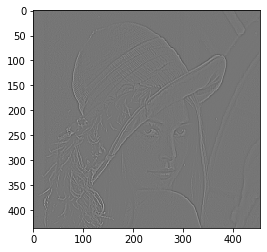

In [95]:
plt.imshow(lap_img, cmap='gray')